# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2019.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           205 non-null    float64
 1   Ln_M_stem_kg_m2       205 non-null    float64
 2   Ln_M_stem_bark_kg_m2  205 non-null    float64
 3   Ln_M_crown_kg_m2      205 non-null    float64
 4   Ln_M_foliage_kg_m2    205 non-null    float64
 5   Ln_M_AG_kg_m2         205 non-null    float64
 6   Ln_Cs_wood            205 non-null    float64
 7   Ln_Sr_wood            205 non-null    float64
 8   Ln_Tag_Cs             205 non-null    float64
 9   Ln_Tag_Sr             205 non-null    float64
 10  r2019B01              205 non-null    float64
 11  r2019B02              205 non-null    float64
 12  r2019B03              205 non-null    float64
 13  r2019B04              205 non-null    float64
 14  r2019B05              205 non-null    float64
 15  r2019B06              2

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_19551/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            130.0  299.023077  185.204955    2.0  144.0  316.0  451.0   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          130.0  11.784154  7.069419   0.05   5.915  11.96   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.305  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,5.224390,2.071854,-0.042439,0.168537,-0.941463,2.297463,5.995610,7.382927,-0.620000,2.310732,...,0.028895,0.219361,0.131344,0.068068,0.759654,-0.692408,0.526662,-15.737088,-10.490763,0.668847
std,1.125422,1.119577,0.780389,0.583474,0.714443,0.926225,2.084309,2.041062,1.275808,0.951460,...,0.010704,0.049137,0.036023,0.026479,0.091469,0.070703,0.144729,1.547144,1.471517,0.081010
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.015301,0.140309,0.078918,0.035914,0.363395,-0.849155,-0.037478,-22.820204,-16.820473,0.386847
25%,4.930000,1.770000,-0.190000,-0.030000,-1.510000,2.050000,4.100000,5.800000,-1.400000,1.700000,...,0.022685,0.183403,0.102471,0.051182,0.727961,-0.735660,0.470852,-16.494671,-11.364958,0.615553
50%,5.510000,2.410000,0.060000,0.310000,-0.680000,2.570000,6.300000,7.500000,-0.500000,2.400000,...,0.026123,0.199665,0.121704,0.060839,0.771691,-0.693779,0.562326,-15.454248,-10.299303,0.666882
75%,5.980000,2.800000,0.370000,0.530000,-0.360000,2.930000,7.300000,8.700000,0.300000,3.000000,...,0.030628,0.250913,0.153232,0.078586,0.814177,-0.660039,0.626609,-14.760403,-9.547850,0.728737
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.081675,0.423326,0.252487,0.196544,0.914709,-0.389420,0.740912,-12.365163,-5.703308,0.877743


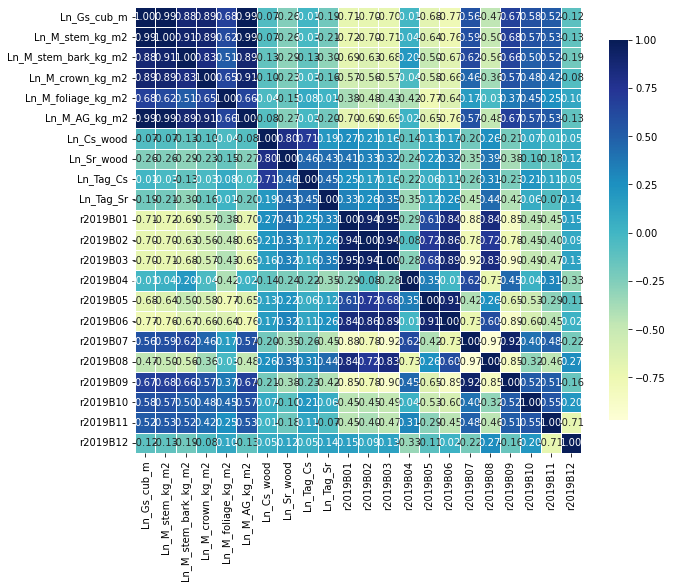

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2019B01', 'r2019B04', 'r2019B06', 'r2019B10', 'r2019B11'])
y = pd.DataFrame(select, columns= ['Ln_Tag_Cs'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [11]:
# Columns in "X" data collections
X.head()

,r2019B01,r2019B04,r2019B06,r2019B10,r2019B11
0,0.025483,0.266210,0.081316,-15.396488,-11.262037
1,0.024075,0.183349,0.052144,-16.012156,-9.364664
2,0.022492,0.184066,0.050684,-13.609903,-9.726108
3,0.023742,0.177221,0.052198,-14.321650,-10.457536
4,0.022916,0.183705,0.050437,-13.934375,-11.393335


In [12]:
# Columns in "y" data collections
y.head()

,Ln_Tag_Cs
0,-0.7
1,0.6
2,0.8
3,0.5
4,0.2


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.11584547887173113, 0.2534678685322639, 0.204268342181275]
    Mean: 0.114
    Std: 0.164

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.09958667 1.29280388 1.3336238 ]
    Mean: 1.242
    Std: 0.102

 --------------------
Mean absolute error (MAE): 

    Scores: [1.0193846107797995, 0.9365033552598427, 0.8676217241322293]
    Mean: 0.941
    Std: 0.062

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.184 (std: 0.269)
Parameters: {'colsample_bytree': 0.4821763186496958, 'gamma': 0.49732574783047157, 'learning_rate': 0.19976758743371428, 'max_depth': 2, 'n_estimators': 71, 'subsample': 0.4736156914411904}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.14431801, 0.29712596, 0.1767767 , ..., 0.10586104, 0.30819526,
       0.10661464]), 'std_fit_time': array([0.02971862, 0.04290475, 0.00715025, ..., 0.00669573, 0.01857803,
       0.00373738]), 'mean_score_time': array([0.00461583, 0.00460267, 0.00465894, ..., 0.00423379, 0.00460901,
       0.00425572]), 'std_score_time': array([1.11935672e-04, 3.20709769e-05, 2.26088707e-04, ...,
       9.49296919e-05, 1.45259861e-04, 1.58831616e-04]), 'param_colsample_bytree': masked_array(data=[0.7119877477834156, 0.6518074035343849,
                   0.8593306910412242, ..., 0.17249654481085597,
                   0.5687216467350364, 0.43868606745500177],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.09026469337316334, 0.3831469393428745,
                   0.26498559380572373, ..., 0.43064720302677606,
                   0.1815239383914496, 0.19904510766230715],
   

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.4821763186496958
Gamma: 0.49732574783047157
Learning_rate: 0.19976758743371428
Max_depth: 2
N_estimators: 71
Subsample: 0.4736156914411904


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.55215	validation_1-rmse:1.38760
[1]	validation_0-rmse:1.42814	validation_1-rmse:1.29299
[2]	validation_0-rmse:1.32987	validation_1-rmse:1.24695
[3]	validation_0-rmse:1.25390	validation_1-rmse:1.21605
[4]	validation_0-rmse:1.18764	validation_1-rmse:1.21186
[5]	validation_0-rmse:1.13935	validation_1-rmse:1.18027
[6]	validation_0-rmse:1.08224	validation_1-rmse:1.15413
[7]	validation_0-rmse:1.04777	validation_1-rmse:1.15417
[8]	validation_0-rmse:1.01668	validation_1-rmse:1.15431
[9]	validation_0-rmse:0.99163	validation_1-rmse:1.15553
[10]	validation_0-rmse:0.97724	validation_1-rmse:1.15435
[11]	validation_0-rmse:0.96526	validation_1-rmse:1.15939
[12]	validation_0-rmse:0.94893	validation_1-rmse:1.16161
[13]	validation_0-rmse:0.94735	validation_1-rmse:1.15526
[14]	validation_0-rmse:0.93625	validation_1-rmse:1.15766
[15]	validation_0-rmse:0.92125	validation_1-rmse:1.15839
[16]	validation_0-rmse:0.90936	validation_1-rmse:1.15517
[17]	validation_0-rmse:0.89728	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.88753	validation_1-rmse:1.15516
[19]	validation_0-rmse:0.87924	validation_1-rmse:1.14476
[20]	validation_0-rmse:0.87226	validation_1-rmse:1.14438
[21]	validation_0-rmse:0.86408	validation_1-rmse:1.15159
[22]	validation_0-rmse:0.86068	validation_1-rmse:1.15696
[23]	validation_0-rmse:0.84703	validation_1-rmse:1.15068
[24]	validation_0-rmse:0.84229	validation_1-rmse:1.15405
[25]	validation_0-rmse:0.83209	validation_1-rmse:1.14841
[26]	validation_0-rmse:0.81529	validation_1-rmse:1.16818
[27]	validation_0-rmse:0.81172	validation_1-rmse:1.17089
[28]	validation_0-rmse:0.80292	validation_1-rmse:1.17151
[29]	validation_0-rmse:0.79722	validation_1-rmse:1.17171
[30]	validation_0-rmse:0.78706	validation_1-rmse:1.16777
[31]	validation_0-rmse:0.78121	validation_1-rmse:1.16221
[32]	validation_0-rmse:0.76852	validation_1-rmse:1.17141
[33]	validation_0-rmse:0.76261	validation_1-rmse:1.17189
[34]	validation_0-rmse:0.75813	validation_1-rmse:1.17179
[35]	validation_0-rmse:0.74491	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.91125	validation_1-rmse:0.97865
[18]	validation_0-rmse:0.89447	validation_1-rmse:1.00709
[19]	validation_0-rmse:0.88013	validation_1-rmse:1.02147
[20]	validation_0-rmse:0.87672	validation_1-rmse:1.01903
[21]	validation_0-rmse:0.86612	validation_1-rmse:0.99527
[22]	validation_0-rmse:0.85899	validation_1-rmse:0.99351
[23]	validation_0-rmse:0.84392	validation_1-rmse:1.00520
[24]	validation_0-rmse:0.83304	validation_1-rmse:1.01450
[25]	validation_0-rmse:0.83033	validation_1-rmse:0.99778
[26]	validation_0-rmse:0.82349	validation_1-rmse:0.99137
[27]	validation_0-rmse:0.82079	validation_1-rmse:0.98584
[28]	validation_0-rmse:0.82280	validation_1-rmse:0.96531
[29]	validation_0-rmse:0.81475	validation_1-rmse:0.96350
[30]	validation_0-rmse:0.80810	validation_1-rmse:0.97110
[31]	validation_0-rmse:0.80503	validation_1-rmse:0.97022
[32]	validation_0-rmse:0.79586	validation_1-rmse:0.96208
[0]	validation_0-rmse:1.54420	validation_1-rmse:1.39461
[1]	validation_0-rmse:1.37410	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.94252	validation_1-rmse:1.19569
[13]	validation_0-rmse:0.93642	validation_1-rmse:1.20862
[14]	validation_0-rmse:0.92289	validation_1-rmse:1.20825
[15]	validation_0-rmse:0.90136	validation_1-rmse:1.20375
[16]	validation_0-rmse:0.88900	validation_1-rmse:1.19870
[17]	validation_0-rmse:0.87697	validation_1-rmse:1.20739
[18]	validation_0-rmse:0.86703	validation_1-rmse:1.19528
[19]	validation_0-rmse:0.85279	validation_1-rmse:1.20526
[20]	validation_0-rmse:0.84462	validation_1-rmse:1.19767
[21]	validation_0-rmse:0.83829	validation_1-rmse:1.21350
[22]	validation_0-rmse:0.82506	validation_1-rmse:1.23136
[23]	validation_0-rmse:0.80746	validation_1-rmse:1.23064
[24]	validation_0-rmse:0.80138	validation_1-rmse:1.22292
[0]	validation_0-rmse:1.53149	validation_1-rmse:1.31876
[1]	validation_0-rmse:1.41933	validation_1-rmse:1.25862
[2]	validation_0-rmse:1.32516	validation_1-rmse:1.20683
[3]	validation_0-rmse:1.27969	validation_1-rmse:1.19446
[4]	validation_0-rmse:1.22564	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.15423	validation_1-rmse:1.11908
[6]	validation_0-rmse:1.10173	validation_1-rmse:1.11507
[7]	validation_0-rmse:1.08012	validation_1-rmse:1.10666
[8]	validation_0-rmse:1.04950	validation_1-rmse:1.10059
[9]	validation_0-rmse:1.02804	validation_1-rmse:1.08525
[10]	validation_0-rmse:1.01132	validation_1-rmse:1.08903
[11]	validation_0-rmse:0.98572	validation_1-rmse:1.10201
[12]	validation_0-rmse:0.97034	validation_1-rmse:1.07231
[13]	validation_0-rmse:0.96270	validation_1-rmse:1.07044
[14]	validation_0-rmse:0.95073	validation_1-rmse:1.07510
[15]	validation_0-rmse:0.93234	validation_1-rmse:1.07704
[16]	validation_0-rmse:0.92481	validation_1-rmse:1.08250
[17]	validation_0-rmse:0.91054	validation_1-rmse:1.10099
[18]	validation_0-rmse:0.89639	validation_1-rmse:1.12345
[19]	validation_0-rmse:0.88446	validation_1-rmse:1.13668
[20]	validation_0-rmse:0.87965	validation_1-rmse:1.16093
[21]	validation_0-rmse:0.87866	validation_1-rmse:1.16820
[22]	validation_0-rmse:0.87303	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.92486	validation_1-rmse:0.83572
[18]	validation_0-rmse:0.91176	validation_1-rmse:0.82646
[19]	validation_0-rmse:0.89991	validation_1-rmse:0.80584
[20]	validation_0-rmse:0.88949	validation_1-rmse:0.81776
[21]	validation_0-rmse:0.87272	validation_1-rmse:0.83623
[22]	validation_0-rmse:0.86683	validation_1-rmse:0.83717
[23]	validation_0-rmse:0.86106	validation_1-rmse:0.85193
[24]	validation_0-rmse:0.84893	validation_1-rmse:0.84466
[25]	validation_0-rmse:0.84196	validation_1-rmse:0.84492
[26]	validation_0-rmse:0.83134	validation_1-rmse:0.84926
[27]	validation_0-rmse:0.83103	validation_1-rmse:0.85885
[28]	validation_0-rmse:0.82233	validation_1-rmse:0.88775
[29]	validation_0-rmse:0.81765	validation_1-rmse:0.88076
[30]	validation_0-rmse:0.81151	validation_1-rmse:0.90304
[31]	validation_0-rmse:0.80285	validation_1-rmse:0.88182
[32]	validation_0-rmse:0.78647	validation_1-rmse:0.90096
[33]	validation_0-rmse:0.78132	validation_1-rmse:0.90237
[34]	validation_0-rmse:0.77798	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.91338	validation_1-rmse:0.93070
[19]	validation_0-rmse:0.90305	validation_1-rmse:0.92752
[20]	validation_0-rmse:0.89327	validation_1-rmse:0.93944
[21]	validation_0-rmse:0.88899	validation_1-rmse:0.94416
[22]	validation_0-rmse:0.87620	validation_1-rmse:0.95213
[23]	validation_0-rmse:0.86945	validation_1-rmse:0.93579
[24]	validation_0-rmse:0.85410	validation_1-rmse:0.93899
[25]	validation_0-rmse:0.84106	validation_1-rmse:0.95550
[26]	validation_0-rmse:0.83521	validation_1-rmse:0.96720
[27]	validation_0-rmse:0.83184	validation_1-rmse:0.95997
[28]	validation_0-rmse:0.82925	validation_1-rmse:0.96503
[29]	validation_0-rmse:0.82066	validation_1-rmse:0.95867
[30]	validation_0-rmse:0.81218	validation_1-rmse:0.98335
[31]	validation_0-rmse:0.81168	validation_1-rmse:0.98817
[32]	validation_0-rmse:0.80733	validation_1-rmse:0.99525
[33]	validation_0-rmse:0.80336	validation_1-rmse:0.99328
[34]	validation_0-rmse:0.80023	validation_1-rmse:0.99439
[35]	validation_0-rmse:0.79272	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.90427	validation_1-rmse:1.10457
[17]	validation_0-rmse:0.89345	validation_1-rmse:1.11351
[18]	validation_0-rmse:0.88757	validation_1-rmse:1.12304
[19]	validation_0-rmse:0.87961	validation_1-rmse:1.10714
[20]	validation_0-rmse:0.87381	validation_1-rmse:1.10726
[21]	validation_0-rmse:0.86962	validation_1-rmse:1.10540
[22]	validation_0-rmse:0.86161	validation_1-rmse:1.09979
[23]	validation_0-rmse:0.85202	validation_1-rmse:1.10668
[24]	validation_0-rmse:0.84177	validation_1-rmse:1.10600
[25]	validation_0-rmse:0.83463	validation_1-rmse:1.11721
[26]	validation_0-rmse:0.82499	validation_1-rmse:1.11312
[27]	validation_0-rmse:0.82056	validation_1-rmse:1.12664
[28]	validation_0-rmse:0.81391	validation_1-rmse:1.13403
[29]	validation_0-rmse:0.80851	validation_1-rmse:1.13633
[30]	validation_0-rmse:0.80031	validation_1-rmse:1.12758
[31]	validation_0-rmse:0.79777	validation_1-rmse:1.12801
[32]	validation_0-rmse:0.79142	validation_1-rmse:1.12710
[33]	validation_0-rmse:0.78788	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.08311	validation_1-rmse:1.32540
[7]	validation_0-rmse:1.05994	validation_1-rmse:1.32179
[8]	validation_0-rmse:1.02828	validation_1-rmse:1.28980
[9]	validation_0-rmse:1.00536	validation_1-rmse:1.26018
[10]	validation_0-rmse:0.99332	validation_1-rmse:1.26043
[11]	validation_0-rmse:0.97211	validation_1-rmse:1.24190
[12]	validation_0-rmse:0.95403	validation_1-rmse:1.21786
[13]	validation_0-rmse:0.93859	validation_1-rmse:1.22675
[14]	validation_0-rmse:0.93046	validation_1-rmse:1.22707
[15]	validation_0-rmse:0.91553	validation_1-rmse:1.18759
[16]	validation_0-rmse:0.90680	validation_1-rmse:1.17546
[17]	validation_0-rmse:0.89311	validation_1-rmse:1.15725
[18]	validation_0-rmse:0.88849	validation_1-rmse:1.16243
[19]	validation_0-rmse:0.88028	validation_1-rmse:1.15593
[20]	validation_0-rmse:0.87095	validation_1-rmse:1.14560
[21]	validation_0-rmse:0.86309	validation_1-rmse:1.14856
[22]	validation_0-rmse:0.84857	validation_1-rmse:1.16260
[23]	validation_0-rmse:0.83670	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.87242	validation_1-rmse:1.22902
[18]	validation_0-rmse:0.86042	validation_1-rmse:1.20625
[19]	validation_0-rmse:0.84699	validation_1-rmse:1.19484
[20]	validation_0-rmse:0.84317	validation_1-rmse:1.20455
[21]	validation_0-rmse:0.82658	validation_1-rmse:1.22005
[22]	validation_0-rmse:0.81401	validation_1-rmse:1.24092
[23]	validation_0-rmse:0.80386	validation_1-rmse:1.25045
[24]	validation_0-rmse:0.80224	validation_1-rmse:1.24433
[25]	validation_0-rmse:0.79824	validation_1-rmse:1.23939
[26]	validation_0-rmse:0.79218	validation_1-rmse:1.24618
[27]	validation_0-rmse:0.78685	validation_1-rmse:1.25231
[28]	validation_0-rmse:0.77700	validation_1-rmse:1.25337
[29]	validation_0-rmse:0.76900	validation_1-rmse:1.24033
[30]	validation_0-rmse:0.76243	validation_1-rmse:1.25210
[31]	validation_0-rmse:0.75983	validation_1-rmse:1.25752
[32]	validation_0-rmse:0.75008	validation_1-rmse:1.24926
[33]	validation_0-rmse:0.74125	validation_1-rmse:1.25457
[34]	validation_0-rmse:0.73610	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.89025	validation_1-rmse:1.06178
[18]	validation_0-rmse:0.87827	validation_1-rmse:1.05530
[19]	validation_0-rmse:0.87205	validation_1-rmse:1.06202
[20]	validation_0-rmse:0.86278	validation_1-rmse:1.05565
[21]	validation_0-rmse:0.85369	validation_1-rmse:1.04194
[22]	validation_0-rmse:0.84720	validation_1-rmse:1.03458
[23]	validation_0-rmse:0.84876	validation_1-rmse:1.05446
[24]	validation_0-rmse:0.84265	validation_1-rmse:1.05554
[25]	validation_0-rmse:0.83694	validation_1-rmse:1.05683
[26]	validation_0-rmse:0.83020	validation_1-rmse:1.05168
[27]	validation_0-rmse:0.82086	validation_1-rmse:1.05271
[28]	validation_0-rmse:0.80844	validation_1-rmse:1.04227
[29]	validation_0-rmse:0.80384	validation_1-rmse:1.02779
[30]	validation_0-rmse:0.79903	validation_1-rmse:1.02623
[31]	validation_0-rmse:0.79474	validation_1-rmse:1.04649
[32]	validation_0-rmse:0.78668	validation_1-rmse:1.04668
[33]	validation_0-rmse:0.78534	validation_1-rmse:1.05979
[34]	validation_0-rmse:0.77855	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.01835	validation_1-rmse:1.30232
[9]	validation_0-rmse:0.99468	validation_1-rmse:1.27651
[10]	validation_0-rmse:0.96551	validation_1-rmse:1.24098
[11]	validation_0-rmse:0.94262	validation_1-rmse:1.23891
[12]	validation_0-rmse:0.92630	validation_1-rmse:1.22601
[13]	validation_0-rmse:0.91295	validation_1-rmse:1.22235
[14]	validation_0-rmse:0.91121	validation_1-rmse:1.21934
[15]	validation_0-rmse:0.89662	validation_1-rmse:1.20459
[16]	validation_0-rmse:0.89231	validation_1-rmse:1.20085
[17]	validation_0-rmse:0.88421	validation_1-rmse:1.18008
[18]	validation_0-rmse:0.87532	validation_1-rmse:1.15694
[19]	validation_0-rmse:0.86749	validation_1-rmse:1.15555
[20]	validation_0-rmse:0.86444	validation_1-rmse:1.15159
[21]	validation_0-rmse:0.85363	validation_1-rmse:1.15232
[22]	validation_0-rmse:0.83987	validation_1-rmse:1.16559
[23]	validation_0-rmse:0.83510	validation_1-rmse:1.16385
[24]	validation_0-rmse:0.82710	validation_1-rmse:1.16752
[25]	validation_0-rmse:0.81824	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.88789	validation_1-rmse:1.00448
[21]	validation_0-rmse:0.87890	validation_1-rmse:1.01831
[22]	validation_0-rmse:0.87008	validation_1-rmse:1.01822
[23]	validation_0-rmse:0.86252	validation_1-rmse:1.01357
[24]	validation_0-rmse:0.85824	validation_1-rmse:1.00883
[25]	validation_0-rmse:0.85047	validation_1-rmse:1.02375
[26]	validation_0-rmse:0.84209	validation_1-rmse:1.05222
[27]	validation_0-rmse:0.83190	validation_1-rmse:1.05201
[28]	validation_0-rmse:0.83142	validation_1-rmse:1.05900
[29]	validation_0-rmse:0.82747	validation_1-rmse:1.05769
[30]	validation_0-rmse:0.81138	validation_1-rmse:1.06540
[31]	validation_0-rmse:0.80948	validation_1-rmse:1.06112
[32]	validation_0-rmse:0.80237	validation_1-rmse:1.03755
[33]	validation_0-rmse:0.79949	validation_1-rmse:1.04006
[34]	validation_0-rmse:0.79590	validation_1-rmse:1.03989
[35]	validation_0-rmse:0.79465	validation_1-rmse:1.04554
[36]	validation_0-rmse:0.78433	validation_1-rmse:1.04459
[37]	validation_0-rmse:0.78058	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.99367	validation_1-rmse:1.05873
[12]	validation_0-rmse:0.98724	validation_1-rmse:1.06065
[13]	validation_0-rmse:0.97124	validation_1-rmse:1.04629
[14]	validation_0-rmse:0.95633	validation_1-rmse:1.03292
[15]	validation_0-rmse:0.93159	validation_1-rmse:1.04291
[16]	validation_0-rmse:0.92263	validation_1-rmse:1.03941
[17]	validation_0-rmse:0.91443	validation_1-rmse:1.03174
[18]	validation_0-rmse:0.90849	validation_1-rmse:1.03183
[19]	validation_0-rmse:0.90047	validation_1-rmse:1.03069
[20]	validation_0-rmse:0.89437	validation_1-rmse:1.03132
[21]	validation_0-rmse:0.89284	validation_1-rmse:1.03274
[22]	validation_0-rmse:0.88711	validation_1-rmse:1.04603
[23]	validation_0-rmse:0.88188	validation_1-rmse:1.04933
[24]	validation_0-rmse:0.88029	validation_1-rmse:1.03589
[25]	validation_0-rmse:0.87107	validation_1-rmse:1.03385
[26]	validation_0-rmse:0.86884	validation_1-rmse:1.03172
[27]	validation_0-rmse:0.85880	validation_1-rmse:1.04337
[28]	validation_0-rmse:0.85389	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.99564	validation_1-rmse:1.09784
[11]	validation_0-rmse:0.97928	validation_1-rmse:1.07527
[12]	validation_0-rmse:0.97639	validation_1-rmse:1.09184
[13]	validation_0-rmse:0.96117	validation_1-rmse:1.09894
[14]	validation_0-rmse:0.95473	validation_1-rmse:1.09166
[15]	validation_0-rmse:0.93429	validation_1-rmse:1.09782
[16]	validation_0-rmse:0.92482	validation_1-rmse:1.08373
[17]	validation_0-rmse:0.89785	validation_1-rmse:1.09323
[18]	validation_0-rmse:0.88576	validation_1-rmse:1.09727
[19]	validation_0-rmse:0.87368	validation_1-rmse:1.09169
[20]	validation_0-rmse:0.86423	validation_1-rmse:1.08757
[21]	validation_0-rmse:0.85812	validation_1-rmse:1.06105
[22]	validation_0-rmse:0.85188	validation_1-rmse:1.06318
[23]	validation_0-rmse:0.85022	validation_1-rmse:1.07136
[24]	validation_0-rmse:0.84447	validation_1-rmse:1.07407
[25]	validation_0-rmse:0.84026	validation_1-rmse:1.08718
[26]	validation_0-rmse:0.83930	validation_1-rmse:1.06565
[27]	validation_0-rmse:0.83047	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.91661	validation_1-rmse:1.14788
[15]	validation_0-rmse:0.89211	validation_1-rmse:1.12528
[16]	validation_0-rmse:0.88270	validation_1-rmse:1.13261
[17]	validation_0-rmse:0.87610	validation_1-rmse:1.13612
[18]	validation_0-rmse:0.85640	validation_1-rmse:1.13195
[19]	validation_0-rmse:0.84876	validation_1-rmse:1.12455
[20]	validation_0-rmse:0.84469	validation_1-rmse:1.12380
[21]	validation_0-rmse:0.83723	validation_1-rmse:1.12488
[22]	validation_0-rmse:0.83072	validation_1-rmse:1.12336
[23]	validation_0-rmse:0.82119	validation_1-rmse:1.12205
[24]	validation_0-rmse:0.81570	validation_1-rmse:1.11336
[25]	validation_0-rmse:0.80733	validation_1-rmse:1.10730
[26]	validation_0-rmse:0.80047	validation_1-rmse:1.13052
[27]	validation_0-rmse:0.79546	validation_1-rmse:1.13357
[28]	validation_0-rmse:0.79043	validation_1-rmse:1.13147
[29]	validation_0-rmse:0.78643	validation_1-rmse:1.12244
[30]	validation_0-rmse:0.78475	validation_1-rmse:1.12973
[31]	validation_0-rmse:0.77496	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.90968	validation_1-rmse:1.28474
[15]	validation_0-rmse:0.90081	validation_1-rmse:1.27449
[16]	validation_0-rmse:0.89652	validation_1-rmse:1.27184
[17]	validation_0-rmse:0.88540	validation_1-rmse:1.28069
[18]	validation_0-rmse:0.87900	validation_1-rmse:1.27367
[19]	validation_0-rmse:0.86153	validation_1-rmse:1.28255
[20]	validation_0-rmse:0.85069	validation_1-rmse:1.29021
[21]	validation_0-rmse:0.83925	validation_1-rmse:1.29614
[22]	validation_0-rmse:0.82870	validation_1-rmse:1.30208
[23]	validation_0-rmse:0.83119	validation_1-rmse:1.30816
[24]	validation_0-rmse:0.82482	validation_1-rmse:1.31032
[25]	validation_0-rmse:0.81756	validation_1-rmse:1.30541
[26]	validation_0-rmse:0.80535	validation_1-rmse:1.29958
[27]	validation_0-rmse:0.79899	validation_1-rmse:1.29726
[28]	validation_0-rmse:0.79436	validation_1-rmse:1.29978
[29]	validation_0-rmse:0.78507	validation_1-rmse:1.29917
[30]	validation_0-rmse:0.78304	validation_1-rmse:1.30731
[0]	validation_0-rmse:1.55870	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.89350	validation_1-rmse:1.03654
[22]	validation_0-rmse:0.88253	validation_1-rmse:1.02104
[23]	validation_0-rmse:0.87513	validation_1-rmse:0.99445
[24]	validation_0-rmse:0.87314	validation_1-rmse:0.99699
[25]	validation_0-rmse:0.86386	validation_1-rmse:0.99254
[26]	validation_0-rmse:0.85803	validation_1-rmse:0.98168
[27]	validation_0-rmse:0.85372	validation_1-rmse:0.97921
[28]	validation_0-rmse:0.85005	validation_1-rmse:0.98193
[29]	validation_0-rmse:0.85141	validation_1-rmse:0.98373
[30]	validation_0-rmse:0.83947	validation_1-rmse:0.97182
[31]	validation_0-rmse:0.83100	validation_1-rmse:0.97609
[32]	validation_0-rmse:0.81861	validation_1-rmse:0.97479
[33]	validation_0-rmse:0.81346	validation_1-rmse:0.97652
[34]	validation_0-rmse:0.81146	validation_1-rmse:0.98183
[35]	validation_0-rmse:0.80854	validation_1-rmse:0.98125
[36]	validation_0-rmse:0.80248	validation_1-rmse:0.95729
[37]	validation_0-rmse:0.79705	validation_1-rmse:0.95742
[38]	validation_0-rmse:0.79306	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.99255	validation_1-rmse:1.15057
[10]	validation_0-rmse:0.97837	validation_1-rmse:1.13974
[11]	validation_0-rmse:0.96044	validation_1-rmse:1.13266
[12]	validation_0-rmse:0.94333	validation_1-rmse:1.11429
[13]	validation_0-rmse:0.94099	validation_1-rmse:1.11830
[14]	validation_0-rmse:0.93375	validation_1-rmse:1.10727
[15]	validation_0-rmse:0.91247	validation_1-rmse:1.09984
[16]	validation_0-rmse:0.90568	validation_1-rmse:1.10110
[17]	validation_0-rmse:0.88876	validation_1-rmse:1.10211
[18]	validation_0-rmse:0.87641	validation_1-rmse:1.10713
[19]	validation_0-rmse:0.86058	validation_1-rmse:1.12707
[20]	validation_0-rmse:0.85742	validation_1-rmse:1.13924
[21]	validation_0-rmse:0.85092	validation_1-rmse:1.13713
[22]	validation_0-rmse:0.84834	validation_1-rmse:1.13195
[23]	validation_0-rmse:0.84694	validation_1-rmse:1.11929
[24]	validation_0-rmse:0.83066	validation_1-rmse:1.14124
[25]	validation_0-rmse:0.82061	validation_1-rmse:1.15721
[26]	validation_0-rmse:0.81102	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.02903	validation_1-rmse:1.04220
[9]	validation_0-rmse:0.98456	validation_1-rmse:1.05770
[10]	validation_0-rmse:0.97408	validation_1-rmse:1.06291
[11]	validation_0-rmse:0.95062	validation_1-rmse:1.08178
[12]	validation_0-rmse:0.92407	validation_1-rmse:1.07743
[13]	validation_0-rmse:0.91778	validation_1-rmse:1.09180
[14]	validation_0-rmse:0.90979	validation_1-rmse:1.09153
[15]	validation_0-rmse:0.88576	validation_1-rmse:1.11479
[16]	validation_0-rmse:0.87695	validation_1-rmse:1.10968
[17]	validation_0-rmse:0.87084	validation_1-rmse:1.11720
[18]	validation_0-rmse:0.86220	validation_1-rmse:1.12187
[19]	validation_0-rmse:0.85325	validation_1-rmse:1.12048
[20]	validation_0-rmse:0.84677	validation_1-rmse:1.13414
[21]	validation_0-rmse:0.84241	validation_1-rmse:1.13089
[22]	validation_0-rmse:0.83710	validation_1-rmse:1.12135
[23]	validation_0-rmse:0.82880	validation_1-rmse:1.14137
[24]	validation_0-rmse:0.82591	validation_1-rmse:1.13616
[25]	validation_0-rmse:0.81786	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.03923	validation_1-rmse:1.17350
[8]	validation_0-rmse:1.00771	validation_1-rmse:1.14231
[9]	validation_0-rmse:0.97978	validation_1-rmse:1.11412
[10]	validation_0-rmse:0.97089	validation_1-rmse:1.11758
[11]	validation_0-rmse:0.94770	validation_1-rmse:1.10741
[12]	validation_0-rmse:0.93726	validation_1-rmse:1.09804
[13]	validation_0-rmse:0.93476	validation_1-rmse:1.10205
[14]	validation_0-rmse:0.93144	validation_1-rmse:1.10415
[15]	validation_0-rmse:0.91201	validation_1-rmse:1.08676
[16]	validation_0-rmse:0.90263	validation_1-rmse:1.09853
[17]	validation_0-rmse:0.89238	validation_1-rmse:1.09229
[18]	validation_0-rmse:0.88310	validation_1-rmse:1.08990
[19]	validation_0-rmse:0.87047	validation_1-rmse:1.09097
[20]	validation_0-rmse:0.85733	validation_1-rmse:1.10088
[21]	validation_0-rmse:0.85455	validation_1-rmse:1.10477
[22]	validation_0-rmse:0.84732	validation_1-rmse:1.10145
[23]	validation_0-rmse:0.83100	validation_1-rmse:1.08653
[24]	validation_0-rmse:0.82423	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.06085	validation_1-rmse:1.31730
[8]	validation_0-rmse:1.05003	validation_1-rmse:1.30617
[9]	validation_0-rmse:1.02068	validation_1-rmse:1.27432
[10]	validation_0-rmse:1.00923	validation_1-rmse:1.26865
[11]	validation_0-rmse:0.98803	validation_1-rmse:1.26414
[12]	validation_0-rmse:0.96922	validation_1-rmse:1.25794
[13]	validation_0-rmse:0.95642	validation_1-rmse:1.25454
[14]	validation_0-rmse:0.93587	validation_1-rmse:1.26947
[15]	validation_0-rmse:0.92359	validation_1-rmse:1.24610
[16]	validation_0-rmse:0.92275	validation_1-rmse:1.24500
[17]	validation_0-rmse:0.91255	validation_1-rmse:1.23700
[18]	validation_0-rmse:0.90995	validation_1-rmse:1.23409
[19]	validation_0-rmse:0.90280	validation_1-rmse:1.22956
[20]	validation_0-rmse:0.89169	validation_1-rmse:1.21875
[21]	validation_0-rmse:0.88846	validation_1-rmse:1.22201
[22]	validation_0-rmse:0.88548	validation_1-rmse:1.22747
[23]	validation_0-rmse:0.87294	validation_1-rmse:1.23737
[24]	validation_0-rmse:0.85889	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.88886	validation_1-rmse:1.37595
[13]	validation_0-rmse:0.88426	validation_1-rmse:1.37493
[14]	validation_0-rmse:0.87458	validation_1-rmse:1.38106
[15]	validation_0-rmse:0.85414	validation_1-rmse:1.35059
[16]	validation_0-rmse:0.84733	validation_1-rmse:1.34064
[17]	validation_0-rmse:0.83633	validation_1-rmse:1.31246
[18]	validation_0-rmse:0.82932	validation_1-rmse:1.30880
[19]	validation_0-rmse:0.81450	validation_1-rmse:1.31663
[20]	validation_0-rmse:0.80942	validation_1-rmse:1.30809
[21]	validation_0-rmse:0.80547	validation_1-rmse:1.30682
[22]	validation_0-rmse:0.79937	validation_1-rmse:1.31027
[23]	validation_0-rmse:0.79044	validation_1-rmse:1.30869
[24]	validation_0-rmse:0.78814	validation_1-rmse:1.29794
[25]	validation_0-rmse:0.77865	validation_1-rmse:1.29836
[26]	validation_0-rmse:0.77947	validation_1-rmse:1.30562
[27]	validation_0-rmse:0.77942	validation_1-rmse:1.32046
[28]	validation_0-rmse:0.77390	validation_1-rmse:1.28131
[29]	validation_0-rmse:0.76948	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.89647	validation_1-rmse:1.03756
[20]	validation_0-rmse:0.88692	validation_1-rmse:1.04953
[21]	validation_0-rmse:0.87524	validation_1-rmse:1.08309
[22]	validation_0-rmse:0.86837	validation_1-rmse:1.10486
[23]	validation_0-rmse:0.85865	validation_1-rmse:1.09269
[24]	validation_0-rmse:0.85690	validation_1-rmse:1.10101
[25]	validation_0-rmse:0.85186	validation_1-rmse:1.11104
[26]	validation_0-rmse:0.85048	validation_1-rmse:1.10815
[27]	validation_0-rmse:0.84518	validation_1-rmse:1.10175
[28]	validation_0-rmse:0.83864	validation_1-rmse:1.10143
[29]	validation_0-rmse:0.82798	validation_1-rmse:1.09699
[30]	validation_0-rmse:0.82118	validation_1-rmse:1.12520
[31]	validation_0-rmse:0.81500	validation_1-rmse:1.12381
[32]	validation_0-rmse:0.80749	validation_1-rmse:1.10471
[33]	validation_0-rmse:0.79177	validation_1-rmse:1.09729
[34]	validation_0-rmse:0.78788	validation_1-rmse:1.09323
[35]	validation_0-rmse:0.78427	validation_1-rmse:1.08283
[36]	validation_0-rmse:0.78084	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.09128	validation_1-rmse:1.17562
[7]	validation_0-rmse:1.06317	validation_1-rmse:1.13773
[8]	validation_0-rmse:1.01952	validation_1-rmse:1.11068
[9]	validation_0-rmse:1.00037	validation_1-rmse:1.10237
[10]	validation_0-rmse:0.98630	validation_1-rmse:1.09706
[11]	validation_0-rmse:0.96677	validation_1-rmse:1.07548
[12]	validation_0-rmse:0.95017	validation_1-rmse:1.08111
[13]	validation_0-rmse:0.93968	validation_1-rmse:1.07205
[14]	validation_0-rmse:0.93403	validation_1-rmse:1.06839
[15]	validation_0-rmse:0.91633	validation_1-rmse:1.06232
[16]	validation_0-rmse:0.89865	validation_1-rmse:1.06827
[17]	validation_0-rmse:0.88894	validation_1-rmse:1.06220
[18]	validation_0-rmse:0.88455	validation_1-rmse:1.07091
[19]	validation_0-rmse:0.87330	validation_1-rmse:1.06245
[20]	validation_0-rmse:0.87308	validation_1-rmse:1.04896
[21]	validation_0-rmse:0.86106	validation_1-rmse:1.06107
[22]	validation_0-rmse:0.85457	validation_1-rmse:1.05596
[23]	validation_0-rmse:0.84955	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:1.02995	validation_1-rmse:1.08447
[11]	validation_0-rmse:1.00370	validation_1-rmse:1.07505
[12]	validation_0-rmse:0.98382	validation_1-rmse:1.07071
[13]	validation_0-rmse:0.97239	validation_1-rmse:1.07569
[14]	validation_0-rmse:0.96210	validation_1-rmse:1.07543
[15]	validation_0-rmse:0.93418	validation_1-rmse:1.07930
[16]	validation_0-rmse:0.92664	validation_1-rmse:1.08565
[17]	validation_0-rmse:0.91519	validation_1-rmse:1.09114
[18]	validation_0-rmse:0.89103	validation_1-rmse:1.08424
[19]	validation_0-rmse:0.87446	validation_1-rmse:1.07438
[20]	validation_0-rmse:0.86118	validation_1-rmse:1.08338
[21]	validation_0-rmse:0.85340	validation_1-rmse:1.07188
[22]	validation_0-rmse:0.84708	validation_1-rmse:1.07466
[23]	validation_0-rmse:0.83365	validation_1-rmse:1.08180
[24]	validation_0-rmse:0.82588	validation_1-rmse:1.08650
[25]	validation_0-rmse:0.81816	validation_1-rmse:1.08115
[26]	validation_0-rmse:0.81409	validation_1-rmse:1.08447
[27]	validation_0-rmse:0.80967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.03265	validation_1-rmse:1.35380
[7]	validation_0-rmse:1.02125	validation_1-rmse:1.34653
[8]	validation_0-rmse:0.98362	validation_1-rmse:1.32973
[9]	validation_0-rmse:0.95485	validation_1-rmse:1.30896
[10]	validation_0-rmse:0.93648	validation_1-rmse:1.31531
[11]	validation_0-rmse:0.90486	validation_1-rmse:1.30372
[12]	validation_0-rmse:0.88603	validation_1-rmse:1.27411
[13]	validation_0-rmse:0.87268	validation_1-rmse:1.28275
[14]	validation_0-rmse:0.86375	validation_1-rmse:1.28325
[15]	validation_0-rmse:0.84016	validation_1-rmse:1.26505
[16]	validation_0-rmse:0.82433	validation_1-rmse:1.27759
[17]	validation_0-rmse:0.81848	validation_1-rmse:1.25547
[18]	validation_0-rmse:0.80963	validation_1-rmse:1.25051
[19]	validation_0-rmse:0.80078	validation_1-rmse:1.24668
[20]	validation_0-rmse:0.79956	validation_1-rmse:1.23451
[21]	validation_0-rmse:0.79273	validation_1-rmse:1.24219
[22]	validation_0-rmse:0.78574	validation_1-rmse:1.24215
[23]	validation_0-rmse:0.77887	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:0.70272	validation_1-rmse:1.42666
[0]	validation_0-rmse:1.49266	validation_1-rmse:1.74145
[1]	validation_0-rmse:1.39498	validation_1-rmse:1.64871
[2]	validation_0-rmse:1.30394	validation_1-rmse:1.54900
[3]	validation_0-rmse:1.24309	validation_1-rmse:1.50090
[4]	validation_0-rmse:1.19125	validation_1-rmse:1.43988
[5]	validation_0-rmse:1.13071	validation_1-rmse:1.36863
[6]	validation_0-rmse:1.08456	validation_1-rmse:1.32719
[7]	validation_0-rmse:1.06340	validation_1-rmse:1.30692
[8]	validation_0-rmse:1.03710	validation_1-rmse:1.28886
[9]	validation_0-rmse:1.01514	validation_1-rmse:1.25522
[10]	validation_0-rmse:1.01159	validation_1-rmse:1.25015
[11]	validation_0-rmse:0.99904	validation_1-rmse:1.23915
[12]	validation_0-rmse:0.97573	validation_1-rmse:1.24545
[13]	validation_0-rmse:0.96225	validation_1-rmse:1.24818
[14]	validation_0-rmse:0.95558	validation_1-rmse:1.23488
[15]	validation_0-rmse:0.94185	validation_1-rmse:1.22208
[16]	validation_0-rmse:0.92898	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.81135	validation_1-rmse:1.25746
[31]	validation_0-rmse:0.80648	validation_1-rmse:1.25676
[32]	validation_0-rmse:0.79146	validation_1-rmse:1.20333
[33]	validation_0-rmse:0.78504	validation_1-rmse:1.20830
[34]	validation_0-rmse:0.77715	validation_1-rmse:1.22129
[35]	validation_0-rmse:0.77011	validation_1-rmse:1.20735
[36]	validation_0-rmse:0.76970	validation_1-rmse:1.19691
[37]	validation_0-rmse:0.76494	validation_1-rmse:1.19199
[38]	validation_0-rmse:0.76364	validation_1-rmse:1.19454
[39]	validation_0-rmse:0.76084	validation_1-rmse:1.19463
[40]	validation_0-rmse:0.75679	validation_1-rmse:1.18688
[41]	validation_0-rmse:0.75550	validation_1-rmse:1.18101
[42]	validation_0-rmse:0.74448	validation_1-rmse:1.17232
[43]	validation_0-rmse:0.73761	validation_1-rmse:1.18496
[44]	validation_0-rmse:0.73401	validation_1-rmse:1.18190
[45]	validation_0-rmse:0.72895	validation_1-rmse:1.20729
[46]	validation_0-rmse:0.72203	validation_1-rmse:1.19967
[47]	validation_0-rmse:0.71700	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-rmse:0.76158	validation_1-rmse:1.24166
[40]	validation_0-rmse:0.75171	validation_1-rmse:1.23031
[0]	validation_0-rmse:1.56982	validation_1-rmse:1.49089
[1]	validation_0-rmse:1.42691	validation_1-rmse:1.38141
[2]	validation_0-rmse:1.32151	validation_1-rmse:1.29835
[3]	validation_0-rmse:1.26931	validation_1-rmse:1.24718
[4]	validation_0-rmse:1.22494	validation_1-rmse:1.20480
[5]	validation_0-rmse:1.16542	validation_1-rmse:1.12366
[6]	validation_0-rmse:1.10590	validation_1-rmse:1.10154
[7]	validation_0-rmse:1.07360	validation_1-rmse:1.08560
[8]	validation_0-rmse:1.05476	validation_1-rmse:1.04793
[9]	validation_0-rmse:1.02901	validation_1-rmse:1.02657
[10]	validation_0-rmse:1.00779	validation_1-rmse:1.02789
[11]	validation_0-rmse:0.99578	validation_1-rmse:1.02380
[12]	validation_0-rmse:0.99044	validation_1-rmse:0.99101
[13]	validation_0-rmse:0.98935	validation_1-rmse:0.99094
[14]	validation_0-rmse:0.98181	validation_1-rmse:0.99996
[15]	validation_0-rmse:0.96617	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.82986	validation_1-rmse:0.95951
[34]	validation_0-rmse:0.82289	validation_1-rmse:0.96178
[35]	validation_0-rmse:0.81864	validation_1-rmse:0.96492
[36]	validation_0-rmse:0.81066	validation_1-rmse:0.96920
[37]	validation_0-rmse:0.80744	validation_1-rmse:0.97402
[38]	validation_0-rmse:0.79602	validation_1-rmse:0.95639
[39]	validation_0-rmse:0.79184	validation_1-rmse:0.95852
[40]	validation_0-rmse:0.78293	validation_1-rmse:0.96537
[41]	validation_0-rmse:0.77470	validation_1-rmse:0.98285
[42]	validation_0-rmse:0.77346	validation_1-rmse:0.98515
[43]	validation_0-rmse:0.75996	validation_1-rmse:0.99337
[44]	validation_0-rmse:0.75947	validation_1-rmse:0.97169
[45]	validation_0-rmse:0.74940	validation_1-rmse:0.98053
[46]	validation_0-rmse:0.74320	validation_1-rmse:0.99292
[47]	validation_0-rmse:0.74341	validation_1-rmse:1.00601
[48]	validation_0-rmse:0.73688	validation_1-rmse:1.00071
[49]	validation_0-rmse:0.73150	validation_1-rmse:0.99279
[50]	validation_0-rmse:0.72925	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.82318	validation_1-rmse:0.92022
[36]	validation_0-rmse:0.82363	validation_1-rmse:0.90914
[37]	validation_0-rmse:0.81919	validation_1-rmse:0.91214
[38]	validation_0-rmse:0.81457	validation_1-rmse:0.89881
[39]	validation_0-rmse:0.81094	validation_1-rmse:0.89940
[40]	validation_0-rmse:0.80420	validation_1-rmse:0.89462
[41]	validation_0-rmse:0.79839	validation_1-rmse:0.89119
[42]	validation_0-rmse:0.79490	validation_1-rmse:0.90724
[43]	validation_0-rmse:0.79490	validation_1-rmse:0.91391
[44]	validation_0-rmse:0.79172	validation_1-rmse:0.91214
[45]	validation_0-rmse:0.78810	validation_1-rmse:0.92150
[46]	validation_0-rmse:0.78489	validation_1-rmse:0.90910
[47]	validation_0-rmse:0.77807	validation_1-rmse:0.89789
[48]	validation_0-rmse:0.77485	validation_1-rmse:0.90065
[49]	validation_0-rmse:0.77176	validation_1-rmse:0.89298
[50]	validation_0-rmse:0.76725	validation_1-rmse:0.88995
[51]	validation_0-rmse:0.76443	validation_1-rmse:0.88541
[52]	validation_0-rmse:0.76055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.81178	validation_1-rmse:1.03401
[36]	validation_0-rmse:0.80448	validation_1-rmse:1.03536
[0]	validation_0-rmse:1.52032	validation_1-rmse:1.59814
[1]	validation_0-rmse:1.38488	validation_1-rmse:1.48189
[2]	validation_0-rmse:1.31748	validation_1-rmse:1.42478
[3]	validation_0-rmse:1.24640	validation_1-rmse:1.37259
[4]	validation_0-rmse:1.20542	validation_1-rmse:1.33268
[5]	validation_0-rmse:1.13485	validation_1-rmse:1.30916
[6]	validation_0-rmse:1.08136	validation_1-rmse:1.26151
[7]	validation_0-rmse:1.05295	validation_1-rmse:1.22126
[8]	validation_0-rmse:1.00932	validation_1-rmse:1.21822
[9]	validation_0-rmse:0.99285	validation_1-rmse:1.19097
[10]	validation_0-rmse:0.97974	validation_1-rmse:1.17555
[11]	validation_0-rmse:0.96323	validation_1-rmse:1.17854
[12]	validation_0-rmse:0.93660	validation_1-rmse:1.15299
[13]	validation_0-rmse:0.92303	validation_1-rmse:1.14107
[14]	validation_0-rmse:0.91830	validation_1-rmse:1.13140
[15]	validation_0-rmse:0.91110	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80966	validation_1-rmse:1.14628
[29]	validation_0-rmse:0.80940	validation_1-rmse:1.14862
[30]	validation_0-rmse:0.80101	validation_1-rmse:1.13475
[31]	validation_0-rmse:0.79932	validation_1-rmse:1.14642
[32]	validation_0-rmse:0.79426	validation_1-rmse:1.14021
[33]	validation_0-rmse:0.78476	validation_1-rmse:1.14322
[34]	validation_0-rmse:0.78129	validation_1-rmse:1.14876
[35]	validation_0-rmse:0.77838	validation_1-rmse:1.15215
[36]	validation_0-rmse:0.77332	validation_1-rmse:1.15096
[37]	validation_0-rmse:0.76445	validation_1-rmse:1.15764
[38]	validation_0-rmse:0.75754	validation_1-rmse:1.16395
[39]	validation_0-rmse:0.75405	validation_1-rmse:1.16129
[40]	validation_0-rmse:0.74915	validation_1-rmse:1.15328
[41]	validation_0-rmse:0.74707	validation_1-rmse:1.15151
[0]	validation_0-rmse:1.49844	validation_1-rmse:1.72427
[1]	validation_0-rmse:1.37806	validation_1-rmse:1.56637
[2]	validation_0-rmse:1.28968	validation_1-rmse:1.47212
[3]	validation_0-rmse:1.21448	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.78681	validation_1-rmse:1.17100
[35]	validation_0-rmse:0.77822	validation_1-rmse:1.14441
[36]	validation_0-rmse:0.76962	validation_1-rmse:1.15522
[37]	validation_0-rmse:0.76415	validation_1-rmse:1.14612
[38]	validation_0-rmse:0.76236	validation_1-rmse:1.15745
[39]	validation_0-rmse:0.76004	validation_1-rmse:1.15860
[0]	validation_0-rmse:1.54118	validation_1-rmse:1.53966
[1]	validation_0-rmse:1.39421	validation_1-rmse:1.45873
[2]	validation_0-rmse:1.30946	validation_1-rmse:1.41338
[3]	validation_0-rmse:1.22533	validation_1-rmse:1.34629
[4]	validation_0-rmse:1.14981	validation_1-rmse:1.28234
[5]	validation_0-rmse:1.09081	validation_1-rmse:1.25266
[6]	validation_0-rmse:1.05190	validation_1-rmse:1.25249
[7]	validation_0-rmse:1.03467	validation_1-rmse:1.25390
[8]	validation_0-rmse:1.00335	validation_1-rmse:1.25000
[9]	validation_0-rmse:0.98371	validation_1-rmse:1.25013
[10]	validation_0-rmse:0.96990	validation_1-rmse:1.25108
[11]	validation_0-rmse:0.94733	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.77990	validation_1-rmse:1.17586
[36]	validation_0-rmse:0.76871	validation_1-rmse:1.16968
[37]	validation_0-rmse:0.76691	validation_1-rmse:1.17150
[38]	validation_0-rmse:0.76052	validation_1-rmse:1.17473
[39]	validation_0-rmse:0.75486	validation_1-rmse:1.17238
[40]	validation_0-rmse:0.74949	validation_1-rmse:1.17110
[41]	validation_0-rmse:0.74242	validation_1-rmse:1.18122
[42]	validation_0-rmse:0.73653	validation_1-rmse:1.19525
[43]	validation_0-rmse:0.73484	validation_1-rmse:1.19760
[44]	validation_0-rmse:0.73246	validation_1-rmse:1.18779
[45]	validation_0-rmse:0.72572	validation_1-rmse:1.19705
[46]	validation_0-rmse:0.72058	validation_1-rmse:1.19308
[47]	validation_0-rmse:0.71298	validation_1-rmse:1.22086
[48]	validation_0-rmse:0.70830	validation_1-rmse:1.23248
[49]	validation_0-rmse:0.70165	validation_1-rmse:1.23701
[50]	validation_0-rmse:0.69348	validation_1-rmse:1.23258
[51]	validation_0-rmse:0.68254	validation_1-rmse:1.23646
[52]	validation_0-rmse:0.68042	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78630	validation_1-rmse:1.14630
[32]	validation_0-rmse:0.77829	validation_1-rmse:1.15027
[33]	validation_0-rmse:0.76948	validation_1-rmse:1.15772
[34]	validation_0-rmse:0.76429	validation_1-rmse:1.16395
[35]	validation_0-rmse:0.75166	validation_1-rmse:1.17285
[36]	validation_0-rmse:0.74549	validation_1-rmse:1.17616
[37]	validation_0-rmse:0.73967	validation_1-rmse:1.17447
[38]	validation_0-rmse:0.73351	validation_1-rmse:1.18240
[39]	validation_0-rmse:0.73171	validation_1-rmse:1.18254
[40]	validation_0-rmse:0.72779	validation_1-rmse:1.17880
[41]	validation_0-rmse:0.72237	validation_1-rmse:1.18015
[42]	validation_0-rmse:0.71616	validation_1-rmse:1.18765
[43]	validation_0-rmse:0.70935	validation_1-rmse:1.17616
[44]	validation_0-rmse:0.70499	validation_1-rmse:1.18462
[45]	validation_0-rmse:0.70122	validation_1-rmse:1.19123
[46]	validation_0-rmse:0.69793	validation_1-rmse:1.19740
[47]	validation_0-rmse:0.68981	validation_1-rmse:1.19992
[48]	validation_0-rmse:0.68748	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.73900	validation_1-rmse:1.27068
[35]	validation_0-rmse:0.72823	validation_1-rmse:1.27406
[36]	validation_0-rmse:0.72380	validation_1-rmse:1.26345
[37]	validation_0-rmse:0.71915	validation_1-rmse:1.26291
[38]	validation_0-rmse:0.71220	validation_1-rmse:1.27379
[39]	validation_0-rmse:0.70469	validation_1-rmse:1.28031
[40]	validation_0-rmse:0.70057	validation_1-rmse:1.27860
[41]	validation_0-rmse:0.70093	validation_1-rmse:1.27918
[42]	validation_0-rmse:0.68682	validation_1-rmse:1.28853
[43]	validation_0-rmse:0.68420	validation_1-rmse:1.28679
[44]	validation_0-rmse:0.68405	validation_1-rmse:1.29523
[45]	validation_0-rmse:0.67765	validation_1-rmse:1.31427
[46]	validation_0-rmse:0.67176	validation_1-rmse:1.31090
[47]	validation_0-rmse:0.67111	validation_1-rmse:1.31561
[48]	validation_0-rmse:0.66804	validation_1-rmse:1.32713
[49]	validation_0-rmse:0.66567	validation_1-rmse:1.32844
[50]	validation_0-rmse:0.66132	validation_1-rmse:1.32961
[51]	validation_0-rmse:0.65312	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83995	validation_1-rmse:1.06710
[31]	validation_0-rmse:0.83475	validation_1-rmse:1.08089
[32]	validation_0-rmse:0.82458	validation_1-rmse:1.08270
[33]	validation_0-rmse:0.81559	validation_1-rmse:1.08974
[34]	validation_0-rmse:0.81343	validation_1-rmse:1.09797
[35]	validation_0-rmse:0.80841	validation_1-rmse:1.09165
[36]	validation_0-rmse:0.80679	validation_1-rmse:1.09346
[37]	validation_0-rmse:0.80790	validation_1-rmse:1.08356
[38]	validation_0-rmse:0.80446	validation_1-rmse:1.09061
[39]	validation_0-rmse:0.79985	validation_1-rmse:1.08612
[40]	validation_0-rmse:0.79535	validation_1-rmse:1.08368
[41]	validation_0-rmse:0.79180	validation_1-rmse:1.07330
[0]	validation_0-rmse:1.46133	validation_1-rmse:1.81263
[1]	validation_0-rmse:1.33124	validation_1-rmse:1.70417
[2]	validation_0-rmse:1.26540	validation_1-rmse:1.64916
[3]	validation_0-rmse:1.21315	validation_1-rmse:1.58143
[4]	validation_0-rmse:1.16073	validation_1-rmse:1.52664
[5]	validation_0-rmse:1.10195	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76349	validation_1-rmse:1.14909
[33]	validation_0-rmse:0.75708	validation_1-rmse:1.13151
[34]	validation_0-rmse:0.74826	validation_1-rmse:1.13196
[35]	validation_0-rmse:0.74147	validation_1-rmse:1.15469
[36]	validation_0-rmse:0.73604	validation_1-rmse:1.14761
[37]	validation_0-rmse:0.73225	validation_1-rmse:1.14413
[38]	validation_0-rmse:0.72775	validation_1-rmse:1.15306
[39]	validation_0-rmse:0.72463	validation_1-rmse:1.16512
[40]	validation_0-rmse:0.71888	validation_1-rmse:1.16133
[41]	validation_0-rmse:0.71832	validation_1-rmse:1.15843
[42]	validation_0-rmse:0.71157	validation_1-rmse:1.15694
[0]	validation_0-rmse:1.46973	validation_1-rmse:1.69931
[1]	validation_0-rmse:1.34836	validation_1-rmse:1.58798
[2]	validation_0-rmse:1.25969	validation_1-rmse:1.53084
[3]	validation_0-rmse:1.17741	validation_1-rmse:1.45116
[4]	validation_0-rmse:1.12618	validation_1-rmse:1.41390
[5]	validation_0-rmse:1.07037	validation_1-rmse:1.38812
[6]	validation_0-rmse:1.01700	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.73553	validation_1-rmse:1.24497
[35]	validation_0-rmse:0.72311	validation_1-rmse:1.23389
[36]	validation_0-rmse:0.71905	validation_1-rmse:1.22771
[37]	validation_0-rmse:0.71361	validation_1-rmse:1.22416
[38]	validation_0-rmse:0.70898	validation_1-rmse:1.22937
[39]	validation_0-rmse:0.70226	validation_1-rmse:1.22952
[40]	validation_0-rmse:0.69837	validation_1-rmse:1.22625
[41]	validation_0-rmse:0.69419	validation_1-rmse:1.22778
[42]	validation_0-rmse:0.69143	validation_1-rmse:1.23876
[43]	validation_0-rmse:0.68748	validation_1-rmse:1.23869
[44]	validation_0-rmse:0.68654	validation_1-rmse:1.24178
[45]	validation_0-rmse:0.68541	validation_1-rmse:1.24689
[46]	validation_0-rmse:0.67943	validation_1-rmse:1.25039
[47]	validation_0-rmse:0.67547	validation_1-rmse:1.26332
[48]	validation_0-rmse:0.67201	validation_1-rmse:1.26504
[49]	validation_0-rmse:0.66882	validation_1-rmse:1.25756
[50]	validation_0-rmse:0.66347	validation_1-rmse:1.25556
[51]	validation_0-rmse:0.65996	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.79171	validation_1-rmse:1.27648
[34]	validation_0-rmse:0.78614	validation_1-rmse:1.27426
[35]	validation_0-rmse:0.78077	validation_1-rmse:1.26638
[36]	validation_0-rmse:0.77395	validation_1-rmse:1.26085
[37]	validation_0-rmse:0.77075	validation_1-rmse:1.27461
[38]	validation_0-rmse:0.77142	validation_1-rmse:1.29157
[39]	validation_0-rmse:0.76937	validation_1-rmse:1.28381
[40]	validation_0-rmse:0.75987	validation_1-rmse:1.30357
[41]	validation_0-rmse:0.75300	validation_1-rmse:1.30806
[42]	validation_0-rmse:0.74830	validation_1-rmse:1.30763
[43]	validation_0-rmse:0.74713	validation_1-rmse:1.31538
[44]	validation_0-rmse:0.73940	validation_1-rmse:1.32495
[45]	validation_0-rmse:0.73449	validation_1-rmse:1.33076
[46]	validation_0-rmse:0.73393	validation_1-rmse:1.32799
[47]	validation_0-rmse:0.72571	validation_1-rmse:1.33199
[48]	validation_0-rmse:0.71729	validation_1-rmse:1.34868
[49]	validation_0-rmse:0.71468	validation_1-rmse:1.34412
[50]	validation_0-rmse:0.71332	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.80120	validation_1-rmse:1.12866
[33]	validation_0-rmse:0.79557	validation_1-rmse:1.12599
[34]	validation_0-rmse:0.79435	validation_1-rmse:1.15461
[35]	validation_0-rmse:0.78664	validation_1-rmse:1.16834
[36]	validation_0-rmse:0.78469	validation_1-rmse:1.16872
[37]	validation_0-rmse:0.78187	validation_1-rmse:1.17136
[38]	validation_0-rmse:0.76924	validation_1-rmse:1.16927
[39]	validation_0-rmse:0.76157	validation_1-rmse:1.16861
[40]	validation_0-rmse:0.75658	validation_1-rmse:1.16486
[41]	validation_0-rmse:0.74931	validation_1-rmse:1.15775
[42]	validation_0-rmse:0.74435	validation_1-rmse:1.17396
[43]	validation_0-rmse:0.74582	validation_1-rmse:1.17165
[44]	validation_0-rmse:0.74245	validation_1-rmse:1.16395
[45]	validation_0-rmse:0.74077	validation_1-rmse:1.15932
[46]	validation_0-rmse:0.73337	validation_1-rmse:1.15393
[47]	validation_0-rmse:0.72961	validation_1-rmse:1.14532
[48]	validation_0-rmse:0.72471	validation_1-rmse:1.14345
[49]	validation_0-rmse:0.71802	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.07497	validation_1-rmse:1.04136
[7]	validation_0-rmse:1.04617	validation_1-rmse:1.02322
[8]	validation_0-rmse:1.01940	validation_1-rmse:1.02627
[9]	validation_0-rmse:1.00470	validation_1-rmse:1.03469
[10]	validation_0-rmse:0.98515	validation_1-rmse:1.03424
[11]	validation_0-rmse:0.97087	validation_1-rmse:1.03381
[12]	validation_0-rmse:0.95713	validation_1-rmse:1.04304
[13]	validation_0-rmse:0.95050	validation_1-rmse:1.04686
[14]	validation_0-rmse:0.94207	validation_1-rmse:1.04707
[15]	validation_0-rmse:0.92521	validation_1-rmse:1.03566
[16]	validation_0-rmse:0.91678	validation_1-rmse:1.04105
[17]	validation_0-rmse:0.90664	validation_1-rmse:1.03332
[18]	validation_0-rmse:0.89381	validation_1-rmse:1.01844
[19]	validation_0-rmse:0.88010	validation_1-rmse:1.02974
[20]	validation_0-rmse:0.87472	validation_1-rmse:1.03226
[21]	validation_0-rmse:0.86344	validation_1-rmse:1.03681
[22]	validation_0-rmse:0.86206	validation_1-rmse:1.05119
[23]	validation_0-rmse:0.85070	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.78688	validation_1-rmse:0.95501
[38]	validation_0-rmse:0.77981	validation_1-rmse:0.96651
[39]	validation_0-rmse:0.77597	validation_1-rmse:0.96383
[40]	validation_0-rmse:0.77186	validation_1-rmse:0.96671
[41]	validation_0-rmse:0.76704	validation_1-rmse:0.98103
[0]	validation_0-rmse:1.57775	validation_1-rmse:1.23226
[1]	validation_0-rmse:1.43999	validation_1-rmse:1.14032
[2]	validation_0-rmse:1.35337	validation_1-rmse:1.07149
[3]	validation_0-rmse:1.27655	validation_1-rmse:1.01755
[4]	validation_0-rmse:1.23031	validation_1-rmse:0.98629
[5]	validation_0-rmse:1.19239	validation_1-rmse:0.99452
[6]	validation_0-rmse:1.15013	validation_1-rmse:0.97297
[7]	validation_0-rmse:1.12697	validation_1-rmse:0.95976
[8]	validation_0-rmse:1.08534	validation_1-rmse:0.95747
[9]	validation_0-rmse:1.05657	validation_1-rmse:0.95458
[10]	validation_0-rmse:1.03183	validation_1-rmse:0.96895
[11]	validation_0-rmse:1.00116	validation_1-rmse:0.98084
[12]	validation_0-rmse:0.98908	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.80883	validation_1-rmse:0.96334
[37]	validation_0-rmse:0.80595	validation_1-rmse:0.96437
[38]	validation_0-rmse:0.79331	validation_1-rmse:0.97484
[39]	validation_0-rmse:0.78264	validation_1-rmse:1.00025
[40]	validation_0-rmse:0.77610	validation_1-rmse:1.00296
[41]	validation_0-rmse:0.76477	validation_1-rmse:1.00639
[42]	validation_0-rmse:0.76464	validation_1-rmse:1.00141
[43]	validation_0-rmse:0.76453	validation_1-rmse:1.00524
[44]	validation_0-rmse:0.75987	validation_1-rmse:1.01680
[45]	validation_0-rmse:0.75682	validation_1-rmse:1.01730
[46]	validation_0-rmse:0.75187	validation_1-rmse:1.02051
[47]	validation_0-rmse:0.74686	validation_1-rmse:1.03037
[0]	validation_0-rmse:1.47936	validation_1-rmse:1.79298
[1]	validation_0-rmse:1.32145	validation_1-rmse:1.63395
[2]	validation_0-rmse:1.25805	validation_1-rmse:1.58028
[3]	validation_0-rmse:1.18911	validation_1-rmse:1.51804
[4]	validation_0-rmse:1.12924	validation_1-rmse:1.47399
[5]	validation_0-rmse:1.07573	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.73127	validation_1-rmse:1.24106
[37]	validation_0-rmse:0.72444	validation_1-rmse:1.23210
[38]	validation_0-rmse:0.72304	validation_1-rmse:1.22317
[39]	validation_0-rmse:0.71555	validation_1-rmse:1.22487
[40]	validation_0-rmse:0.70716	validation_1-rmse:1.21588
[41]	validation_0-rmse:0.70291	validation_1-rmse:1.22043
[42]	validation_0-rmse:0.70198	validation_1-rmse:1.20722
[43]	validation_0-rmse:0.69773	validation_1-rmse:1.20680
[44]	validation_0-rmse:0.69523	validation_1-rmse:1.21178
[45]	validation_0-rmse:0.69423	validation_1-rmse:1.22518
[46]	validation_0-rmse:0.69003	validation_1-rmse:1.23541
[47]	validation_0-rmse:0.68972	validation_1-rmse:1.23784
[48]	validation_0-rmse:0.68744	validation_1-rmse:1.24229
[49]	validation_0-rmse:0.68088	validation_1-rmse:1.24437
[50]	validation_0-rmse:0.68062	validation_1-rmse:1.24560
[51]	validation_0-rmse:0.67719	validation_1-rmse:1.24397
[52]	validation_0-rmse:0.67085	validation_1-rmse:1.24481
[53]	validation_0-rmse:0.66849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.77157	validation_1-rmse:0.96471
[37]	validation_0-rmse:0.76990	validation_1-rmse:0.95460
[38]	validation_0-rmse:0.76229	validation_1-rmse:0.96831
[39]	validation_0-rmse:0.75731	validation_1-rmse:0.99064
[40]	validation_0-rmse:0.75438	validation_1-rmse:0.98626
[41]	validation_0-rmse:0.74444	validation_1-rmse:0.97364
[0]	validation_0-rmse:1.57410	validation_1-rmse:1.41424
[1]	validation_0-rmse:1.43528	validation_1-rmse:1.31024
[2]	validation_0-rmse:1.36505	validation_1-rmse:1.25929
[3]	validation_0-rmse:1.30431	validation_1-rmse:1.19314
[4]	validation_0-rmse:1.24747	validation_1-rmse:1.14889
[5]	validation_0-rmse:1.18594	validation_1-rmse:1.08415
[6]	validation_0-rmse:1.14291	validation_1-rmse:1.05758
[7]	validation_0-rmse:1.11339	validation_1-rmse:1.02653
[8]	validation_0-rmse:1.07932	validation_1-rmse:1.00910
[9]	validation_0-rmse:1.05274	validation_1-rmse:1.00459
[10]	validation_0-rmse:1.03760	validation_1-rmse:1.01211
[11]	validation_0-rmse:1.01385	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.82617	validation_1-rmse:0.85608
[37]	validation_0-rmse:0.82523	validation_1-rmse:0.86285
[38]	validation_0-rmse:0.81963	validation_1-rmse:0.86808
[39]	validation_0-rmse:0.81183	validation_1-rmse:0.86718
[40]	validation_0-rmse:0.80923	validation_1-rmse:0.86786
[41]	validation_0-rmse:0.80816	validation_1-rmse:0.87525
[42]	validation_0-rmse:0.80552	validation_1-rmse:0.86520
[43]	validation_0-rmse:0.80382	validation_1-rmse:0.89392
[44]	validation_0-rmse:0.79813	validation_1-rmse:0.90235
[45]	validation_0-rmse:0.79331	validation_1-rmse:0.89258
[46]	validation_0-rmse:0.78854	validation_1-rmse:0.88825
[47]	validation_0-rmse:0.78480	validation_1-rmse:0.88300
[48]	validation_0-rmse:0.78078	validation_1-rmse:0.89958
[49]	validation_0-rmse:0.77640	validation_1-rmse:0.91227
[50]	validation_0-rmse:0.77481	validation_1-rmse:0.91225
[51]	validation_0-rmse:0.77122	validation_1-rmse:0.89738
[52]	validation_0-rmse:0.77163	validation_1-rmse:0.91749
[53]	validation_0-rmse:0.76207	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.58703	validation_1-rmse:1.37582
[1]	validation_0-rmse:1.43249	validation_1-rmse:1.28300
[2]	validation_0-rmse:1.34399	validation_1-rmse:1.24691
[3]	validation_0-rmse:1.27421	validation_1-rmse:1.20495
[4]	validation_0-rmse:1.21058	validation_1-rmse:1.17178
[5]	validation_0-rmse:1.15706	validation_1-rmse:1.12221
[6]	validation_0-rmse:1.09998	validation_1-rmse:1.10656
[7]	validation_0-rmse:1.07487	validation_1-rmse:1.10705
[8]	validation_0-rmse:1.04285	validation_1-rmse:1.09170
[9]	validation_0-rmse:0.99891	validation_1-rmse:1.08863
[10]	validation_0-rmse:0.98794	validation_1-rmse:1.08146
[11]	validation_0-rmse:0.96409	validation_1-rmse:1.07110
[12]	validation_0-rmse:0.94944	validation_1-rmse:1.06252
[13]	validation_0-rmse:0.93864	validation_1-rmse:1.07218
[14]	validation_0-rmse:0.92907	validation_1-rmse:1.07605
[15]	validation_0-rmse:0.90239	validation_1-rmse:1.08826
[16]	validation_0-rmse:0.88773	validation_1-rmse:1.09393
[17]	validation_0-rmse:0.87794	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.79128	validation_1-rmse:1.20934
[35]	validation_0-rmse:0.78628	validation_1-rmse:1.21547
[36]	validation_0-rmse:0.78025	validation_1-rmse:1.22451
[37]	validation_0-rmse:0.77522	validation_1-rmse:1.21697
[38]	validation_0-rmse:0.77290	validation_1-rmse:1.21225
[39]	validation_0-rmse:0.76869	validation_1-rmse:1.21271
[40]	validation_0-rmse:0.76251	validation_1-rmse:1.20237
[41]	validation_0-rmse:0.75740	validation_1-rmse:1.21548
[0]	validation_0-rmse:1.48967	validation_1-rmse:1.75570
[1]	validation_0-rmse:1.35101	validation_1-rmse:1.60723
[2]	validation_0-rmse:1.27421	validation_1-rmse:1.52681
[3]	validation_0-rmse:1.21124	validation_1-rmse:1.47706
[4]	validation_0-rmse:1.16007	validation_1-rmse:1.40919
[5]	validation_0-rmse:1.11443	validation_1-rmse:1.40420
[6]	validation_0-rmse:1.07519	validation_1-rmse:1.36668
[7]	validation_0-rmse:1.05886	validation_1-rmse:1.35892
[8]	validation_0-rmse:1.03052	validation_1-rmse:1.33571
[9]	validation_0-rmse:1.00917	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.74741	validation_1-rmse:1.18747
[38]	validation_0-rmse:0.73859	validation_1-rmse:1.17868
[39]	validation_0-rmse:0.73574	validation_1-rmse:1.17110
[40]	validation_0-rmse:0.73458	validation_1-rmse:1.17422
[41]	validation_0-rmse:0.72957	validation_1-rmse:1.17449
[42]	validation_0-rmse:0.72155	validation_1-rmse:1.17867
[43]	validation_0-rmse:0.72027	validation_1-rmse:1.19331
[44]	validation_0-rmse:0.71730	validation_1-rmse:1.21156
[45]	validation_0-rmse:0.71525	validation_1-rmse:1.21543
[46]	validation_0-rmse:0.70740	validation_1-rmse:1.21881
[47]	validation_0-rmse:0.70612	validation_1-rmse:1.20511
[48]	validation_0-rmse:0.70088	validation_1-rmse:1.20276
[49]	validation_0-rmse:0.69861	validation_1-rmse:1.18934
[50]	validation_0-rmse:0.69503	validation_1-rmse:1.18611
[51]	validation_0-rmse:0.68931	validation_1-rmse:1.19355
[52]	validation_0-rmse:0.68181	validation_1-rmse:1.19832
[53]	validation_0-rmse:0.67974	validation_1-rmse:1.21769
[54]	validation_0-rmse:0.67865	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.76710	validation_1-rmse:1.20390
[38]	validation_0-rmse:0.75780	validation_1-rmse:1.20269
[39]	validation_0-rmse:0.75605	validation_1-rmse:1.20283
[0]	validation_0-rmse:1.47375	validation_1-rmse:1.86210
[1]	validation_0-rmse:1.35170	validation_1-rmse:1.77067
[2]	validation_0-rmse:1.25502	validation_1-rmse:1.65910
[3]	validation_0-rmse:1.19069	validation_1-rmse:1.58435
[4]	validation_0-rmse:1.14838	validation_1-rmse:1.52507
[5]	validation_0-rmse:1.09642	validation_1-rmse:1.47624
[6]	validation_0-rmse:1.04822	validation_1-rmse:1.40939
[7]	validation_0-rmse:1.03272	validation_1-rmse:1.38533
[8]	validation_0-rmse:1.01460	validation_1-rmse:1.37505
[9]	validation_0-rmse:0.98065	validation_1-rmse:1.33804
[10]	validation_0-rmse:0.97242	validation_1-rmse:1.33108
[11]	validation_0-rmse:0.94031	validation_1-rmse:1.29731
[12]	validation_0-rmse:0.91052	validation_1-rmse:1.27863
[13]	validation_0-rmse:0.90748	validation_1-rmse:1.26991
[14]	validation_0-rmse:0.89985	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.71937	validation_1-rmse:1.18957
[38]	validation_0-rmse:0.70567	validation_1-rmse:1.18837
[39]	validation_0-rmse:0.70356	validation_1-rmse:1.18721
[40]	validation_0-rmse:0.70079	validation_1-rmse:1.19865
[41]	validation_0-rmse:0.69164	validation_1-rmse:1.20552
[42]	validation_0-rmse:0.68967	validation_1-rmse:1.20838
[43]	validation_0-rmse:0.68530	validation_1-rmse:1.21125
[44]	validation_0-rmse:0.68500	validation_1-rmse:1.21434
[45]	validation_0-rmse:0.68402	validation_1-rmse:1.20533
[46]	validation_0-rmse:0.67763	validation_1-rmse:1.21244
[47]	validation_0-rmse:0.67211	validation_1-rmse:1.22397
[48]	validation_0-rmse:0.66849	validation_1-rmse:1.21951
[49]	validation_0-rmse:0.65680	validation_1-rmse:1.21773
[50]	validation_0-rmse:0.65325	validation_1-rmse:1.21892
[51]	validation_0-rmse:0.65043	validation_1-rmse:1.22226
[52]	validation_0-rmse:0.64839	validation_1-rmse:1.21960
[53]	validation_0-rmse:0.64290	validation_1-rmse:1.20855
[54]	validation_0-rmse:0.64183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.51803	validation_1-rmse:1.48984
[1]	validation_0-rmse:1.39918	validation_1-rmse:1.41487
[2]	validation_0-rmse:1.30876	validation_1-rmse:1.35732
[3]	validation_0-rmse:1.23039	validation_1-rmse:1.29293
[4]	validation_0-rmse:1.17167	validation_1-rmse:1.23153
[5]	validation_0-rmse:1.12495	validation_1-rmse:1.18087
[6]	validation_0-rmse:1.08059	validation_1-rmse:1.17952
[7]	validation_0-rmse:1.04556	validation_1-rmse:1.14751
[8]	validation_0-rmse:1.01126	validation_1-rmse:1.13439
[9]	validation_0-rmse:0.96787	validation_1-rmse:1.12686
[10]	validation_0-rmse:0.95343	validation_1-rmse:1.12573
[11]	validation_0-rmse:0.93192	validation_1-rmse:1.12074
[12]	validation_0-rmse:0.91568	validation_1-rmse:1.12282
[13]	validation_0-rmse:0.91345	validation_1-rmse:1.11966
[14]	validation_0-rmse:0.89970	validation_1-rmse:1.14127
[15]	validation_0-rmse:0.87705	validation_1-rmse:1.13750
[16]	validation_0-rmse:0.86683	validation_1-rmse:1.14537
[17]	validation_0-rmse:0.84920	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.76589	validation_1-rmse:1.18010
[29]	validation_0-rmse:0.75813	validation_1-rmse:1.19111
[30]	validation_0-rmse:0.75376	validation_1-rmse:1.19723
[31]	validation_0-rmse:0.75267	validation_1-rmse:1.20266
[32]	validation_0-rmse:0.74144	validation_1-rmse:1.21295
[0]	validation_0-rmse:1.50867	validation_1-rmse:1.64397
[1]	validation_0-rmse:1.36345	validation_1-rmse:1.50427
[2]	validation_0-rmse:1.27114	validation_1-rmse:1.41462
[3]	validation_0-rmse:1.21020	validation_1-rmse:1.36322
[4]	validation_0-rmse:1.15595	validation_1-rmse:1.31007
[5]	validation_0-rmse:1.10165	validation_1-rmse:1.28725
[6]	validation_0-rmse:1.07158	validation_1-rmse:1.25766
[7]	validation_0-rmse:1.05391	validation_1-rmse:1.25356
[8]	validation_0-rmse:1.00714	validation_1-rmse:1.24839
[9]	validation_0-rmse:0.98648	validation_1-rmse:1.22475
[10]	validation_0-rmse:0.97142	validation_1-rmse:1.23025
[11]	validation_0-rmse:0.94307	validation_1-rmse:1.21911
[12]	validation_0-rmse:0.92148	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76196	validation_1-rmse:1.23125
[34]	validation_0-rmse:0.75922	validation_1-rmse:1.20615
[35]	validation_0-rmse:0.75591	validation_1-rmse:1.20944
[36]	validation_0-rmse:0.75864	validation_1-rmse:1.22306
[37]	validation_0-rmse:0.74642	validation_1-rmse:1.24506
[38]	validation_0-rmse:0.74021	validation_1-rmse:1.24255
[0]	validation_0-rmse:1.48331	validation_1-rmse:1.71929
[1]	validation_0-rmse:1.37663	validation_1-rmse:1.61417
[2]	validation_0-rmse:1.29567	validation_1-rmse:1.51966
[3]	validation_0-rmse:1.23179	validation_1-rmse:1.44116
[4]	validation_0-rmse:1.16165	validation_1-rmse:1.35540
[5]	validation_0-rmse:1.10288	validation_1-rmse:1.26475
[6]	validation_0-rmse:1.06446	validation_1-rmse:1.21542
[7]	validation_0-rmse:1.03837	validation_1-rmse:1.20391
[8]	validation_0-rmse:1.01529	validation_1-rmse:1.18838
[9]	validation_0-rmse:0.98430	validation_1-rmse:1.19284
[10]	validation_0-rmse:0.97012	validation_1-rmse:1.19948
[11]	validation_0-rmse:0.93938	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.54719	validation_1-rmse:1.43330
[1]	validation_0-rmse:1.38530	validation_1-rmse:1.31313
[2]	validation_0-rmse:1.30277	validation_1-rmse:1.23748
[3]	validation_0-rmse:1.24366	validation_1-rmse:1.18965
[4]	validation_0-rmse:1.17353	validation_1-rmse:1.14820
[5]	validation_0-rmse:1.12739	validation_1-rmse:1.10937
[6]	validation_0-rmse:1.09504	validation_1-rmse:1.06416
[7]	validation_0-rmse:1.07481	validation_1-rmse:1.07044
[8]	validation_0-rmse:1.04534	validation_1-rmse:1.03677
[9]	validation_0-rmse:1.02449	validation_1-rmse:1.00983
[10]	validation_0-rmse:1.01800	validation_1-rmse:1.01744
[11]	validation_0-rmse:1.00998	validation_1-rmse:1.01997
[12]	validation_0-rmse:0.98812	validation_1-rmse:0.98798
[13]	validation_0-rmse:0.97984	validation_1-rmse:1.00170
[14]	validation_0-rmse:0.96969	validation_1-rmse:1.00348
[15]	validation_0-rmse:0.96526	validation_1-rmse:0.99404
[16]	validation_0-rmse:0.95941	validation_1-rmse:0.98830
[17]	validation_0-rmse:0.94996	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.57216	validation_1-rmse:1.30404
[1]	validation_0-rmse:1.42086	validation_1-rmse:1.17001
[2]	validation_0-rmse:1.33617	validation_1-rmse:1.09667
[3]	validation_0-rmse:1.28174	validation_1-rmse:1.04546
[4]	validation_0-rmse:1.23277	validation_1-rmse:1.00908
[5]	validation_0-rmse:1.17668	validation_1-rmse:0.95769
[6]	validation_0-rmse:1.11711	validation_1-rmse:0.89409
[7]	validation_0-rmse:1.09767	validation_1-rmse:0.84912
[8]	validation_0-rmse:1.08480	validation_1-rmse:0.84372
[9]	validation_0-rmse:1.06520	validation_1-rmse:0.82691
[10]	validation_0-rmse:1.04462	validation_1-rmse:0.82866
[11]	validation_0-rmse:1.01704	validation_1-rmse:0.79631
[12]	validation_0-rmse:1.00070	validation_1-rmse:0.78715
[13]	validation_0-rmse:0.99264	validation_1-rmse:0.79655
[14]	validation_0-rmse:0.98585	validation_1-rmse:0.78930
[15]	validation_0-rmse:0.96790	validation_1-rmse:0.79034
[16]	validation_0-rmse:0.95825	validation_1-rmse:0.80422
[17]	validation_0-rmse:0.94864	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.85959	validation_1-rmse:0.81427
[29]	validation_0-rmse:0.85447	validation_1-rmse:0.81925
[30]	validation_0-rmse:0.84940	validation_1-rmse:0.82794
[31]	validation_0-rmse:0.84737	validation_1-rmse:0.81939
[0]	validation_0-rmse:1.43407	validation_1-rmse:1.92037
[1]	validation_0-rmse:1.32208	validation_1-rmse:1.77448
[2]	validation_0-rmse:1.24335	validation_1-rmse:1.69064
[3]	validation_0-rmse:1.19475	validation_1-rmse:1.60924
[4]	validation_0-rmse:1.14164	validation_1-rmse:1.55520
[5]	validation_0-rmse:1.06921	validation_1-rmse:1.47550
[6]	validation_0-rmse:1.02072	validation_1-rmse:1.40251
[7]	validation_0-rmse:0.98979	validation_1-rmse:1.37250
[8]	validation_0-rmse:0.95616	validation_1-rmse:1.32155
[9]	validation_0-rmse:0.93549	validation_1-rmse:1.29367
[10]	validation_0-rmse:0.92510	validation_1-rmse:1.28341
[11]	validation_0-rmse:0.90446	validation_1-rmse:1.30419
[12]	validation_0-rmse:0.89877	validation_1-rmse:1.29217
[13]	validation_0-rmse:0.88535	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.75599	validation_1-rmse:1.26790
[37]	validation_0-rmse:0.75423	validation_1-rmse:1.27707
[38]	validation_0-rmse:0.75412	validation_1-rmse:1.27423
[39]	validation_0-rmse:0.74708	validation_1-rmse:1.25582
[40]	validation_0-rmse:0.73751	validation_1-rmse:1.26448
[0]	validation_0-rmse:1.47446	validation_1-rmse:1.75957
[1]	validation_0-rmse:1.34279	validation_1-rmse:1.62461
[2]	validation_0-rmse:1.25720	validation_1-rmse:1.54497
[3]	validation_0-rmse:1.19946	validation_1-rmse:1.46893
[4]	validation_0-rmse:1.15053	validation_1-rmse:1.39919
[5]	validation_0-rmse:1.10248	validation_1-rmse:1.34337
[6]	validation_0-rmse:1.05369	validation_1-rmse:1.31996
[7]	validation_0-rmse:1.04340	validation_1-rmse:1.31794
[8]	validation_0-rmse:1.01129	validation_1-rmse:1.29018
[9]	validation_0-rmse:0.98771	validation_1-rmse:1.28675
[10]	validation_0-rmse:0.97132	validation_1-rmse:1.26521
[11]	validation_0-rmse:0.94317	validation_1-rmse:1.26649
[12]	validation_0-rmse:0.92957	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.73193	validation_1-rmse:1.18030
[38]	validation_0-rmse:0.72952	validation_1-rmse:1.17564
[39]	validation_0-rmse:0.72529	validation_1-rmse:1.17945
[40]	validation_0-rmse:0.71659	validation_1-rmse:1.17870
[41]	validation_0-rmse:0.71238	validation_1-rmse:1.17340
[42]	validation_0-rmse:0.70353	validation_1-rmse:1.16676
[43]	validation_0-rmse:0.69682	validation_1-rmse:1.15745
[44]	validation_0-rmse:0.69515	validation_1-rmse:1.17662
[45]	validation_0-rmse:0.69249	validation_1-rmse:1.18026
[46]	validation_0-rmse:0.68655	validation_1-rmse:1.18614
[47]	validation_0-rmse:0.68449	validation_1-rmse:1.18737
[48]	validation_0-rmse:0.68135	validation_1-rmse:1.19824
[49]	validation_0-rmse:0.67629	validation_1-rmse:1.20580
[50]	validation_0-rmse:0.67178	validation_1-rmse:1.20276
[51]	validation_0-rmse:0.66659	validation_1-rmse:1.21204
[52]	validation_0-rmse:0.66424	validation_1-rmse:1.21724
[53]	validation_0-rmse:0.65965	validation_1-rmse:1.21989
[54]	validation_0-rmse:0.65402	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.78627	validation_1-rmse:0.96330
[38]	validation_0-rmse:0.78093	validation_1-rmse:0.96186
[39]	validation_0-rmse:0.77464	validation_1-rmse:0.95490
[40]	validation_0-rmse:0.77061	validation_1-rmse:0.96129
[41]	validation_0-rmse:0.76548	validation_1-rmse:0.97166
[42]	validation_0-rmse:0.75704	validation_1-rmse:0.97439
[43]	validation_0-rmse:0.75371	validation_1-rmse:0.97027
[44]	validation_0-rmse:0.74921	validation_1-rmse:0.98118
[45]	validation_0-rmse:0.74570	validation_1-rmse:0.97690
[46]	validation_0-rmse:0.73666	validation_1-rmse:0.98569
[47]	validation_0-rmse:0.73403	validation_1-rmse:0.97596
[48]	validation_0-rmse:0.72907	validation_1-rmse:0.97013
[49]	validation_0-rmse:0.72407	validation_1-rmse:0.96545
[50]	validation_0-rmse:0.71964	validation_1-rmse:0.96565
[51]	validation_0-rmse:0.71711	validation_1-rmse:0.96916
[52]	validation_0-rmse:0.71541	validation_1-rmse:0.96355
[53]	validation_0-rmse:0.71005	validation_1-rmse:0.96210
[54]	validation_0-rmse:0.70445	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.70875	validation_1-rmse:1.25297
[38]	validation_0-rmse:0.70604	validation_1-rmse:1.25360
[39]	validation_0-rmse:0.69720	validation_1-rmse:1.26356
[40]	validation_0-rmse:0.69426	validation_1-rmse:1.26950
[41]	validation_0-rmse:0.69030	validation_1-rmse:1.27305
[42]	validation_0-rmse:0.68127	validation_1-rmse:1.27025
[43]	validation_0-rmse:0.67833	validation_1-rmse:1.27476
[44]	validation_0-rmse:0.66494	validation_1-rmse:1.27780
[45]	validation_0-rmse:0.66296	validation_1-rmse:1.28049
[46]	validation_0-rmse:0.66086	validation_1-rmse:1.27665
[47]	validation_0-rmse:0.65156	validation_1-rmse:1.27560
[48]	validation_0-rmse:0.64694	validation_1-rmse:1.27168
[49]	validation_0-rmse:0.64414	validation_1-rmse:1.28522
[0]	validation_0-rmse:1.53468	validation_1-rmse:1.45405
[1]	validation_0-rmse:1.37760	validation_1-rmse:1.32044
[2]	validation_0-rmse:1.29319	validation_1-rmse:1.26046
[3]	validation_0-rmse:1.22483	validation_1-rmse:1.20448
[4]	validation_0-rmse:1.18205	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.48983	validation_1-rmse:1.68734
[1]	validation_0-rmse:1.39078	validation_1-rmse:1.57268
[2]	validation_0-rmse:1.31370	validation_1-rmse:1.49817
[3]	validation_0-rmse:1.24898	validation_1-rmse:1.43750
[4]	validation_0-rmse:1.18040	validation_1-rmse:1.37920
[5]	validation_0-rmse:1.11519	validation_1-rmse:1.33039
[6]	validation_0-rmse:1.06486	validation_1-rmse:1.29457
[7]	validation_0-rmse:1.03949	validation_1-rmse:1.27608
[8]	validation_0-rmse:1.01433	validation_1-rmse:1.22835
[9]	validation_0-rmse:0.98243	validation_1-rmse:1.20818
[10]	validation_0-rmse:0.96927	validation_1-rmse:1.20793
[11]	validation_0-rmse:0.95028	validation_1-rmse:1.21170
[12]	validation_0-rmse:0.92692	validation_1-rmse:1.19308
[13]	validation_0-rmse:0.92496	validation_1-rmse:1.17416
[14]	validation_0-rmse:0.91536	validation_1-rmse:1.17707
[15]	validation_0-rmse:0.89799	validation_1-rmse:1.15796
[16]	validation_0-rmse:0.88421	validation_1-rmse:1.16279
[17]	validation_0-rmse:0.87434	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.80433	validation_1-rmse:1.20645
[25]	validation_0-rmse:0.79969	validation_1-rmse:1.21162
[26]	validation_0-rmse:0.79679	validation_1-rmse:1.20740
[27]	validation_0-rmse:0.78410	validation_1-rmse:1.20713
[28]	validation_0-rmse:0.77882	validation_1-rmse:1.20856
[29]	validation_0-rmse:0.77345	validation_1-rmse:1.20969
[30]	validation_0-rmse:0.77160	validation_1-rmse:1.20475
[31]	validation_0-rmse:0.76311	validation_1-rmse:1.19847
[32]	validation_0-rmse:0.75708	validation_1-rmse:1.19683
[33]	validation_0-rmse:0.74950	validation_1-rmse:1.19629
[34]	validation_0-rmse:0.74353	validation_1-rmse:1.20565
[35]	validation_0-rmse:0.73985	validation_1-rmse:1.19707
[36]	validation_0-rmse:0.73700	validation_1-rmse:1.20033
[37]	validation_0-rmse:0.73739	validation_1-rmse:1.20129
[38]	validation_0-rmse:0.73665	validation_1-rmse:1.19496
[39]	validation_0-rmse:0.73093	validation_1-rmse:1.19004
[0]	validation_0-rmse:1.55352	validation_1-rmse:1.48263
[1]	validation_0-rmse:1.41098	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.60022	validation_1-rmse:1.31779
[1]	validation_0-rmse:1.47164	validation_1-rmse:1.20323
[2]	validation_0-rmse:1.38289	validation_1-rmse:1.11576
[3]	validation_0-rmse:1.30236	validation_1-rmse:1.05732
[4]	validation_0-rmse:1.23600	validation_1-rmse:0.99493
[5]	validation_0-rmse:1.17722	validation_1-rmse:0.91831
[6]	validation_0-rmse:1.12575	validation_1-rmse:0.89917
[7]	validation_0-rmse:1.10373	validation_1-rmse:0.90236
[8]	validation_0-rmse:1.07948	validation_1-rmse:0.92484
[9]	validation_0-rmse:1.06278	validation_1-rmse:0.91851
[10]	validation_0-rmse:1.05181	validation_1-rmse:0.91695
[11]	validation_0-rmse:1.02764	validation_1-rmse:0.90289
[12]	validation_0-rmse:1.01096	validation_1-rmse:0.89880
[13]	validation_0-rmse:0.99802	validation_1-rmse:0.90102
[14]	validation_0-rmse:0.99036	validation_1-rmse:0.90220
[15]	validation_0-rmse:0.96378	validation_1-rmse:0.89118
[16]	validation_0-rmse:0.95595	validation_1-rmse:0.89204
[17]	validation_0-rmse:0.93445	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.75174	validation_1-rmse:1.02057
[38]	validation_0-rmse:0.74878	validation_1-rmse:1.00874
[39]	validation_0-rmse:0.73870	validation_1-rmse:1.00737
[40]	validation_0-rmse:0.73483	validation_1-rmse:1.02329
[41]	validation_0-rmse:0.73448	validation_1-rmse:1.03156
[42]	validation_0-rmse:0.72464	validation_1-rmse:1.03909
[43]	validation_0-rmse:0.71730	validation_1-rmse:1.03107
[44]	validation_0-rmse:0.70855	validation_1-rmse:1.03638
[45]	validation_0-rmse:0.70676	validation_1-rmse:1.03369
[46]	validation_0-rmse:0.70137	validation_1-rmse:1.03175
[47]	validation_0-rmse:0.69804	validation_1-rmse:1.04876
[48]	validation_0-rmse:0.69224	validation_1-rmse:1.03840
[49]	validation_0-rmse:0.68269	validation_1-rmse:1.04828
[50]	validation_0-rmse:0.68097	validation_1-rmse:1.04044
[51]	validation_0-rmse:0.67346	validation_1-rmse:1.06211
[52]	validation_0-rmse:0.67228	validation_1-rmse:1.04697
[53]	validation_0-rmse:0.66664	validation_1-rmse:1.05976
[54]	validation_0-rmse:0.65967	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.53382	validation_1-rmse:1.63227
[1]	validation_0-rmse:1.43705	validation_1-rmse:1.56656
[2]	validation_0-rmse:1.32202	validation_1-rmse:1.45716
[3]	validation_0-rmse:1.28008	validation_1-rmse:1.40921
[4]	validation_0-rmse:1.22819	validation_1-rmse:1.38305
[5]	validation_0-rmse:1.17870	validation_1-rmse:1.34208
[6]	validation_0-rmse:1.13094	validation_1-rmse:1.29543
[7]	validation_0-rmse:1.10418	validation_1-rmse:1.27117
[8]	validation_0-rmse:1.07624	validation_1-rmse:1.23777
[9]	validation_0-rmse:1.04961	validation_1-rmse:1.20843
[10]	validation_0-rmse:1.03852	validation_1-rmse:1.19229
[11]	validation_0-rmse:1.01850	validation_1-rmse:1.19629
[12]	validation_0-rmse:0.99355	validation_1-rmse:1.18166
[13]	validation_0-rmse:0.99283	validation_1-rmse:1.18556
[14]	validation_0-rmse:0.98371	validation_1-rmse:1.19089
[15]	validation_0-rmse:0.97118	validation_1-rmse:1.19662
[16]	validation_0-rmse:0.96418	validation_1-rmse:1.19301
[17]	validation_0-rmse:0.95328	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.84886	validation_1-rmse:1.08434
[28]	validation_0-rmse:0.84224	validation_1-rmse:1.07749
[29]	validation_0-rmse:0.83168	validation_1-rmse:1.08466
[30]	validation_0-rmse:0.82586	validation_1-rmse:1.08759
[31]	validation_0-rmse:0.82570	validation_1-rmse:1.09545
[32]	validation_0-rmse:0.81164	validation_1-rmse:1.09796
[33]	validation_0-rmse:0.80897	validation_1-rmse:1.08732
[34]	validation_0-rmse:0.80499	validation_1-rmse:1.08527
[35]	validation_0-rmse:0.79247	validation_1-rmse:1.08787
[36]	validation_0-rmse:0.78275	validation_1-rmse:1.08358
[37]	validation_0-rmse:0.78039	validation_1-rmse:1.07948
[38]	validation_0-rmse:0.77523	validation_1-rmse:1.07934
[39]	validation_0-rmse:0.77354	validation_1-rmse:1.07983
[40]	validation_0-rmse:0.76582	validation_1-rmse:1.08300
[41]	validation_0-rmse:0.76257	validation_1-rmse:1.08677
[42]	validation_0-rmse:0.75524	validation_1-rmse:1.08707
[43]	validation_0-rmse:0.74894	validation_1-rmse:1.08937
[44]	validation_0-rmse:0.74695	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.85114	validation_1-rmse:1.12056
[25]	validation_0-rmse:0.84802	validation_1-rmse:1.13815
[26]	validation_0-rmse:0.84482	validation_1-rmse:1.13860
[27]	validation_0-rmse:0.83980	validation_1-rmse:1.14081
[28]	validation_0-rmse:0.83774	validation_1-rmse:1.14834
[29]	validation_0-rmse:0.83550	validation_1-rmse:1.14829
[30]	validation_0-rmse:0.82962	validation_1-rmse:1.15107
[31]	validation_0-rmse:0.82570	validation_1-rmse:1.16089
[32]	validation_0-rmse:0.81637	validation_1-rmse:1.16433
[33]	validation_0-rmse:0.80956	validation_1-rmse:1.16013
[34]	validation_0-rmse:0.80528	validation_1-rmse:1.15410
[35]	validation_0-rmse:0.80035	validation_1-rmse:1.16305
[36]	validation_0-rmse:0.79934	validation_1-rmse:1.15329
[37]	validation_0-rmse:0.79550	validation_1-rmse:1.16251
[38]	validation_0-rmse:0.78596	validation_1-rmse:1.17383
[39]	validation_0-rmse:0.77511	validation_1-rmse:1.17361
[40]	validation_0-rmse:0.77096	validation_1-rmse:1.17469
[41]	validation_0-rmse:0.76080	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.75926	validation_1-rmse:0.94891
[37]	validation_0-rmse:0.75583	validation_1-rmse:0.95398
[38]	validation_0-rmse:0.75603	validation_1-rmse:0.95009
[39]	validation_0-rmse:0.74940	validation_1-rmse:0.96519
[40]	validation_0-rmse:0.74203	validation_1-rmse:0.97958
[41]	validation_0-rmse:0.73227	validation_1-rmse:0.98643
[42]	validation_0-rmse:0.72116	validation_1-rmse:0.99338
[43]	validation_0-rmse:0.71506	validation_1-rmse:0.99021
[0]	validation_0-rmse:1.55183	validation_1-rmse:1.41872
[1]	validation_0-rmse:1.41829	validation_1-rmse:1.33696
[2]	validation_0-rmse:1.31157	validation_1-rmse:1.27240
[3]	validation_0-rmse:1.25675	validation_1-rmse:1.22700
[4]	validation_0-rmse:1.20820	validation_1-rmse:1.20729
[5]	validation_0-rmse:1.15160	validation_1-rmse:1.16278
[6]	validation_0-rmse:1.11933	validation_1-rmse:1.13970
[7]	validation_0-rmse:1.10065	validation_1-rmse:1.12246
[8]	validation_0-rmse:1.06372	validation_1-rmse:1.09763
[9]	validation_0-rmse:1.05034	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.78529	validation_1-rmse:1.04878
[36]	validation_0-rmse:0.78418	validation_1-rmse:1.04138
[37]	validation_0-rmse:0.77413	validation_1-rmse:1.02954
[38]	validation_0-rmse:0.77135	validation_1-rmse:1.03839
[39]	validation_0-rmse:0.76890	validation_1-rmse:1.03357
[40]	validation_0-rmse:0.76636	validation_1-rmse:1.02599
[41]	validation_0-rmse:0.76318	validation_1-rmse:1.02272
[42]	validation_0-rmse:0.75677	validation_1-rmse:1.04093
[43]	validation_0-rmse:0.75128	validation_1-rmse:1.04443
[44]	validation_0-rmse:0.74974	validation_1-rmse:1.04555
[45]	validation_0-rmse:0.74421	validation_1-rmse:1.03596
[46]	validation_0-rmse:0.74216	validation_1-rmse:1.04037
[47]	validation_0-rmse:0.73461	validation_1-rmse:1.02700
[48]	validation_0-rmse:0.72919	validation_1-rmse:1.02586
[49]	validation_0-rmse:0.72462	validation_1-rmse:1.03969
[0]	validation_0-rmse:1.55508	validation_1-rmse:1.62574
[1]	validation_0-rmse:1.43123	validation_1-rmse:1.50183
[2]	validation_0-rmse:1.30625	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.75062	validation_1-rmse:1.22731
[37]	validation_0-rmse:0.74637	validation_1-rmse:1.22335
[38]	validation_0-rmse:0.73720	validation_1-rmse:1.23131
[39]	validation_0-rmse:0.73380	validation_1-rmse:1.22039
[40]	validation_0-rmse:0.72806	validation_1-rmse:1.21549
[41]	validation_0-rmse:0.72818	validation_1-rmse:1.20484
[0]	validation_0-rmse:1.59220	validation_1-rmse:1.37992
[1]	validation_0-rmse:1.43854	validation_1-rmse:1.23760
[2]	validation_0-rmse:1.34637	validation_1-rmse:1.17869
[3]	validation_0-rmse:1.26717	validation_1-rmse:1.13422
[4]	validation_0-rmse:1.20416	validation_1-rmse:1.11654
[5]	validation_0-rmse:1.13867	validation_1-rmse:1.06880
[6]	validation_0-rmse:1.09456	validation_1-rmse:1.07873
[7]	validation_0-rmse:1.08008	validation_1-rmse:1.08448
[8]	validation_0-rmse:1.05538	validation_1-rmse:1.08302
[9]	validation_0-rmse:1.02948	validation_1-rmse:1.07980
[10]	validation_0-rmse:1.01949	validation_1-rmse:1.06712
[11]	validation_0-rmse:0.99790	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.78125	validation_1-rmse:1.01706
[37]	validation_0-rmse:0.77204	validation_1-rmse:1.01949
[38]	validation_0-rmse:0.77192	validation_1-rmse:1.04007
[39]	validation_0-rmse:0.76532	validation_1-rmse:1.04465
[40]	validation_0-rmse:0.76277	validation_1-rmse:1.04492
[41]	validation_0-rmse:0.76131	validation_1-rmse:1.05353
[42]	validation_0-rmse:0.75138	validation_1-rmse:1.05173
[43]	validation_0-rmse:0.75001	validation_1-rmse:1.04814
[44]	validation_0-rmse:0.74557	validation_1-rmse:1.03938
[45]	validation_0-rmse:0.73871	validation_1-rmse:1.04173
[46]	validation_0-rmse:0.73536	validation_1-rmse:1.04497
[47]	validation_0-rmse:0.73282	validation_1-rmse:1.03932
[48]	validation_0-rmse:0.73164	validation_1-rmse:1.04069
[49]	validation_0-rmse:0.72865	validation_1-rmse:1.03760
[50]	validation_0-rmse:0.72425	validation_1-rmse:1.04641
[51]	validation_0-rmse:0.71987	validation_1-rmse:1.03831
[52]	validation_0-rmse:0.71406	validation_1-rmse:1.04364
[53]	validation_0-rmse:0.70651	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.77403	validation_1-rmse:1.20832
[35]	validation_0-rmse:0.77203	validation_1-rmse:1.22148
[36]	validation_0-rmse:0.76436	validation_1-rmse:1.20874
[37]	validation_0-rmse:0.75972	validation_1-rmse:1.19851
[38]	validation_0-rmse:0.75541	validation_1-rmse:1.18618
[39]	validation_0-rmse:0.74802	validation_1-rmse:1.17841
[40]	validation_0-rmse:0.74522	validation_1-rmse:1.18535
[41]	validation_0-rmse:0.74383	validation_1-rmse:1.19514
[42]	validation_0-rmse:0.73727	validation_1-rmse:1.17786
[43]	validation_0-rmse:0.72887	validation_1-rmse:1.16600
[44]	validation_0-rmse:0.73158	validation_1-rmse:1.15745
[45]	validation_0-rmse:0.73026	validation_1-rmse:1.17138
[46]	validation_0-rmse:0.72610	validation_1-rmse:1.15642
[47]	validation_0-rmse:0.72001	validation_1-rmse:1.17001
[48]	validation_0-rmse:0.71613	validation_1-rmse:1.18130
[49]	validation_0-rmse:0.71250	validation_1-rmse:1.16935
[50]	validation_0-rmse:0.70579	validation_1-rmse:1.16002
[51]	validation_0-rmse:0.69731	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.78935	validation_1-rmse:1.11033
[38]	validation_0-rmse:0.78514	validation_1-rmse:1.12298
[0]	validation_0-rmse:1.52645	validation_1-rmse:1.42770
[1]	validation_0-rmse:1.39793	validation_1-rmse:1.32977
[2]	validation_0-rmse:1.29432	validation_1-rmse:1.25778
[3]	validation_0-rmse:1.23644	validation_1-rmse:1.23252
[4]	validation_0-rmse:1.16682	validation_1-rmse:1.21769
[5]	validation_0-rmse:1.09963	validation_1-rmse:1.20356
[6]	validation_0-rmse:1.04664	validation_1-rmse:1.18277
[7]	validation_0-rmse:1.03138	validation_1-rmse:1.18469
[8]	validation_0-rmse:0.99211	validation_1-rmse:1.19132
[9]	validation_0-rmse:0.96289	validation_1-rmse:1.20205
[10]	validation_0-rmse:0.94735	validation_1-rmse:1.19550
[11]	validation_0-rmse:0.93561	validation_1-rmse:1.19976
[12]	validation_0-rmse:0.92179	validation_1-rmse:1.21145
[13]	validation_0-rmse:0.90962	validation_1-rmse:1.22408
[14]	validation_0-rmse:0.90656	validation_1-rmse:1.23353
[15]	validation_0-rmse:0.88993	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.57795	validation_1-rmse:1.34372
[1]	validation_0-rmse:1.42238	validation_1-rmse:1.20126
[2]	validation_0-rmse:1.33971	validation_1-rmse:1.13776
[3]	validation_0-rmse:1.26282	validation_1-rmse:1.09067
[4]	validation_0-rmse:1.19708	validation_1-rmse:1.06901
[5]	validation_0-rmse:1.16398	validation_1-rmse:1.05246
[6]	validation_0-rmse:1.10753	validation_1-rmse:1.00818
[7]	validation_0-rmse:1.08414	validation_1-rmse:0.99962
[8]	validation_0-rmse:1.04416	validation_1-rmse:0.97327
[9]	validation_0-rmse:1.01396	validation_1-rmse:0.95922
[10]	validation_0-rmse:0.99451	validation_1-rmse:0.97388
[11]	validation_0-rmse:0.97130	validation_1-rmse:0.98363
[12]	validation_0-rmse:0.94524	validation_1-rmse:0.98486
[13]	validation_0-rmse:0.92783	validation_1-rmse:0.99889
[14]	validation_0-rmse:0.91741	validation_1-rmse:1.00285
[15]	validation_0-rmse:0.90172	validation_1-rmse:1.00649
[16]	validation_0-rmse:0.89411	validation_1-rmse:1.00097
[17]	validation_0-rmse:0.87620	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.77194	validation_1-rmse:1.23231
[38]	validation_0-rmse:0.76275	validation_1-rmse:1.23682
[39]	validation_0-rmse:0.75693	validation_1-rmse:1.22394
[40]	validation_0-rmse:0.74981	validation_1-rmse:1.20990
[41]	validation_0-rmse:0.73917	validation_1-rmse:1.21458
[42]	validation_0-rmse:0.73102	validation_1-rmse:1.20890
[43]	validation_0-rmse:0.72474	validation_1-rmse:1.20914
[44]	validation_0-rmse:0.72172	validation_1-rmse:1.20145
[45]	validation_0-rmse:0.71849	validation_1-rmse:1.21153
[46]	validation_0-rmse:0.71690	validation_1-rmse:1.21008
[47]	validation_0-rmse:0.70853	validation_1-rmse:1.20484
[48]	validation_0-rmse:0.70414	validation_1-rmse:1.20517
[49]	validation_0-rmse:0.69722	validation_1-rmse:1.20955
[50]	validation_0-rmse:0.69689	validation_1-rmse:1.21163
[51]	validation_0-rmse:0.69409	validation_1-rmse:1.22458
[52]	validation_0-rmse:0.69233	validation_1-rmse:1.22256
[53]	validation_0-rmse:0.68309	validation_1-rmse:1.22640
[54]	validation_0-rmse:0.67647	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.77262	validation_1-rmse:1.16777
[38]	validation_0-rmse:0.76823	validation_1-rmse:1.15549
[39]	validation_0-rmse:0.76301	validation_1-rmse:1.14462
[40]	validation_0-rmse:0.75706	validation_1-rmse:1.14549
[41]	validation_0-rmse:0.75772	validation_1-rmse:1.14431
[42]	validation_0-rmse:0.75382	validation_1-rmse:1.14607
[43]	validation_0-rmse:0.74506	validation_1-rmse:1.15393
[44]	validation_0-rmse:0.73929	validation_1-rmse:1.16312
[45]	validation_0-rmse:0.73974	validation_1-rmse:1.15986
[46]	validation_0-rmse:0.72920	validation_1-rmse:1.16897
[0]	validation_0-rmse:1.48182	validation_1-rmse:1.69669
[1]	validation_0-rmse:1.38051	validation_1-rmse:1.59131
[2]	validation_0-rmse:1.29903	validation_1-rmse:1.52007
[3]	validation_0-rmse:1.23757	validation_1-rmse:1.45015
[4]	validation_0-rmse:1.17463	validation_1-rmse:1.41172
[5]	validation_0-rmse:1.12897	validation_1-rmse:1.38395
[6]	validation_0-rmse:1.08128	validation_1-rmse:1.33533
[7]	validation_0-rmse:1.05568	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.77321	validation_1-rmse:1.22874
[37]	validation_0-rmse:0.76382	validation_1-rmse:1.24321
[38]	validation_0-rmse:0.76651	validation_1-rmse:1.24004
[39]	validation_0-rmse:0.76179	validation_1-rmse:1.24467
[40]	validation_0-rmse:0.75600	validation_1-rmse:1.24135
[41]	validation_0-rmse:0.74961	validation_1-rmse:1.22483
[42]	validation_0-rmse:0.74602	validation_1-rmse:1.22262
[43]	validation_0-rmse:0.74617	validation_1-rmse:1.22681
[0]	validation_0-rmse:1.46843	validation_1-rmse:1.67505
[1]	validation_0-rmse:1.30207	validation_1-rmse:1.52835
[2]	validation_0-rmse:1.19521	validation_1-rmse:1.45502
[3]	validation_0-rmse:1.15048	validation_1-rmse:1.43824
[4]	validation_0-rmse:1.10126	validation_1-rmse:1.42265
[5]	validation_0-rmse:1.06170	validation_1-rmse:1.37861
[6]	validation_0-rmse:1.02282	validation_1-rmse:1.35983
[7]	validation_0-rmse:0.99419	validation_1-rmse:1.37620
[8]	validation_0-rmse:0.96219	validation_1-rmse:1.36187
[9]	validation_0-rmse:0.94361	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.74298	validation_1-rmse:1.20315
[38]	validation_0-rmse:0.74398	validation_1-rmse:1.20346
[39]	validation_0-rmse:0.73499	validation_1-rmse:1.21867
[40]	validation_0-rmse:0.73185	validation_1-rmse:1.22006
[41]	validation_0-rmse:0.72789	validation_1-rmse:1.23006
[42]	validation_0-rmse:0.72071	validation_1-rmse:1.22454
[43]	validation_0-rmse:0.71556	validation_1-rmse:1.22360
[44]	validation_0-rmse:0.71035	validation_1-rmse:1.22751
[45]	validation_0-rmse:0.70478	validation_1-rmse:1.22508
[46]	validation_0-rmse:0.69666	validation_1-rmse:1.21533
[47]	validation_0-rmse:0.69082	validation_1-rmse:1.23437
[48]	validation_0-rmse:0.68906	validation_1-rmse:1.23450
[49]	validation_0-rmse:0.68386	validation_1-rmse:1.22550
[50]	validation_0-rmse:0.68013	validation_1-rmse:1.22253
[51]	validation_0-rmse:0.67862	validation_1-rmse:1.23472
[52]	validation_0-rmse:0.67648	validation_1-rmse:1.23725
[53]	validation_0-rmse:0.67067	validation_1-rmse:1.23736
[54]	validation_0-rmse:0.66882	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.54127	validation_1-rmse:1.56896
[1]	validation_0-rmse:1.41838	validation_1-rmse:1.42290
[2]	validation_0-rmse:1.32921	validation_1-rmse:1.35661
[3]	validation_0-rmse:1.25547	validation_1-rmse:1.27476
[4]	validation_0-rmse:1.20016	validation_1-rmse:1.20505
[5]	validation_0-rmse:1.16067	validation_1-rmse:1.15654
[6]	validation_0-rmse:1.12515	validation_1-rmse:1.14847
[7]	validation_0-rmse:1.08624	validation_1-rmse:1.12596
[8]	validation_0-rmse:1.04938	validation_1-rmse:1.10563
[9]	validation_0-rmse:1.02178	validation_1-rmse:1.07387
[10]	validation_0-rmse:0.99871	validation_1-rmse:1.08114
[11]	validation_0-rmse:0.98019	validation_1-rmse:1.05967
[12]	validation_0-rmse:0.95433	validation_1-rmse:1.04118
[13]	validation_0-rmse:0.94848	validation_1-rmse:1.03489
[14]	validation_0-rmse:0.93452	validation_1-rmse:1.03361
[15]	validation_0-rmse:0.92896	validation_1-rmse:1.03810
[16]	validation_0-rmse:0.91751	validation_1-rmse:1.04024
[17]	validation_0-rmse:0.90682	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.51364	validation_1-rmse:1.55292
[1]	validation_0-rmse:1.36579	validation_1-rmse:1.43939
[2]	validation_0-rmse:1.28326	validation_1-rmse:1.39700
[3]	validation_0-rmse:1.21092	validation_1-rmse:1.37598
[4]	validation_0-rmse:1.16146	validation_1-rmse:1.37443
[5]	validation_0-rmse:1.10201	validation_1-rmse:1.34447
[6]	validation_0-rmse:1.05447	validation_1-rmse:1.35440
[7]	validation_0-rmse:1.03452	validation_1-rmse:1.35540
[8]	validation_0-rmse:0.98731	validation_1-rmse:1.33104
[9]	validation_0-rmse:0.96258	validation_1-rmse:1.33452
[10]	validation_0-rmse:0.95202	validation_1-rmse:1.33952
[11]	validation_0-rmse:0.92767	validation_1-rmse:1.35215
[12]	validation_0-rmse:0.90567	validation_1-rmse:1.34498
[13]	validation_0-rmse:0.89484	validation_1-rmse:1.36423
[14]	validation_0-rmse:0.89041	validation_1-rmse:1.37960
[15]	validation_0-rmse:0.87866	validation_1-rmse:1.40075
[16]	validation_0-rmse:0.86598	validation_1-rmse:1.38633
[17]	validation_0-rmse:0.85483	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.71904	validation_1-rmse:1.31544
[38]	validation_0-rmse:0.71049	validation_1-rmse:1.31475
[39]	validation_0-rmse:0.70735	validation_1-rmse:1.31735
[40]	validation_0-rmse:0.70429	validation_1-rmse:1.31296
[41]	validation_0-rmse:0.70200	validation_1-rmse:1.31345
[42]	validation_0-rmse:0.69794	validation_1-rmse:1.32164
[43]	validation_0-rmse:0.69651	validation_1-rmse:1.32975
[44]	validation_0-rmse:0.69176	validation_1-rmse:1.34126
[45]	validation_0-rmse:0.68469	validation_1-rmse:1.33631
[46]	validation_0-rmse:0.68439	validation_1-rmse:1.34170
[47]	validation_0-rmse:0.68254	validation_1-rmse:1.34728
[48]	validation_0-rmse:0.67725	validation_1-rmse:1.34879
[49]	validation_0-rmse:0.67389	validation_1-rmse:1.36267
[50]	validation_0-rmse:0.66677	validation_1-rmse:1.36178
[51]	validation_0-rmse:0.66332	validation_1-rmse:1.36038
[52]	validation_0-rmse:0.66445	validation_1-rmse:1.34761
[53]	validation_0-rmse:0.65867	validation_1-rmse:1.34906
[0]	validation_0-rmse:1.54678	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.47926	validation_1-rmse:1.71074
[1]	validation_0-rmse:1.36828	validation_1-rmse:1.55177
[2]	validation_0-rmse:1.29829	validation_1-rmse:1.50110
[3]	validation_0-rmse:1.23110	validation_1-rmse:1.43188
[4]	validation_0-rmse:1.17371	validation_1-rmse:1.36215
[5]	validation_0-rmse:1.10892	validation_1-rmse:1.28848
[6]	validation_0-rmse:1.07111	validation_1-rmse:1.22348
[7]	validation_0-rmse:1.05655	validation_1-rmse:1.19622
[8]	validation_0-rmse:1.03535	validation_1-rmse:1.19670
[9]	validation_0-rmse:1.01079	validation_1-rmse:1.15966
[10]	validation_0-rmse:0.99906	validation_1-rmse:1.15238
[11]	validation_0-rmse:0.98430	validation_1-rmse:1.13146
[12]	validation_0-rmse:0.97273	validation_1-rmse:1.13271
[13]	validation_0-rmse:0.96604	validation_1-rmse:1.11242
[14]	validation_0-rmse:0.95053	validation_1-rmse:1.09673
[15]	validation_0-rmse:0.94011	validation_1-rmse:1.07624
[16]	validation_0-rmse:0.92756	validation_1-rmse:1.06992
[17]	validation_0-rmse:0.91467	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.80708	validation_1-rmse:1.02640
[36]	validation_0-rmse:0.79653	validation_1-rmse:1.03505
[37]	validation_0-rmse:0.78718	validation_1-rmse:1.05056
[38]	validation_0-rmse:0.77562	validation_1-rmse:1.04240
[39]	validation_0-rmse:0.76942	validation_1-rmse:1.04426
[40]	validation_0-rmse:0.76229	validation_1-rmse:1.05167
[41]	validation_0-rmse:0.75508	validation_1-rmse:1.05673
[42]	validation_0-rmse:0.75171	validation_1-rmse:1.06234
[43]	validation_0-rmse:0.74721	validation_1-rmse:1.06375
[44]	validation_0-rmse:0.74054	validation_1-rmse:1.06520
[45]	validation_0-rmse:0.72928	validation_1-rmse:1.05496
[0]	validation_0-rmse:1.54957	validation_1-rmse:1.46204
[1]	validation_0-rmse:1.41524	validation_1-rmse:1.32702
[2]	validation_0-rmse:1.30936	validation_1-rmse:1.23510
[3]	validation_0-rmse:1.23997	validation_1-rmse:1.20367
[4]	validation_0-rmse:1.19010	validation_1-rmse:1.15511
[5]	validation_0-rmse:1.15069	validation_1-rmse:1.12505
[6]	validation_0-rmse:1.09667	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.80453	validation_1-rmse:0.96857
[35]	validation_0-rmse:0.80425	validation_1-rmse:0.98293
[36]	validation_0-rmse:0.80277	validation_1-rmse:0.96903
[37]	validation_0-rmse:0.78860	validation_1-rmse:0.95836
[38]	validation_0-rmse:0.78065	validation_1-rmse:0.95760
[39]	validation_0-rmse:0.77394	validation_1-rmse:0.95389
[40]	validation_0-rmse:0.76992	validation_1-rmse:0.95827
[41]	validation_0-rmse:0.76482	validation_1-rmse:0.95674
[42]	validation_0-rmse:0.75774	validation_1-rmse:0.94666
[43]	validation_0-rmse:0.75375	validation_1-rmse:0.93659
[44]	validation_0-rmse:0.74931	validation_1-rmse:0.93680
[45]	validation_0-rmse:0.74683	validation_1-rmse:0.92422
[46]	validation_0-rmse:0.74322	validation_1-rmse:0.91624
[47]	validation_0-rmse:0.74115	validation_1-rmse:0.91150
[48]	validation_0-rmse:0.73851	validation_1-rmse:0.92505
[49]	validation_0-rmse:0.73597	validation_1-rmse:0.92226
[50]	validation_0-rmse:0.72722	validation_1-rmse:0.90960
[51]	validation_0-rmse:0.71988	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.79641	validation_1-rmse:0.89447
[36]	validation_0-rmse:0.78756	validation_1-rmse:0.89854
[37]	validation_0-rmse:0.78428	validation_1-rmse:0.89299
[38]	validation_0-rmse:0.77808	validation_1-rmse:0.88771
[39]	validation_0-rmse:0.76879	validation_1-rmse:0.89048
[40]	validation_0-rmse:0.76163	validation_1-rmse:0.88004
[41]	validation_0-rmse:0.76179	validation_1-rmse:0.89781
[42]	validation_0-rmse:0.75035	validation_1-rmse:0.89830
[43]	validation_0-rmse:0.74245	validation_1-rmse:0.90409
[44]	validation_0-rmse:0.73803	validation_1-rmse:0.90935
[45]	validation_0-rmse:0.73455	validation_1-rmse:0.91918
[46]	validation_0-rmse:0.72758	validation_1-rmse:0.92689
[47]	validation_0-rmse:0.72139	validation_1-rmse:0.94059
[48]	validation_0-rmse:0.71826	validation_1-rmse:0.93715
[49]	validation_0-rmse:0.71503	validation_1-rmse:0.93953
[50]	validation_0-rmse:0.71205	validation_1-rmse:0.93668
[51]	validation_0-rmse:0.70778	validation_1-rmse:0.93460
[52]	validation_0-rmse:0.70713	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.80325	validation_1-rmse:1.18051
[37]	validation_0-rmse:0.79004	validation_1-rmse:1.17499
[38]	validation_0-rmse:0.78675	validation_1-rmse:1.16721
[39]	validation_0-rmse:0.77780	validation_1-rmse:1.17176
[40]	validation_0-rmse:0.77368	validation_1-rmse:1.17524
[41]	validation_0-rmse:0.77397	validation_1-rmse:1.15304
[42]	validation_0-rmse:0.76878	validation_1-rmse:1.16136
[43]	validation_0-rmse:0.76350	validation_1-rmse:1.16210
[44]	validation_0-rmse:0.76036	validation_1-rmse:1.16185
[45]	validation_0-rmse:0.75182	validation_1-rmse:1.14811
[46]	validation_0-rmse:0.74473	validation_1-rmse:1.15589
[47]	validation_0-rmse:0.74138	validation_1-rmse:1.16719
[48]	validation_0-rmse:0.74100	validation_1-rmse:1.17057
[0]	validation_0-rmse:1.52351	validation_1-rmse:1.57163
[1]	validation_0-rmse:1.39865	validation_1-rmse:1.45065
[2]	validation_0-rmse:1.33102	validation_1-rmse:1.36031
[3]	validation_0-rmse:1.24568	validation_1-rmse:1.30586
[4]	validation_0-rmse:1.18260	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.57219	validation_1-rmse:1.48881
[1]	validation_0-rmse:1.40742	validation_1-rmse:1.34481
[2]	validation_0-rmse:1.32911	validation_1-rmse:1.29368
[3]	validation_0-rmse:1.24566	validation_1-rmse:1.22050
[4]	validation_0-rmse:1.19139	validation_1-rmse:1.17293
[5]	validation_0-rmse:1.15265	validation_1-rmse:1.15448
[6]	validation_0-rmse:1.10913	validation_1-rmse:1.09868
[7]	validation_0-rmse:1.09394	validation_1-rmse:1.09534
[8]	validation_0-rmse:1.05728	validation_1-rmse:1.07508
[9]	validation_0-rmse:1.04009	validation_1-rmse:1.05395
[10]	validation_0-rmse:1.02853	validation_1-rmse:1.05123
[11]	validation_0-rmse:1.00912	validation_1-rmse:1.03285
[12]	validation_0-rmse:0.98886	validation_1-rmse:1.02979
[13]	validation_0-rmse:0.98637	validation_1-rmse:1.02632
[14]	validation_0-rmse:0.98009	validation_1-rmse:1.02403
[15]	validation_0-rmse:0.95788	validation_1-rmse:1.00610
[16]	validation_0-rmse:0.94812	validation_1-rmse:0.99514
[17]	validation_0-rmse:0.93557	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.78570	validation_1-rmse:1.17133
[36]	validation_0-rmse:0.77506	validation_1-rmse:1.17336
[37]	validation_0-rmse:0.76586	validation_1-rmse:1.15609
[38]	validation_0-rmse:0.75766	validation_1-rmse:1.15451
[0]	validation_0-rmse:1.47255	validation_1-rmse:1.62994
[1]	validation_0-rmse:1.34609	validation_1-rmse:1.50521
[2]	validation_0-rmse:1.25221	validation_1-rmse:1.44023
[3]	validation_0-rmse:1.21170	validation_1-rmse:1.39149
[4]	validation_0-rmse:1.17737	validation_1-rmse:1.33559
[5]	validation_0-rmse:1.12421	validation_1-rmse:1.28440
[6]	validation_0-rmse:1.09581	validation_1-rmse:1.23637
[7]	validation_0-rmse:1.07756	validation_1-rmse:1.21922
[8]	validation_0-rmse:1.03367	validation_1-rmse:1.19169
[9]	validation_0-rmse:1.00876	validation_1-rmse:1.16532
[10]	validation_0-rmse:0.99165	validation_1-rmse:1.15690
[11]	validation_0-rmse:0.97443	validation_1-rmse:1.14390
[12]	validation_0-rmse:0.96690	validation_1-rmse:1.13393
[13]	validation_0-rmse:0.96047	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.77347	validation_1-rmse:1.09593
[37]	validation_0-rmse:0.76817	validation_1-rmse:1.09715
[38]	validation_0-rmse:0.76180	validation_1-rmse:1.09086
[39]	validation_0-rmse:0.75855	validation_1-rmse:1.08762
[40]	validation_0-rmse:0.75480	validation_1-rmse:1.09433
[41]	validation_0-rmse:0.75029	validation_1-rmse:1.08865
[42]	validation_0-rmse:0.74545	validation_1-rmse:1.09484
[43]	validation_0-rmse:0.73934	validation_1-rmse:1.10886
[44]	validation_0-rmse:0.73625	validation_1-rmse:1.11704
[45]	validation_0-rmse:0.73071	validation_1-rmse:1.10339
[46]	validation_0-rmse:0.72536	validation_1-rmse:1.10946
[47]	validation_0-rmse:0.71577	validation_1-rmse:1.10211
[48]	validation_0-rmse:0.71419	validation_1-rmse:1.09619
[49]	validation_0-rmse:0.71376	validation_1-rmse:1.10541
[50]	validation_0-rmse:0.71211	validation_1-rmse:1.12486
[51]	validation_0-rmse:0.70804	validation_1-rmse:1.14050
[52]	validation_0-rmse:0.70785	validation_1-rmse:1.14487
[0]	validation_0-rmse:1.52839	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.78976	validation_1-rmse:0.91126
[36]	validation_0-rmse:0.77846	validation_1-rmse:0.91337
[37]	validation_0-rmse:0.77158	validation_1-rmse:0.91285
[38]	validation_0-rmse:0.76583	validation_1-rmse:0.91617
[39]	validation_0-rmse:0.75535	validation_1-rmse:0.90211
[40]	validation_0-rmse:0.75526	validation_1-rmse:0.89290
[41]	validation_0-rmse:0.75437	validation_1-rmse:0.89077
[42]	validation_0-rmse:0.74728	validation_1-rmse:0.88715
[43]	validation_0-rmse:0.73821	validation_1-rmse:0.88824
[44]	validation_0-rmse:0.73627	validation_1-rmse:0.88713
[45]	validation_0-rmse:0.73323	validation_1-rmse:0.88969
[46]	validation_0-rmse:0.73097	validation_1-rmse:0.88554
[47]	validation_0-rmse:0.73148	validation_1-rmse:0.88714
[48]	validation_0-rmse:0.72772	validation_1-rmse:0.88162
[49]	validation_0-rmse:0.72428	validation_1-rmse:0.87166
[50]	validation_0-rmse:0.71968	validation_1-rmse:0.87070
[51]	validation_0-rmse:0.71789	validation_1-rmse:0.87254
[52]	validation_0-rmse:0.71682	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.47728	validation_1-rmse:1.80125
[1]	validation_0-rmse:1.36598	validation_1-rmse:1.69740
[2]	validation_0-rmse:1.28299	validation_1-rmse:1.61313
[3]	validation_0-rmse:1.22013	validation_1-rmse:1.53582
[4]	validation_0-rmse:1.16639	validation_1-rmse:1.44263
[5]	validation_0-rmse:1.11337	validation_1-rmse:1.38602
[6]	validation_0-rmse:1.06249	validation_1-rmse:1.35981
[7]	validation_0-rmse:1.05620	validation_1-rmse:1.34886
[8]	validation_0-rmse:1.02450	validation_1-rmse:1.31364
[9]	validation_0-rmse:0.99908	validation_1-rmse:1.28995
[10]	validation_0-rmse:0.98830	validation_1-rmse:1.28139
[11]	validation_0-rmse:0.97519	validation_1-rmse:1.26382
[12]	validation_0-rmse:0.96368	validation_1-rmse:1.25451
[13]	validation_0-rmse:0.95569	validation_1-rmse:1.25166
[14]	validation_0-rmse:0.93345	validation_1-rmse:1.22718
[15]	validation_0-rmse:0.90821	validation_1-rmse:1.20405
[16]	validation_0-rmse:0.90042	validation_1-rmse:1.20058
[17]	validation_0-rmse:0.89258	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.81459	validation_1-rmse:1.15746
[28]	validation_0-rmse:0.80924	validation_1-rmse:1.16557
[29]	validation_0-rmse:0.80777	validation_1-rmse:1.16719
[30]	validation_0-rmse:0.80147	validation_1-rmse:1.18876
[31]	validation_0-rmse:0.79829	validation_1-rmse:1.18677
[32]	validation_0-rmse:0.79408	validation_1-rmse:1.19133
[33]	validation_0-rmse:0.78891	validation_1-rmse:1.18303
[34]	validation_0-rmse:0.78858	validation_1-rmse:1.18300
[35]	validation_0-rmse:0.78022	validation_1-rmse:1.17923
[36]	validation_0-rmse:0.77580	validation_1-rmse:1.17917
[37]	validation_0-rmse:0.77309	validation_1-rmse:1.17850
[38]	validation_0-rmse:0.77002	validation_1-rmse:1.17733
[39]	validation_0-rmse:0.76487	validation_1-rmse:1.17684
[40]	validation_0-rmse:0.76035	validation_1-rmse:1.18042
[41]	validation_0-rmse:0.75618	validation_1-rmse:1.17450
[42]	validation_0-rmse:0.75187	validation_1-rmse:1.16114
[0]	validation_0-rmse:1.58073	validation_1-rmse:1.33136
[1]	validation_0-rmse:1.42054	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.75492	validation_1-rmse:1.07490
[38]	validation_0-rmse:0.74598	validation_1-rmse:1.07237
[0]	validation_0-rmse:1.60617	validation_1-rmse:1.26679
[1]	validation_0-rmse:1.45913	validation_1-rmse:1.14308
[2]	validation_0-rmse:1.36879	validation_1-rmse:1.11035
[3]	validation_0-rmse:1.29668	validation_1-rmse:1.07138
[4]	validation_0-rmse:1.23306	validation_1-rmse:1.04320
[5]	validation_0-rmse:1.17416	validation_1-rmse:1.05270
[6]	validation_0-rmse:1.12162	validation_1-rmse:1.01021
[7]	validation_0-rmse:1.10075	validation_1-rmse:1.01339
[8]	validation_0-rmse:1.06820	validation_1-rmse:1.00593
[9]	validation_0-rmse:1.04039	validation_1-rmse:0.97309
[10]	validation_0-rmse:1.02362	validation_1-rmse:0.97853
[11]	validation_0-rmse:1.00549	validation_1-rmse:0.97131
[12]	validation_0-rmse:0.98542	validation_1-rmse:0.96361
[13]	validation_0-rmse:0.98271	validation_1-rmse:0.95912
[14]	validation_0-rmse:0.97261	validation_1-rmse:0.96401
[15]	validation_0-rmse:0.95733	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.85154	validation_1-rmse:0.97308
[31]	validation_0-rmse:0.84543	validation_1-rmse:0.97105
[32]	validation_0-rmse:0.84065	validation_1-rmse:0.96857
[33]	validation_0-rmse:0.83589	validation_1-rmse:0.96952
[34]	validation_0-rmse:0.83443	validation_1-rmse:0.96954
[35]	validation_0-rmse:0.82910	validation_1-rmse:0.96777
[36]	validation_0-rmse:0.82606	validation_1-rmse:0.95986
[37]	validation_0-rmse:0.82203	validation_1-rmse:0.96924
[38]	validation_0-rmse:0.81303	validation_1-rmse:0.96896
[39]	validation_0-rmse:0.79911	validation_1-rmse:0.96236
[0]	validation_0-rmse:1.52848	validation_1-rmse:1.53505
[1]	validation_0-rmse:1.40625	validation_1-rmse:1.44275
[2]	validation_0-rmse:1.32834	validation_1-rmse:1.39114
[3]	validation_0-rmse:1.24221	validation_1-rmse:1.30967
[4]	validation_0-rmse:1.18583	validation_1-rmse:1.27142
[5]	validation_0-rmse:1.12257	validation_1-rmse:1.21437
[6]	validation_0-rmse:1.08326	validation_1-rmse:1.18086
[7]	validation_0-rmse:1.06409	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78723	validation_1-rmse:1.02174
[30]	validation_0-rmse:0.78432	validation_1-rmse:1.02463
[31]	validation_0-rmse:0.77576	validation_1-rmse:1.03322
[32]	validation_0-rmse:0.77177	validation_1-rmse:1.04053
[33]	validation_0-rmse:0.76519	validation_1-rmse:1.03512
[34]	validation_0-rmse:0.75365	validation_1-rmse:1.05559
[35]	validation_0-rmse:0.75349	validation_1-rmse:1.04765
[36]	validation_0-rmse:0.74998	validation_1-rmse:1.04945
[37]	validation_0-rmse:0.74545	validation_1-rmse:1.05637
[38]	validation_0-rmse:0.74429	validation_1-rmse:1.04902
[39]	validation_0-rmse:0.73453	validation_1-rmse:1.07524
[40]	validation_0-rmse:0.72984	validation_1-rmse:1.07116
[41]	validation_0-rmse:0.72909	validation_1-rmse:1.08075
[42]	validation_0-rmse:0.72524	validation_1-rmse:1.08081
[43]	validation_0-rmse:0.72367	validation_1-rmse:1.07873
[44]	validation_0-rmse:0.71746	validation_1-rmse:1.07146
[45]	validation_0-rmse:0.71491	validation_1-rmse:1.06579
[46]	validation_0-rmse:0.71034	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.77687	validation_1-rmse:1.09979
[33]	validation_0-rmse:0.77023	validation_1-rmse:1.10929
[34]	validation_0-rmse:0.76969	validation_1-rmse:1.11304
[35]	validation_0-rmse:0.76424	validation_1-rmse:1.11292
[36]	validation_0-rmse:0.75861	validation_1-rmse:1.11999
[37]	validation_0-rmse:0.75400	validation_1-rmse:1.13020
[38]	validation_0-rmse:0.74976	validation_1-rmse:1.14751
[39]	validation_0-rmse:0.74104	validation_1-rmse:1.15848
[40]	validation_0-rmse:0.72876	validation_1-rmse:1.16561
[41]	validation_0-rmse:0.72350	validation_1-rmse:1.18299
[0]	validation_0-rmse:1.51962	validation_1-rmse:1.64700
[1]	validation_0-rmse:1.39186	validation_1-rmse:1.50609
[2]	validation_0-rmse:1.30590	validation_1-rmse:1.44100
[3]	validation_0-rmse:1.24382	validation_1-rmse:1.37161
[4]	validation_0-rmse:1.19254	validation_1-rmse:1.32349
[5]	validation_0-rmse:1.14028	validation_1-rmse:1.28677
[6]	validation_0-rmse:1.09426	validation_1-rmse:1.23969
[7]	validation_0-rmse:1.06159	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81732	validation_1-rmse:1.12210
[29]	validation_0-rmse:0.81151	validation_1-rmse:1.12557
[30]	validation_0-rmse:0.80867	validation_1-rmse:1.13976
[31]	validation_0-rmse:0.79966	validation_1-rmse:1.14749
[32]	validation_0-rmse:0.79027	validation_1-rmse:1.15415
[33]	validation_0-rmse:0.78572	validation_1-rmse:1.16432
[34]	validation_0-rmse:0.77990	validation_1-rmse:1.16549
[35]	validation_0-rmse:0.77871	validation_1-rmse:1.16564
[36]	validation_0-rmse:0.77199	validation_1-rmse:1.16580
[37]	validation_0-rmse:0.76902	validation_1-rmse:1.16884
[0]	validation_0-rmse:1.59930	validation_1-rmse:1.31919
[1]	validation_0-rmse:1.44476	validation_1-rmse:1.16815
[2]	validation_0-rmse:1.34722	validation_1-rmse:1.09186
[3]	validation_0-rmse:1.28289	validation_1-rmse:1.08098
[4]	validation_0-rmse:1.22945	validation_1-rmse:1.05475
[5]	validation_0-rmse:1.17319	validation_1-rmse:1.03668
[6]	validation_0-rmse:1.12040	validation_1-rmse:1.02767
[7]	validation_0-rmse:1.09674	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.54842	validation_1-rmse:1.55030
[1]	validation_0-rmse:1.41804	validation_1-rmse:1.44829
[2]	validation_0-rmse:1.32559	validation_1-rmse:1.36105
[3]	validation_0-rmse:1.24898	validation_1-rmse:1.31099
[4]	validation_0-rmse:1.18451	validation_1-rmse:1.26302
[5]	validation_0-rmse:1.10675	validation_1-rmse:1.19020
[6]	validation_0-rmse:1.07736	validation_1-rmse:1.16020
[7]	validation_0-rmse:1.05788	validation_1-rmse:1.13878
[8]	validation_0-rmse:1.02468	validation_1-rmse:1.10670
[9]	validation_0-rmse:0.99721	validation_1-rmse:1.06992
[10]	validation_0-rmse:0.98050	validation_1-rmse:1.05784
[11]	validation_0-rmse:0.95589	validation_1-rmse:1.04476
[12]	validation_0-rmse:0.94540	validation_1-rmse:1.03312
[13]	validation_0-rmse:0.93329	validation_1-rmse:1.02431
[14]	validation_0-rmse:0.92721	validation_1-rmse:1.02021
[15]	validation_0-rmse:0.91847	validation_1-rmse:1.00497
[16]	validation_0-rmse:0.91422	validation_1-rmse:0.99619
[17]	validation_0-rmse:0.90419	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.87056	validation_1-rmse:1.01234
[23]	validation_0-rmse:0.87250	validation_1-rmse:1.00953
[24]	validation_0-rmse:0.86427	validation_1-rmse:1.02425
[25]	validation_0-rmse:0.85672	validation_1-rmse:1.03106
[26]	validation_0-rmse:0.85385	validation_1-rmse:1.02935
[27]	validation_0-rmse:0.84985	validation_1-rmse:1.03014
[28]	validation_0-rmse:0.84609	validation_1-rmse:1.03362
[29]	validation_0-rmse:0.84169	validation_1-rmse:1.03600
[30]	validation_0-rmse:0.83267	validation_1-rmse:1.04329
[31]	validation_0-rmse:0.83040	validation_1-rmse:1.04563
[32]	validation_0-rmse:0.82814	validation_1-rmse:1.05682
[33]	validation_0-rmse:0.82288	validation_1-rmse:1.04976
[34]	validation_0-rmse:0.81649	validation_1-rmse:1.05070
[35]	validation_0-rmse:0.81005	validation_1-rmse:1.06014
[36]	validation_0-rmse:0.80740	validation_1-rmse:1.05328
[37]	validation_0-rmse:0.80126	validation_1-rmse:1.05388
[38]	validation_0-rmse:0.79755	validation_1-rmse:1.05593
[39]	validation_0-rmse:0.79358	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.77501	validation_1-rmse:1.06001
[34]	validation_0-rmse:0.77248	validation_1-rmse:1.06366
[35]	validation_0-rmse:0.76656	validation_1-rmse:1.05933
[36]	validation_0-rmse:0.75935	validation_1-rmse:1.05040
[37]	validation_0-rmse:0.75327	validation_1-rmse:1.05178
[38]	validation_0-rmse:0.74445	validation_1-rmse:1.04416
[39]	validation_0-rmse:0.73699	validation_1-rmse:1.05315
[40]	validation_0-rmse:0.73189	validation_1-rmse:1.05608
[41]	validation_0-rmse:0.73405	validation_1-rmse:1.05426
[42]	validation_0-rmse:0.72723	validation_1-rmse:1.04873
[43]	validation_0-rmse:0.72007	validation_1-rmse:1.05617
[44]	validation_0-rmse:0.71466	validation_1-rmse:1.03560
[45]	validation_0-rmse:0.70765	validation_1-rmse:1.03553
[46]	validation_0-rmse:0.69960	validation_1-rmse:1.04663
[47]	validation_0-rmse:0.69513	validation_1-rmse:1.05229
[48]	validation_0-rmse:0.69260	validation_1-rmse:1.05983
[49]	validation_0-rmse:0.69083	validation_1-rmse:1.05936
[50]	validation_0-rmse:0.68751	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.76059	validation_1-rmse:1.15782
[0]	validation_0-rmse:1.53218	validation_1-rmse:1.62295
[1]	validation_0-rmse:1.38128	validation_1-rmse:1.45515
[2]	validation_0-rmse:1.29039	validation_1-rmse:1.38695
[3]	validation_0-rmse:1.22889	validation_1-rmse:1.29450
[4]	validation_0-rmse:1.17969	validation_1-rmse:1.21444
[5]	validation_0-rmse:1.12405	validation_1-rmse:1.12524
[6]	validation_0-rmse:1.08658	validation_1-rmse:1.06667
[7]	validation_0-rmse:1.06492	validation_1-rmse:1.04712
[8]	validation_0-rmse:1.03951	validation_1-rmse:1.03928
[9]	validation_0-rmse:1.00897	validation_1-rmse:1.01670
[10]	validation_0-rmse:0.99977	validation_1-rmse:0.98849
[11]	validation_0-rmse:0.98106	validation_1-rmse:0.99680
[12]	validation_0-rmse:0.96214	validation_1-rmse:0.98143
[13]	validation_0-rmse:0.95066	validation_1-rmse:0.98044
[14]	validation_0-rmse:0.94528	validation_1-rmse:0.98572
[15]	validation_0-rmse:0.93210	validation_1-rmse:0.95772
[16]	validation_0-rmse:0.92694	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.80986	validation_1-rmse:0.91303
[33]	validation_0-rmse:0.80514	validation_1-rmse:0.90738
[34]	validation_0-rmse:0.80012	validation_1-rmse:0.90702
[35]	validation_0-rmse:0.80017	validation_1-rmse:0.90109
[36]	validation_0-rmse:0.78690	validation_1-rmse:0.90051
[37]	validation_0-rmse:0.78628	validation_1-rmse:0.89692
[38]	validation_0-rmse:0.77977	validation_1-rmse:0.88640
[39]	validation_0-rmse:0.77411	validation_1-rmse:0.90630
[40]	validation_0-rmse:0.77286	validation_1-rmse:0.92631
[41]	validation_0-rmse:0.77045	validation_1-rmse:0.92495
[42]	validation_0-rmse:0.76338	validation_1-rmse:0.93681
[43]	validation_0-rmse:0.75438	validation_1-rmse:0.92137
[44]	validation_0-rmse:0.75026	validation_1-rmse:0.92543
[45]	validation_0-rmse:0.73988	validation_1-rmse:0.92161
[46]	validation_0-rmse:0.73885	validation_1-rmse:0.92488
[47]	validation_0-rmse:0.73962	validation_1-rmse:0.93590
[48]	validation_0-rmse:0.73496	validation_1-rmse:0.93302
[49]	validation_0-rmse:0.72729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.78389	validation_1-rmse:1.19877
[35]	validation_0-rmse:0.77318	validation_1-rmse:1.19395
[36]	validation_0-rmse:0.77027	validation_1-rmse:1.19401
[37]	validation_0-rmse:0.76647	validation_1-rmse:1.20160
[38]	validation_0-rmse:0.75881	validation_1-rmse:1.20855
[39]	validation_0-rmse:0.75667	validation_1-rmse:1.22305
[0]	validation_0-rmse:1.59075	validation_1-rmse:1.50502
[1]	validation_0-rmse:1.48513	validation_1-rmse:1.33013
[2]	validation_0-rmse:1.38678	validation_1-rmse:1.20333
[3]	validation_0-rmse:1.31934	validation_1-rmse:1.12330
[4]	validation_0-rmse:1.25334	validation_1-rmse:1.04876
[5]	validation_0-rmse:1.22217	validation_1-rmse:1.04053
[6]	validation_0-rmse:1.16548	validation_1-rmse:0.97195
[7]	validation_0-rmse:1.13275	validation_1-rmse:0.94152
[8]	validation_0-rmse:1.09912	validation_1-rmse:0.89204
[9]	validation_0-rmse:1.06359	validation_1-rmse:0.85951
[10]	validation_0-rmse:1.04495	validation_1-rmse:0.86794
[11]	validation_0-rmse:1.02116	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.84093	validation_1-rmse:0.77124
[34]	validation_0-rmse:0.83910	validation_1-rmse:0.76735
[35]	validation_0-rmse:0.83842	validation_1-rmse:0.77258
[36]	validation_0-rmse:0.83101	validation_1-rmse:0.77282
[37]	validation_0-rmse:0.82697	validation_1-rmse:0.74772
[38]	validation_0-rmse:0.82114	validation_1-rmse:0.74671
[39]	validation_0-rmse:0.81401	validation_1-rmse:0.75663
[40]	validation_0-rmse:0.80938	validation_1-rmse:0.74050
[41]	validation_0-rmse:0.80650	validation_1-rmse:0.74400
[42]	validation_0-rmse:0.79890	validation_1-rmse:0.74195
[43]	validation_0-rmse:0.79228	validation_1-rmse:0.74030
[44]	validation_0-rmse:0.78368	validation_1-rmse:0.73952
[45]	validation_0-rmse:0.77863	validation_1-rmse:0.74219
[46]	validation_0-rmse:0.77457	validation_1-rmse:0.74754
[47]	validation_0-rmse:0.77250	validation_1-rmse:0.74214
[48]	validation_0-rmse:0.76697	validation_1-rmse:0.75275
[49]	validation_0-rmse:0.76287	validation_1-rmse:0.76130
[50]	validation_0-rmse:0.75864	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.77315	validation_1-rmse:1.13073
[35]	validation_0-rmse:0.76645	validation_1-rmse:1.12683
[0]	validation_0-rmse:1.51881	validation_1-rmse:1.63508
[1]	validation_0-rmse:1.38334	validation_1-rmse:1.49819
[2]	validation_0-rmse:1.31047	validation_1-rmse:1.43063
[3]	validation_0-rmse:1.23645	validation_1-rmse:1.34726
[4]	validation_0-rmse:1.18678	validation_1-rmse:1.30575
[5]	validation_0-rmse:1.14638	validation_1-rmse:1.25251
[6]	validation_0-rmse:1.09541	validation_1-rmse:1.22277
[7]	validation_0-rmse:1.08649	validation_1-rmse:1.19397
[8]	validation_0-rmse:1.04306	validation_1-rmse:1.16883
[9]	validation_0-rmse:1.01135	validation_1-rmse:1.15154
[10]	validation_0-rmse:0.99670	validation_1-rmse:1.13749
[11]	validation_0-rmse:0.97337	validation_1-rmse:1.12059
[12]	validation_0-rmse:0.96117	validation_1-rmse:1.09518
[13]	validation_0-rmse:0.95270	validation_1-rmse:1.08785
[14]	validation_0-rmse:0.94247	validation_1-rmse:1.10566
[15]	validation_0-rmse:0.92550	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.51947	validation_1-rmse:1.61036
[1]	validation_0-rmse:1.35994	validation_1-rmse:1.46452
[2]	validation_0-rmse:1.26773	validation_1-rmse:1.37654
[3]	validation_0-rmse:1.21509	validation_1-rmse:1.33132
[4]	validation_0-rmse:1.15650	validation_1-rmse:1.31337
[5]	validation_0-rmse:1.08719	validation_1-rmse:1.24876
[6]	validation_0-rmse:1.03519	validation_1-rmse:1.21582
[7]	validation_0-rmse:1.01913	validation_1-rmse:1.20329
[8]	validation_0-rmse:0.98986	validation_1-rmse:1.18371
[9]	validation_0-rmse:0.96640	validation_1-rmse:1.19377
[10]	validation_0-rmse:0.96138	validation_1-rmse:1.18896
[11]	validation_0-rmse:0.94741	validation_1-rmse:1.17687
[12]	validation_0-rmse:0.93463	validation_1-rmse:1.16624
[13]	validation_0-rmse:0.91440	validation_1-rmse:1.16557
[14]	validation_0-rmse:0.90973	validation_1-rmse:1.17499
[15]	validation_0-rmse:0.89185	validation_1-rmse:1.16325
[16]	validation_0-rmse:0.88649	validation_1-rmse:1.16295
[17]	validation_0-rmse:0.87534	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.79139	validation_1-rmse:1.14372
[28]	validation_0-rmse:0.78687	validation_1-rmse:1.14203
[29]	validation_0-rmse:0.77983	validation_1-rmse:1.13695
[30]	validation_0-rmse:0.77498	validation_1-rmse:1.14348
[31]	validation_0-rmse:0.76830	validation_1-rmse:1.15487
[32]	validation_0-rmse:0.75413	validation_1-rmse:1.16477
[33]	validation_0-rmse:0.74721	validation_1-rmse:1.17261
[34]	validation_0-rmse:0.74199	validation_1-rmse:1.16941
[35]	validation_0-rmse:0.73643	validation_1-rmse:1.18121
[36]	validation_0-rmse:0.73047	validation_1-rmse:1.18410
[37]	validation_0-rmse:0.72873	validation_1-rmse:1.18513
[38]	validation_0-rmse:0.72585	validation_1-rmse:1.20239
[39]	validation_0-rmse:0.71747	validation_1-rmse:1.19373
[40]	validation_0-rmse:0.70990	validation_1-rmse:1.19545
[41]	validation_0-rmse:0.70148	validation_1-rmse:1.19084
[42]	validation_0-rmse:0.69677	validation_1-rmse:1.19587
[0]	validation_0-rmse:1.53237	validation_1-rmse:1.45706
[1]	validation_0-rmse:1.39210	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.78637	validation_1-rmse:0.95921
[35]	validation_0-rmse:0.77978	validation_1-rmse:0.94991
[36]	validation_0-rmse:0.77672	validation_1-rmse:0.96239
[37]	validation_0-rmse:0.77117	validation_1-rmse:0.96745
[38]	validation_0-rmse:0.76313	validation_1-rmse:0.95935
[0]	validation_0-rmse:1.48141	validation_1-rmse:1.72340
[1]	validation_0-rmse:1.39161	validation_1-rmse:1.61253
[2]	validation_0-rmse:1.30387	validation_1-rmse:1.53876
[3]	validation_0-rmse:1.23172	validation_1-rmse:1.46036
[4]	validation_0-rmse:1.17866	validation_1-rmse:1.41392
[5]	validation_0-rmse:1.13301	validation_1-rmse:1.40517
[6]	validation_0-rmse:1.07529	validation_1-rmse:1.34013
[7]	validation_0-rmse:1.03546	validation_1-rmse:1.29370
[8]	validation_0-rmse:0.99727	validation_1-rmse:1.28149
[9]	validation_0-rmse:0.97758	validation_1-rmse:1.24926
[10]	validation_0-rmse:0.95756	validation_1-rmse:1.24960
[11]	validation_0-rmse:0.93160	validation_1-rmse:1.24542
[12]	validation_0-rmse:0.90512	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.78151	validation_1-rmse:1.20754
[26]	validation_0-rmse:0.77331	validation_1-rmse:1.21589
[27]	validation_0-rmse:0.76949	validation_1-rmse:1.22508
[28]	validation_0-rmse:0.76564	validation_1-rmse:1.22531
[29]	validation_0-rmse:0.76072	validation_1-rmse:1.23111
[30]	validation_0-rmse:0.75346	validation_1-rmse:1.23763
[31]	validation_0-rmse:0.74515	validation_1-rmse:1.23863
[32]	validation_0-rmse:0.74007	validation_1-rmse:1.24337
[33]	validation_0-rmse:0.73894	validation_1-rmse:1.24860
[34]	validation_0-rmse:0.73336	validation_1-rmse:1.22934
[35]	validation_0-rmse:0.73411	validation_1-rmse:1.23184
[36]	validation_0-rmse:0.73044	validation_1-rmse:1.22987
[37]	validation_0-rmse:0.72650	validation_1-rmse:1.22991
[38]	validation_0-rmse:0.72100	validation_1-rmse:1.23560
[0]	validation_0-rmse:1.55556	validation_1-rmse:1.41519
[1]	validation_0-rmse:1.42297	validation_1-rmse:1.31495
[2]	validation_0-rmse:1.32633	validation_1-rmse:1.26988
[3]	validation_0-rmse:1.26402	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78456	validation_1-rmse:1.17747
[32]	validation_0-rmse:0.77705	validation_1-rmse:1.17058
[33]	validation_0-rmse:0.77086	validation_1-rmse:1.16790
[34]	validation_0-rmse:0.76757	validation_1-rmse:1.16015
[35]	validation_0-rmse:0.76314	validation_1-rmse:1.14641
[36]	validation_0-rmse:0.75905	validation_1-rmse:1.12353
[37]	validation_0-rmse:0.75909	validation_1-rmse:1.12245
[38]	validation_0-rmse:0.75083	validation_1-rmse:1.11614
[39]	validation_0-rmse:0.74603	validation_1-rmse:1.12965
[40]	validation_0-rmse:0.74124	validation_1-rmse:1.13304
[41]	validation_0-rmse:0.73720	validation_1-rmse:1.12646
[42]	validation_0-rmse:0.73849	validation_1-rmse:1.14377
[43]	validation_0-rmse:0.73166	validation_1-rmse:1.15035
[44]	validation_0-rmse:0.72445	validation_1-rmse:1.14933
[45]	validation_0-rmse:0.72038	validation_1-rmse:1.15439
[46]	validation_0-rmse:0.71835	validation_1-rmse:1.16088
[47]	validation_0-rmse:0.71722	validation_1-rmse:1.16247
[48]	validation_0-rmse:0.70979	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.74472	validation_1-rmse:1.28993
[31]	validation_0-rmse:0.74144	validation_1-rmse:1.28365
[32]	validation_0-rmse:0.73665	validation_1-rmse:1.29084
[33]	validation_0-rmse:0.73346	validation_1-rmse:1.28859
[34]	validation_0-rmse:0.73173	validation_1-rmse:1.28236
[35]	validation_0-rmse:0.72952	validation_1-rmse:1.27209
[36]	validation_0-rmse:0.72950	validation_1-rmse:1.26833
[37]	validation_0-rmse:0.72190	validation_1-rmse:1.27869
[38]	validation_0-rmse:0.71513	validation_1-rmse:1.27491
[39]	validation_0-rmse:0.71094	validation_1-rmse:1.27681
[40]	validation_0-rmse:0.70601	validation_1-rmse:1.27300
[41]	validation_0-rmse:0.69811	validation_1-rmse:1.27827
[42]	validation_0-rmse:0.69213	validation_1-rmse:1.28277
[43]	validation_0-rmse:0.68913	validation_1-rmse:1.28629
[44]	validation_0-rmse:0.68284	validation_1-rmse:1.29263
[45]	validation_0-rmse:0.67595	validation_1-rmse:1.30322
[46]	validation_0-rmse:0.67099	validation_1-rmse:1.30074
[47]	validation_0-rmse:0.66638	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.79933	validation_1-rmse:1.11871
[30]	validation_0-rmse:0.79184	validation_1-rmse:1.11794
[31]	validation_0-rmse:0.78185	validation_1-rmse:1.12030
[32]	validation_0-rmse:0.77277	validation_1-rmse:1.12936
[33]	validation_0-rmse:0.76784	validation_1-rmse:1.12739
[34]	validation_0-rmse:0.76226	validation_1-rmse:1.12753
[35]	validation_0-rmse:0.76037	validation_1-rmse:1.12750
[36]	validation_0-rmse:0.75932	validation_1-rmse:1.13439
[37]	validation_0-rmse:0.75300	validation_1-rmse:1.13126
[38]	validation_0-rmse:0.75028	validation_1-rmse:1.14068
[39]	validation_0-rmse:0.74419	validation_1-rmse:1.14855
[40]	validation_0-rmse:0.73838	validation_1-rmse:1.14927
[41]	validation_0-rmse:0.73692	validation_1-rmse:1.15037
[42]	validation_0-rmse:0.72527	validation_1-rmse:1.14470
[43]	validation_0-rmse:0.71899	validation_1-rmse:1.14331
[44]	validation_0-rmse:0.71469	validation_1-rmse:1.15795
[45]	validation_0-rmse:0.70545	validation_1-rmse:1.16541
[46]	validation_0-rmse:0.69402	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80453	validation_1-rmse:1.06077
[0]	validation_0-rmse:1.48154	validation_1-rmse:1.78402
[1]	validation_0-rmse:1.35823	validation_1-rmse:1.64834
[2]	validation_0-rmse:1.27429	validation_1-rmse:1.56557
[3]	validation_0-rmse:1.22467	validation_1-rmse:1.51853
[4]	validation_0-rmse:1.17232	validation_1-rmse:1.46614
[5]	validation_0-rmse:1.11829	validation_1-rmse:1.41061
[6]	validation_0-rmse:1.07189	validation_1-rmse:1.35091
[7]	validation_0-rmse:1.04594	validation_1-rmse:1.33555
[8]	validation_0-rmse:1.02881	validation_1-rmse:1.30143
[9]	validation_0-rmse:1.00070	validation_1-rmse:1.26723
[10]	validation_0-rmse:0.99048	validation_1-rmse:1.26873
[11]	validation_0-rmse:0.96639	validation_1-rmse:1.24053
[12]	validation_0-rmse:0.93627	validation_1-rmse:1.20967
[13]	validation_0-rmse:0.92556	validation_1-rmse:1.20555
[14]	validation_0-rmse:0.91581	validation_1-rmse:1.19811
[15]	validation_0-rmse:0.89816	validation_1-rmse:1.16254
[16]	validation_0-rmse:0.89028	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.78692	validation_1-rmse:1.14947
[29]	validation_0-rmse:0.77562	validation_1-rmse:1.15417
[30]	validation_0-rmse:0.77188	validation_1-rmse:1.15059
[31]	validation_0-rmse:0.76730	validation_1-rmse:1.16833
[32]	validation_0-rmse:0.76015	validation_1-rmse:1.16946
[33]	validation_0-rmse:0.75753	validation_1-rmse:1.16609
[34]	validation_0-rmse:0.75446	validation_1-rmse:1.17029
[35]	validation_0-rmse:0.75347	validation_1-rmse:1.16389
[36]	validation_0-rmse:0.74295	validation_1-rmse:1.15933
[37]	validation_0-rmse:0.73985	validation_1-rmse:1.15605
[38]	validation_0-rmse:0.73373	validation_1-rmse:1.16312
[39]	validation_0-rmse:0.72887	validation_1-rmse:1.17120
[40]	validation_0-rmse:0.72265	validation_1-rmse:1.18154
[41]	validation_0-rmse:0.71978	validation_1-rmse:1.18659
[42]	validation_0-rmse:0.71544	validation_1-rmse:1.18307
[43]	validation_0-rmse:0.70873	validation_1-rmse:1.18014
[44]	validation_0-rmse:0.69794	validation_1-rmse:1.16899
[45]	validation_0-rmse:0.69936	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.82235	validation_1-rmse:1.03473
[31]	validation_0-rmse:0.82000	validation_1-rmse:1.03206
[32]	validation_0-rmse:0.80851	validation_1-rmse:1.04578
[33]	validation_0-rmse:0.79973	validation_1-rmse:1.05864
[34]	validation_0-rmse:0.79747	validation_1-rmse:1.06396
[35]	validation_0-rmse:0.79412	validation_1-rmse:1.05392
[36]	validation_0-rmse:0.78674	validation_1-rmse:1.05319
[37]	validation_0-rmse:0.78544	validation_1-rmse:1.05632
[38]	validation_0-rmse:0.78044	validation_1-rmse:1.05178
[39]	validation_0-rmse:0.77158	validation_1-rmse:1.05252
[40]	validation_0-rmse:0.76507	validation_1-rmse:1.04479
[0]	validation_0-rmse:1.55972	validation_1-rmse:1.49045
[1]	validation_0-rmse:1.44951	validation_1-rmse:1.36343
[2]	validation_0-rmse:1.36969	validation_1-rmse:1.27016
[3]	validation_0-rmse:1.29462	validation_1-rmse:1.17288
[4]	validation_0-rmse:1.25638	validation_1-rmse:1.10935
[5]	validation_0-rmse:1.20832	validation_1-rmse:1.04846
[6]	validation_0-rmse:1.15870	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.84973	validation_1-rmse:0.86084
[31]	validation_0-rmse:0.84274	validation_1-rmse:0.87300
[32]	validation_0-rmse:0.83693	validation_1-rmse:0.88200
[33]	validation_0-rmse:0.83531	validation_1-rmse:0.90896
[34]	validation_0-rmse:0.83048	validation_1-rmse:0.89539
[0]	validation_0-rmse:1.45794	validation_1-rmse:1.86849
[1]	validation_0-rmse:1.33165	validation_1-rmse:1.75547
[2]	validation_0-rmse:1.25706	validation_1-rmse:1.71316
[3]	validation_0-rmse:1.18998	validation_1-rmse:1.62237
[4]	validation_0-rmse:1.14620	validation_1-rmse:1.59625
[5]	validation_0-rmse:1.10218	validation_1-rmse:1.53543
[6]	validation_0-rmse:1.04800	validation_1-rmse:1.49206
[7]	validation_0-rmse:1.02008	validation_1-rmse:1.48006
[8]	validation_0-rmse:0.99941	validation_1-rmse:1.47404
[9]	validation_0-rmse:0.95234	validation_1-rmse:1.41940
[10]	validation_0-rmse:0.92906	validation_1-rmse:1.39668
[11]	validation_0-rmse:0.89424	validation_1-rmse:1.37383
[12]	validation_0-rmse:0.87888	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.72956	validation_1-rmse:1.26451
[31]	validation_0-rmse:0.72740	validation_1-rmse:1.27010
[32]	validation_0-rmse:0.72404	validation_1-rmse:1.25356
[33]	validation_0-rmse:0.71737	validation_1-rmse:1.26190
[34]	validation_0-rmse:0.71284	validation_1-rmse:1.26239
[35]	validation_0-rmse:0.70606	validation_1-rmse:1.26011
[36]	validation_0-rmse:0.70471	validation_1-rmse:1.26364
[37]	validation_0-rmse:0.70626	validation_1-rmse:1.26907
[38]	validation_0-rmse:0.69769	validation_1-rmse:1.25512
[39]	validation_0-rmse:0.69123	validation_1-rmse:1.25003
[40]	validation_0-rmse:0.68949	validation_1-rmse:1.25299
[41]	validation_0-rmse:0.68862	validation_1-rmse:1.24895
[42]	validation_0-rmse:0.68341	validation_1-rmse:1.24904
[43]	validation_0-rmse:0.67549	validation_1-rmse:1.26405
[44]	validation_0-rmse:0.67235	validation_1-rmse:1.26455
[45]	validation_0-rmse:0.66843	validation_1-rmse:1.26377
[46]	validation_0-rmse:0.66179	validation_1-rmse:1.26922
[47]	validation_0-rmse:0.66023	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.80100	validation_1-rmse:1.16934
[27]	validation_0-rmse:0.79513	validation_1-rmse:1.16298
[28]	validation_0-rmse:0.79210	validation_1-rmse:1.18305
[29]	validation_0-rmse:0.78587	validation_1-rmse:1.18290
[30]	validation_0-rmse:0.77905	validation_1-rmse:1.19580
[31]	validation_0-rmse:0.77964	validation_1-rmse:1.17766
[32]	validation_0-rmse:0.77878	validation_1-rmse:1.17136
[33]	validation_0-rmse:0.77540	validation_1-rmse:1.16975
[34]	validation_0-rmse:0.77376	validation_1-rmse:1.17557
[35]	validation_0-rmse:0.77076	validation_1-rmse:1.17311
[36]	validation_0-rmse:0.76466	validation_1-rmse:1.19224
[37]	validation_0-rmse:0.75489	validation_1-rmse:1.19018
[38]	validation_0-rmse:0.75087	validation_1-rmse:1.18368
[39]	validation_0-rmse:0.74812	validation_1-rmse:1.18817
[40]	validation_0-rmse:0.74395	validation_1-rmse:1.18626
[41]	validation_0-rmse:0.74425	validation_1-rmse:1.17792
[42]	validation_0-rmse:0.74013	validation_1-rmse:1.17485
[43]	validation_0-rmse:0.73715	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.53379	validation_1-rmse:1.48242
[1]	validation_0-rmse:1.41587	validation_1-rmse:1.39825
[2]	validation_0-rmse:1.32557	validation_1-rmse:1.33604
[3]	validation_0-rmse:1.25074	validation_1-rmse:1.27151
[4]	validation_0-rmse:1.18937	validation_1-rmse:1.22632
[5]	validation_0-rmse:1.13953	validation_1-rmse:1.19239
[6]	validation_0-rmse:1.09270	validation_1-rmse:1.13485
[7]	validation_0-rmse:1.07078	validation_1-rmse:1.14875
[8]	validation_0-rmse:1.05342	validation_1-rmse:1.12585
[9]	validation_0-rmse:1.02509	validation_1-rmse:1.09440
[10]	validation_0-rmse:1.00956	validation_1-rmse:1.08964
[11]	validation_0-rmse:0.99474	validation_1-rmse:1.08735
[12]	validation_0-rmse:1.00081	validation_1-rmse:1.11051
[13]	validation_0-rmse:0.99761	validation_1-rmse:1.11078
[14]	validation_0-rmse:0.99280	validation_1-rmse:1.09884
[15]	validation_0-rmse:0.97480	validation_1-rmse:1.09266
[16]	validation_0-rmse:0.96290	validation_1-rmse:1.09026
[17]	validation_0-rmse:0.94552	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.86686	validation_1-rmse:1.07196
[28]	validation_0-rmse:0.86080	validation_1-rmse:1.06235
[29]	validation_0-rmse:0.85259	validation_1-rmse:1.04891
[30]	validation_0-rmse:0.84534	validation_1-rmse:1.04799
[31]	validation_0-rmse:0.84289	validation_1-rmse:1.05156
[32]	validation_0-rmse:0.83170	validation_1-rmse:1.05625
[33]	validation_0-rmse:0.82058	validation_1-rmse:1.05487
[34]	validation_0-rmse:0.81821	validation_1-rmse:1.04071
[35]	validation_0-rmse:0.81455	validation_1-rmse:1.03128
[36]	validation_0-rmse:0.80623	validation_1-rmse:1.03497
[37]	validation_0-rmse:0.80037	validation_1-rmse:1.04643
[38]	validation_0-rmse:0.79442	validation_1-rmse:1.04324
[39]	validation_0-rmse:0.79048	validation_1-rmse:1.04363
[40]	validation_0-rmse:0.78632	validation_1-rmse:1.04624
[41]	validation_0-rmse:0.78559	validation_1-rmse:1.03839
[42]	validation_0-rmse:0.77638	validation_1-rmse:1.03159
[43]	validation_0-rmse:0.76938	validation_1-rmse:1.03150
[44]	validation_0-rmse:0.76459	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.85979	validation_1-rmse:0.83374
[31]	validation_0-rmse:0.85481	validation_1-rmse:0.83544
[32]	validation_0-rmse:0.85403	validation_1-rmse:0.85030
[33]	validation_0-rmse:0.84845	validation_1-rmse:0.83767
[34]	validation_0-rmse:0.84648	validation_1-rmse:0.84016
[35]	validation_0-rmse:0.84048	validation_1-rmse:0.85633
[36]	validation_0-rmse:0.83489	validation_1-rmse:0.84503
[37]	validation_0-rmse:0.83098	validation_1-rmse:0.84166
[38]	validation_0-rmse:0.82513	validation_1-rmse:0.81888
[39]	validation_0-rmse:0.82226	validation_1-rmse:0.82963
[40]	validation_0-rmse:0.81926	validation_1-rmse:0.80566
[41]	validation_0-rmse:0.81595	validation_1-rmse:0.80896
[42]	validation_0-rmse:0.80602	validation_1-rmse:0.81125
[43]	validation_0-rmse:0.79596	validation_1-rmse:0.81054
[44]	validation_0-rmse:0.78761	validation_1-rmse:0.80376
[45]	validation_0-rmse:0.78550	validation_1-rmse:0.80518
[46]	validation_0-rmse:0.78256	validation_1-rmse:0.81255
[47]	validation_0-rmse:0.78183	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.82103	validation_1-rmse:1.13224
[32]	validation_0-rmse:0.80581	validation_1-rmse:1.13499
[33]	validation_0-rmse:0.80104	validation_1-rmse:1.13231
[34]	validation_0-rmse:0.79626	validation_1-rmse:1.13238
[35]	validation_0-rmse:0.78602	validation_1-rmse:1.13649
[36]	validation_0-rmse:0.78073	validation_1-rmse:1.13824
[0]	validation_0-rmse:1.52990	validation_1-rmse:1.63568
[1]	validation_0-rmse:1.37911	validation_1-rmse:1.50330
[2]	validation_0-rmse:1.28302	validation_1-rmse:1.40344
[3]	validation_0-rmse:1.21069	validation_1-rmse:1.36380
[4]	validation_0-rmse:1.17354	validation_1-rmse:1.33944
[5]	validation_0-rmse:1.13133	validation_1-rmse:1.29759
[6]	validation_0-rmse:1.09541	validation_1-rmse:1.26946
[7]	validation_0-rmse:1.05352	validation_1-rmse:1.26389
[8]	validation_0-rmse:1.01696	validation_1-rmse:1.23312
[9]	validation_0-rmse:0.98904	validation_1-rmse:1.21762
[10]	validation_0-rmse:0.97510	validation_1-rmse:1.24734
[11]	validation_0-rmse:0.94498	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.82236	validation_1-rmse:1.21712
[26]	validation_0-rmse:0.81605	validation_1-rmse:1.21388
[27]	validation_0-rmse:0.81154	validation_1-rmse:1.21055
[28]	validation_0-rmse:0.80625	validation_1-rmse:1.22005
[29]	validation_0-rmse:0.79488	validation_1-rmse:1.22184
[30]	validation_0-rmse:0.78989	validation_1-rmse:1.20722
[31]	validation_0-rmse:0.78830	validation_1-rmse:1.19939
[32]	validation_0-rmse:0.78193	validation_1-rmse:1.20403
[33]	validation_0-rmse:0.78148	validation_1-rmse:1.19338
[34]	validation_0-rmse:0.78262	validation_1-rmse:1.19071
[35]	validation_0-rmse:0.77850	validation_1-rmse:1.18467
[36]	validation_0-rmse:0.77482	validation_1-rmse:1.17722
[37]	validation_0-rmse:0.77236	validation_1-rmse:1.17784
[38]	validation_0-rmse:0.76733	validation_1-rmse:1.18706
[39]	validation_0-rmse:0.76011	validation_1-rmse:1.18554
[40]	validation_0-rmse:0.75817	validation_1-rmse:1.20016
[41]	validation_0-rmse:0.75537	validation_1-rmse:1.19483
[42]	validation_0-rmse:0.74678	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81792	validation_1-rmse:1.14537
[30]	validation_0-rmse:0.81294	validation_1-rmse:1.14746
[31]	validation_0-rmse:0.81350	validation_1-rmse:1.15464
[32]	validation_0-rmse:0.80697	validation_1-rmse:1.13751
[33]	validation_0-rmse:0.79824	validation_1-rmse:1.12865
[34]	validation_0-rmse:0.79656	validation_1-rmse:1.10707
[35]	validation_0-rmse:0.79555	validation_1-rmse:1.08659
[36]	validation_0-rmse:0.78982	validation_1-rmse:1.08878
[37]	validation_0-rmse:0.78571	validation_1-rmse:1.07005
[38]	validation_0-rmse:0.77990	validation_1-rmse:1.06819
[39]	validation_0-rmse:0.77436	validation_1-rmse:1.07756
[40]	validation_0-rmse:0.77033	validation_1-rmse:1.07674
[41]	validation_0-rmse:0.76931	validation_1-rmse:1.04924
[42]	validation_0-rmse:0.76616	validation_1-rmse:1.06404
[43]	validation_0-rmse:0.76052	validation_1-rmse:1.05534
[44]	validation_0-rmse:0.75866	validation_1-rmse:1.05625
[45]	validation_0-rmse:0.74466	validation_1-rmse:1.05653
[46]	validation_0-rmse:0.74093	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.75080	validation_1-rmse:1.19376
[30]	validation_0-rmse:0.74408	validation_1-rmse:1.19949
[31]	validation_0-rmse:0.74184	validation_1-rmse:1.20102
[32]	validation_0-rmse:0.73358	validation_1-rmse:1.19775
[33]	validation_0-rmse:0.72791	validation_1-rmse:1.20164
[34]	validation_0-rmse:0.72577	validation_1-rmse:1.20518
[35]	validation_0-rmse:0.72138	validation_1-rmse:1.20511
[36]	validation_0-rmse:0.71569	validation_1-rmse:1.18607
[37]	validation_0-rmse:0.70886	validation_1-rmse:1.18882
[38]	validation_0-rmse:0.70382	validation_1-rmse:1.18722
[39]	validation_0-rmse:0.69653	validation_1-rmse:1.19466
[0]	validation_0-rmse:1.56721	validation_1-rmse:1.21440
[1]	validation_0-rmse:1.43109	validation_1-rmse:1.10089
[2]	validation_0-rmse:1.32273	validation_1-rmse:1.03459
[3]	validation_0-rmse:1.26837	validation_1-rmse:1.01789
[4]	validation_0-rmse:1.19587	validation_1-rmse:1.01279
[5]	validation_0-rmse:1.13845	validation_1-rmse:0.97423
[6]	validation_0-rmse:1.08142	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.82232	validation_1-rmse:0.96349
[31]	validation_0-rmse:0.82019	validation_1-rmse:0.97207
[32]	validation_0-rmse:0.81006	validation_1-rmse:0.96112
[33]	validation_0-rmse:0.80442	validation_1-rmse:0.96871
[34]	validation_0-rmse:0.80181	validation_1-rmse:0.96553
[35]	validation_0-rmse:0.79249	validation_1-rmse:0.98009
[36]	validation_0-rmse:0.78745	validation_1-rmse:0.98271
[37]	validation_0-rmse:0.78609	validation_1-rmse:0.98850
[38]	validation_0-rmse:0.78465	validation_1-rmse:0.97626
[39]	validation_0-rmse:0.77691	validation_1-rmse:0.97611
[40]	validation_0-rmse:0.77205	validation_1-rmse:0.96102
[41]	validation_0-rmse:0.76495	validation_1-rmse:0.94982
[42]	validation_0-rmse:0.75646	validation_1-rmse:0.96313
[43]	validation_0-rmse:0.75250	validation_1-rmse:0.96778
[44]	validation_0-rmse:0.74611	validation_1-rmse:1.00041
[45]	validation_0-rmse:0.74394	validation_1-rmse:1.00841
[46]	validation_0-rmse:0.74106	validation_1-rmse:1.01027
[0]	validation_0-rmse:1.55351	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.88535	validation_1-rmse:0.87855
[28]	validation_0-rmse:0.87705	validation_1-rmse:0.88449
[29]	validation_0-rmse:0.87167	validation_1-rmse:0.87645
[30]	validation_0-rmse:0.86860	validation_1-rmse:0.88195
[31]	validation_0-rmse:0.86706	validation_1-rmse:0.89263
[32]	validation_0-rmse:0.85885	validation_1-rmse:0.88921
[33]	validation_0-rmse:0.85313	validation_1-rmse:0.89471
[34]	validation_0-rmse:0.84899	validation_1-rmse:0.90235
[35]	validation_0-rmse:0.84427	validation_1-rmse:0.89434
[36]	validation_0-rmse:0.84316	validation_1-rmse:0.89400
[37]	validation_0-rmse:0.83798	validation_1-rmse:0.88921
[38]	validation_0-rmse:0.82622	validation_1-rmse:0.88093
[39]	validation_0-rmse:0.81812	validation_1-rmse:0.89638
[40]	validation_0-rmse:0.81645	validation_1-rmse:0.90158
[41]	validation_0-rmse:0.81418	validation_1-rmse:0.89936
[42]	validation_0-rmse:0.80787	validation_1-rmse:0.90718
[43]	validation_0-rmse:0.79999	validation_1-rmse:0.90663
[44]	validation_0-rmse:0.79103	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.81416	validation_1-rmse:1.29590
[25]	validation_0-rmse:0.80444	validation_1-rmse:1.30290
[26]	validation_0-rmse:0.80196	validation_1-rmse:1.30566
[27]	validation_0-rmse:0.79573	validation_1-rmse:1.29344
[28]	validation_0-rmse:0.79061	validation_1-rmse:1.28311
[29]	validation_0-rmse:0.78471	validation_1-rmse:1.29145
[30]	validation_0-rmse:0.77916	validation_1-rmse:1.28576
[31]	validation_0-rmse:0.77779	validation_1-rmse:1.28609
[32]	validation_0-rmse:0.76871	validation_1-rmse:1.28282
[33]	validation_0-rmse:0.76605	validation_1-rmse:1.30381
[34]	validation_0-rmse:0.76036	validation_1-rmse:1.31165
[35]	validation_0-rmse:0.75841	validation_1-rmse:1.31170
[36]	validation_0-rmse:0.75562	validation_1-rmse:1.32691
[37]	validation_0-rmse:0.74607	validation_1-rmse:1.31439
[38]	validation_0-rmse:0.74264	validation_1-rmse:1.31509
[39]	validation_0-rmse:0.73878	validation_1-rmse:1.32084
[40]	validation_0-rmse:0.73679	validation_1-rmse:1.33732
[41]	validation_0-rmse:0.73336	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.53641	validation_1-rmse:1.46462
[1]	validation_0-rmse:1.39135	validation_1-rmse:1.34024
[2]	validation_0-rmse:1.31912	validation_1-rmse:1.26367
[3]	validation_0-rmse:1.23254	validation_1-rmse:1.21908
[4]	validation_0-rmse:1.17636	validation_1-rmse:1.17769
[5]	validation_0-rmse:1.12068	validation_1-rmse:1.13431
[6]	validation_0-rmse:1.08268	validation_1-rmse:1.11301
[7]	validation_0-rmse:1.06402	validation_1-rmse:1.08986
[8]	validation_0-rmse:1.03979	validation_1-rmse:1.05679
[9]	validation_0-rmse:1.02052	validation_1-rmse:1.04961
[10]	validation_0-rmse:0.99758	validation_1-rmse:1.03863
[11]	validation_0-rmse:0.97712	validation_1-rmse:1.04623
[12]	validation_0-rmse:0.97630	validation_1-rmse:1.06081
[13]	validation_0-rmse:0.96072	validation_1-rmse:1.08289
[14]	validation_0-rmse:0.95626	validation_1-rmse:1.06670
[15]	validation_0-rmse:0.94822	validation_1-rmse:1.07223
[16]	validation_0-rmse:0.93600	validation_1-rmse:1.06881
[17]	validation_0-rmse:0.92706	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.86305	validation_1-rmse:1.09693
[25]	validation_0-rmse:0.85808	validation_1-rmse:1.08955
[26]	validation_0-rmse:0.84887	validation_1-rmse:1.08380
[27]	validation_0-rmse:0.84656	validation_1-rmse:1.08353
[28]	validation_0-rmse:0.83979	validation_1-rmse:1.08872
[29]	validation_0-rmse:0.83165	validation_1-rmse:1.09384
[0]	validation_0-rmse:1.54522	validation_1-rmse:1.56088
[1]	validation_0-rmse:1.40975	validation_1-rmse:1.45072
[2]	validation_0-rmse:1.33175	validation_1-rmse:1.40275
[3]	validation_0-rmse:1.25731	validation_1-rmse:1.34771
[4]	validation_0-rmse:1.18783	validation_1-rmse:1.28860
[5]	validation_0-rmse:1.15334	validation_1-rmse:1.26311
[6]	validation_0-rmse:1.11739	validation_1-rmse:1.23513
[7]	validation_0-rmse:1.09856	validation_1-rmse:1.21884
[8]	validation_0-rmse:1.06768	validation_1-rmse:1.18977
[9]	validation_0-rmse:1.05680	validation_1-rmse:1.17653
[10]	validation_0-rmse:1.02826	validation_1-rmse:1.15660
[11]	validation_0-rmse:1.01153	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.79261	validation_1-rmse:1.07959
[35]	validation_0-rmse:0.79010	validation_1-rmse:1.07407
[36]	validation_0-rmse:0.78739	validation_1-rmse:1.07107
[37]	validation_0-rmse:0.78420	validation_1-rmse:1.06896
[38]	validation_0-rmse:0.78157	validation_1-rmse:1.07558
[39]	validation_0-rmse:0.77800	validation_1-rmse:1.08057
[40]	validation_0-rmse:0.77599	validation_1-rmse:1.08033
[41]	validation_0-rmse:0.77239	validation_1-rmse:1.08274
[42]	validation_0-rmse:0.76907	validation_1-rmse:1.10282
[43]	validation_0-rmse:0.76263	validation_1-rmse:1.10269
[44]	validation_0-rmse:0.75929	validation_1-rmse:1.10661
[45]	validation_0-rmse:0.75037	validation_1-rmse:1.08497
[46]	validation_0-rmse:0.73993	validation_1-rmse:1.07726
[47]	validation_0-rmse:0.73362	validation_1-rmse:1.06877
[48]	validation_0-rmse:0.73234	validation_1-rmse:1.06679
[49]	validation_0-rmse:0.72409	validation_1-rmse:1.06311
[50]	validation_0-rmse:0.72369	validation_1-rmse:1.06816
[51]	validation_0-rmse:0.72290	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.76838	validation_1-rmse:1.15320
[37]	validation_0-rmse:0.76549	validation_1-rmse:1.13772
[38]	validation_0-rmse:0.75367	validation_1-rmse:1.15986
[39]	validation_0-rmse:0.74980	validation_1-rmse:1.16527
[40]	validation_0-rmse:0.74346	validation_1-rmse:1.16830
[41]	validation_0-rmse:0.73792	validation_1-rmse:1.16891
[42]	validation_0-rmse:0.73228	validation_1-rmse:1.16793
[43]	validation_0-rmse:0.72894	validation_1-rmse:1.17587
[44]	validation_0-rmse:0.72593	validation_1-rmse:1.17742
[45]	validation_0-rmse:0.72318	validation_1-rmse:1.18545
[46]	validation_0-rmse:0.72252	validation_1-rmse:1.18638
[47]	validation_0-rmse:0.71830	validation_1-rmse:1.18060
[48]	validation_0-rmse:0.71604	validation_1-rmse:1.17265
[49]	validation_0-rmse:0.71447	validation_1-rmse:1.16995
[50]	validation_0-rmse:0.70912	validation_1-rmse:1.17147
[51]	validation_0-rmse:0.70494	validation_1-rmse:1.17704
[52]	validation_0-rmse:0.70553	validation_1-rmse:1.17243
[53]	validation_0-rmse:0.70210	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.81715	validation_1-rmse:0.87828
[33]	validation_0-rmse:0.81041	validation_1-rmse:0.89384
[34]	validation_0-rmse:0.80831	validation_1-rmse:0.89689
[35]	validation_0-rmse:0.80323	validation_1-rmse:0.89684
[36]	validation_0-rmse:0.79723	validation_1-rmse:0.90040
[37]	validation_0-rmse:0.79593	validation_1-rmse:0.89613
[38]	validation_0-rmse:0.79404	validation_1-rmse:0.89339
[39]	validation_0-rmse:0.78402	validation_1-rmse:0.89264
[40]	validation_0-rmse:0.77799	validation_1-rmse:0.89313
[41]	validation_0-rmse:0.77220	validation_1-rmse:0.89735
[42]	validation_0-rmse:0.76648	validation_1-rmse:0.90027
[43]	validation_0-rmse:0.76336	validation_1-rmse:0.91511
[44]	validation_0-rmse:0.75236	validation_1-rmse:0.91888
[45]	validation_0-rmse:0.74724	validation_1-rmse:0.90972
[46]	validation_0-rmse:0.74484	validation_1-rmse:0.91058
[0]	validation_0-rmse:1.44478	validation_1-rmse:1.77664
[1]	validation_0-rmse:1.31865	validation_1-rmse:1.67683
[2]	validation_0-rmse:1.26783	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74473	validation_1-rmse:1.15190
[35]	validation_0-rmse:0.73868	validation_1-rmse:1.15184
[36]	validation_0-rmse:0.72966	validation_1-rmse:1.14444
[37]	validation_0-rmse:0.72561	validation_1-rmse:1.15850
[38]	validation_0-rmse:0.72256	validation_1-rmse:1.15913
[39]	validation_0-rmse:0.71987	validation_1-rmse:1.15450
[40]	validation_0-rmse:0.71331	validation_1-rmse:1.15023
[41]	validation_0-rmse:0.70567	validation_1-rmse:1.15082
[42]	validation_0-rmse:0.69971	validation_1-rmse:1.13867
[43]	validation_0-rmse:0.69837	validation_1-rmse:1.13872
[0]	validation_0-rmse:1.55989	validation_1-rmse:1.25808
[1]	validation_0-rmse:1.42201	validation_1-rmse:1.14559
[2]	validation_0-rmse:1.32913	validation_1-rmse:1.07084
[3]	validation_0-rmse:1.25515	validation_1-rmse:1.05403
[4]	validation_0-rmse:1.20277	validation_1-rmse:1.04550
[5]	validation_0-rmse:1.12412	validation_1-rmse:1.02034
[6]	validation_0-rmse:1.08393	validation_1-rmse:1.02150
[7]	validation_0-rmse:1.06027	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.41414	validation_1-rmse:2.09842
[1]	validation_0-rmse:1.27706	validation_1-rmse:1.90967
[2]	validation_0-rmse:1.18231	validation_1-rmse:1.80949
[3]	validation_0-rmse:1.13534	validation_1-rmse:1.76954
[4]	validation_0-rmse:1.07888	validation_1-rmse:1.70547
[5]	validation_0-rmse:1.03143	validation_1-rmse:1.64686
[6]	validation_0-rmse:0.98258	validation_1-rmse:1.60294
[7]	validation_0-rmse:0.96184	validation_1-rmse:1.57715
[8]	validation_0-rmse:0.93540	validation_1-rmse:1.55540
[9]	validation_0-rmse:0.91742	validation_1-rmse:1.53432
[10]	validation_0-rmse:0.90467	validation_1-rmse:1.51212
[11]	validation_0-rmse:0.88183	validation_1-rmse:1.50072
[12]	validation_0-rmse:0.87148	validation_1-rmse:1.48068
[13]	validation_0-rmse:0.86663	validation_1-rmse:1.48019
[14]	validation_0-rmse:0.85889	validation_1-rmse:1.46547
[15]	validation_0-rmse:0.83222	validation_1-rmse:1.43915
[16]	validation_0-rmse:0.82556	validation_1-rmse:1.44639
[17]	validation_0-rmse:0.81687	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.80991	validation_1-rmse:1.05540
[35]	validation_0-rmse:0.80314	validation_1-rmse:1.04464
[36]	validation_0-rmse:0.80012	validation_1-rmse:1.06479
[37]	validation_0-rmse:0.79168	validation_1-rmse:1.06530
[38]	validation_0-rmse:0.78445	validation_1-rmse:1.05726
[39]	validation_0-rmse:0.78264	validation_1-rmse:1.05632
[40]	validation_0-rmse:0.78157	validation_1-rmse:1.05806
[41]	validation_0-rmse:0.76965	validation_1-rmse:1.06604
[42]	validation_0-rmse:0.76789	validation_1-rmse:1.06535
[43]	validation_0-rmse:0.75910	validation_1-rmse:1.07119
[44]	validation_0-rmse:0.75498	validation_1-rmse:1.07267
[45]	validation_0-rmse:0.74905	validation_1-rmse:1.09543
[46]	validation_0-rmse:0.73954	validation_1-rmse:1.09098
[47]	validation_0-rmse:0.73574	validation_1-rmse:1.09417
[48]	validation_0-rmse:0.73131	validation_1-rmse:1.09661
[49]	validation_0-rmse:0.72951	validation_1-rmse:1.09854
[50]	validation_0-rmse:0.72682	validation_1-rmse:1.09378
[51]	validation_0-rmse:0.72016	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.75827	validation_1-rmse:1.28331
[35]	validation_0-rmse:0.75249	validation_1-rmse:1.28166
[36]	validation_0-rmse:0.74733	validation_1-rmse:1.28743
[37]	validation_0-rmse:0.74257	validation_1-rmse:1.29837
[38]	validation_0-rmse:0.74048	validation_1-rmse:1.31340
[39]	validation_0-rmse:0.73209	validation_1-rmse:1.31042
[40]	validation_0-rmse:0.72549	validation_1-rmse:1.30823
[0]	validation_0-rmse:1.50282	validation_1-rmse:1.52882
[1]	validation_0-rmse:1.37044	validation_1-rmse:1.40248
[2]	validation_0-rmse:1.29102	validation_1-rmse:1.30529
[3]	validation_0-rmse:1.23580	validation_1-rmse:1.26865
[4]	validation_0-rmse:1.18370	validation_1-rmse:1.22597
[5]	validation_0-rmse:1.13467	validation_1-rmse:1.17459
[6]	validation_0-rmse:1.09385	validation_1-rmse:1.13233
[7]	validation_0-rmse:1.07404	validation_1-rmse:1.12282
[8]	validation_0-rmse:1.05639	validation_1-rmse:1.10168
[9]	validation_0-rmse:1.01393	validation_1-rmse:1.05384
[10]	validation_0-rmse:0.99697	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.79325	validation_1-rmse:1.00218
[36]	validation_0-rmse:0.78419	validation_1-rmse:1.00891
[37]	validation_0-rmse:0.77774	validation_1-rmse:1.01280
[38]	validation_0-rmse:0.76980	validation_1-rmse:1.00050
[39]	validation_0-rmse:0.76128	validation_1-rmse:1.00791
[40]	validation_0-rmse:0.75399	validation_1-rmse:1.00910
[41]	validation_0-rmse:0.74920	validation_1-rmse:1.01353
[42]	validation_0-rmse:0.74638	validation_1-rmse:1.01518
[43]	validation_0-rmse:0.74159	validation_1-rmse:1.02188
[44]	validation_0-rmse:0.73363	validation_1-rmse:1.02082
[45]	validation_0-rmse:0.72985	validation_1-rmse:1.01084
[46]	validation_0-rmse:0.72254	validation_1-rmse:1.02245
[47]	validation_0-rmse:0.72377	validation_1-rmse:1.01600
[48]	validation_0-rmse:0.71988	validation_1-rmse:1.01964
[49]	validation_0-rmse:0.71801	validation_1-rmse:1.02434
[50]	validation_0-rmse:0.71508	validation_1-rmse:1.02158
[51]	validation_0-rmse:0.71199	validation_1-rmse:1.02482
[52]	validation_0-rmse:0.70869	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.83896	validation_1-rmse:1.05365
[34]	validation_0-rmse:0.83522	validation_1-rmse:1.04206
[35]	validation_0-rmse:0.83474	validation_1-rmse:1.04032
[36]	validation_0-rmse:0.82705	validation_1-rmse:1.04650
[37]	validation_0-rmse:0.81591	validation_1-rmse:1.04560
[38]	validation_0-rmse:0.81317	validation_1-rmse:1.04700
[39]	validation_0-rmse:0.80644	validation_1-rmse:1.03855
[40]	validation_0-rmse:0.80037	validation_1-rmse:1.05119
[41]	validation_0-rmse:0.80190	validation_1-rmse:1.04314
[42]	validation_0-rmse:0.79443	validation_1-rmse:1.03991
[43]	validation_0-rmse:0.79118	validation_1-rmse:1.03979
[44]	validation_0-rmse:0.78770	validation_1-rmse:1.03687
[45]	validation_0-rmse:0.78496	validation_1-rmse:1.03411
[46]	validation_0-rmse:0.77816	validation_1-rmse:1.03355
[47]	validation_0-rmse:0.76879	validation_1-rmse:1.03480
[48]	validation_0-rmse:0.76025	validation_1-rmse:1.03978
[49]	validation_0-rmse:0.75147	validation_1-rmse:1.03768
[50]	validation_0-rmse:0.74826	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.84611	validation_1-rmse:1.03941
[32]	validation_0-rmse:0.83763	validation_1-rmse:1.04350
[33]	validation_0-rmse:0.83223	validation_1-rmse:1.03368
[34]	validation_0-rmse:0.82750	validation_1-rmse:1.04693
[35]	validation_0-rmse:0.82158	validation_1-rmse:1.06373
[36]	validation_0-rmse:0.81495	validation_1-rmse:1.06962
[37]	validation_0-rmse:0.80167	validation_1-rmse:1.06085
[38]	validation_0-rmse:0.79481	validation_1-rmse:1.06574
[39]	validation_0-rmse:0.79209	validation_1-rmse:1.07502
[40]	validation_0-rmse:0.78470	validation_1-rmse:1.06350
[41]	validation_0-rmse:0.77865	validation_1-rmse:1.07067
[42]	validation_0-rmse:0.77287	validation_1-rmse:1.06964
[0]	validation_0-rmse:1.54377	validation_1-rmse:1.46353
[1]	validation_0-rmse:1.40817	validation_1-rmse:1.32964
[2]	validation_0-rmse:1.31062	validation_1-rmse:1.29377
[3]	validation_0-rmse:1.21996	validation_1-rmse:1.23582
[4]	validation_0-rmse:1.18365	validation_1-rmse:1.21254
[5]	validation_0-rmse:1.12742	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.79911	validation_1-rmse:1.03975
[37]	validation_0-rmse:0.79726	validation_1-rmse:1.03874
[38]	validation_0-rmse:0.79505	validation_1-rmse:1.04144
[39]	validation_0-rmse:0.78838	validation_1-rmse:1.03579
[40]	validation_0-rmse:0.77959	validation_1-rmse:1.02448
[0]	validation_0-rmse:1.48759	validation_1-rmse:1.73390
[1]	validation_0-rmse:1.33958	validation_1-rmse:1.55760
[2]	validation_0-rmse:1.24636	validation_1-rmse:1.48586
[3]	validation_0-rmse:1.17443	validation_1-rmse:1.40456
[4]	validation_0-rmse:1.13015	validation_1-rmse:1.38137
[5]	validation_0-rmse:1.08218	validation_1-rmse:1.31132
[6]	validation_0-rmse:1.03955	validation_1-rmse:1.27398
[7]	validation_0-rmse:1.02037	validation_1-rmse:1.25826
[8]	validation_0-rmse:0.98357	validation_1-rmse:1.25292
[9]	validation_0-rmse:0.95833	validation_1-rmse:1.22705
[10]	validation_0-rmse:0.94891	validation_1-rmse:1.21273
[11]	validation_0-rmse:0.93658	validation_1-rmse:1.20263
[12]	validation_0-rmse:0.91708	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.54795	validation_1-rmse:1.49524
[1]	validation_0-rmse:1.41518	validation_1-rmse:1.37795
[2]	validation_0-rmse:1.33015	validation_1-rmse:1.30452
[3]	validation_0-rmse:1.25829	validation_1-rmse:1.23376
[4]	validation_0-rmse:1.19868	validation_1-rmse:1.19925
[5]	validation_0-rmse:1.15679	validation_1-rmse:1.15799
[6]	validation_0-rmse:1.11489	validation_1-rmse:1.10949
[7]	validation_0-rmse:1.09743	validation_1-rmse:1.08935
[8]	validation_0-rmse:1.06590	validation_1-rmse:1.04231
[9]	validation_0-rmse:1.03500	validation_1-rmse:1.03478
[10]	validation_0-rmse:1.01887	validation_1-rmse:1.00314
[11]	validation_0-rmse:1.00160	validation_1-rmse:0.97768
[12]	validation_0-rmse:0.99099	validation_1-rmse:0.95829
[13]	validation_0-rmse:0.97928	validation_1-rmse:0.95522
[14]	validation_0-rmse:0.96706	validation_1-rmse:0.98353
[15]	validation_0-rmse:0.95382	validation_1-rmse:0.98144
[16]	validation_0-rmse:0.95772	validation_1-rmse:1.00396
[17]	validation_0-rmse:0.94370	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.89240	validation_1-rmse:0.95822
[23]	validation_0-rmse:0.88409	validation_1-rmse:0.97809
[24]	validation_0-rmse:0.87742	validation_1-rmse:0.97667
[25]	validation_0-rmse:0.87159	validation_1-rmse:0.97987
[26]	validation_0-rmse:0.86363	validation_1-rmse:0.98478
[27]	validation_0-rmse:0.85526	validation_1-rmse:0.98564
[28]	validation_0-rmse:0.85414	validation_1-rmse:0.97661
[29]	validation_0-rmse:0.85027	validation_1-rmse:0.99186
[30]	validation_0-rmse:0.84576	validation_1-rmse:0.99897
[31]	validation_0-rmse:0.84355	validation_1-rmse:0.98465
[32]	validation_0-rmse:0.83634	validation_1-rmse:0.97841
[33]	validation_0-rmse:0.83136	validation_1-rmse:0.97947
[0]	validation_0-rmse:1.48983	validation_1-rmse:1.73237
[1]	validation_0-rmse:1.37412	validation_1-rmse:1.61559
[2]	validation_0-rmse:1.26934	validation_1-rmse:1.51627
[3]	validation_0-rmse:1.20551	validation_1-rmse:1.46235
[4]	validation_0-rmse:1.16049	validation_1-rmse:1.42600
[5]	validation_0-rmse:1.11298	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.81239	validation_1-rmse:1.12391
[28]	validation_0-rmse:0.80720	validation_1-rmse:1.12133
[29]	validation_0-rmse:0.79659	validation_1-rmse:1.13605
[30]	validation_0-rmse:0.78452	validation_1-rmse:1.14005
[31]	validation_0-rmse:0.77435	validation_1-rmse:1.14072
[32]	validation_0-rmse:0.76939	validation_1-rmse:1.13266
[33]	validation_0-rmse:0.76312	validation_1-rmse:1.13960
[34]	validation_0-rmse:0.75753	validation_1-rmse:1.14035
[35]	validation_0-rmse:0.75309	validation_1-rmse:1.13360
[36]	validation_0-rmse:0.74668	validation_1-rmse:1.12737
[37]	validation_0-rmse:0.74533	validation_1-rmse:1.13026
[38]	validation_0-rmse:0.74506	validation_1-rmse:1.12573
[39]	validation_0-rmse:0.74117	validation_1-rmse:1.11816
[40]	validation_0-rmse:0.73962	validation_1-rmse:1.12901
[41]	validation_0-rmse:0.73660	validation_1-rmse:1.13705
[42]	validation_0-rmse:0.73182	validation_1-rmse:1.13233
[43]	validation_0-rmse:0.72991	validation_1-rmse:1.13942
[44]	validation_0-rmse:0.72596	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.86541	validation_1-rmse:1.10211
[30]	validation_0-rmse:0.86063	validation_1-rmse:1.09366
[31]	validation_0-rmse:0.85749	validation_1-rmse:1.11759
[32]	validation_0-rmse:0.84988	validation_1-rmse:1.10746
[33]	validation_0-rmse:0.83977	validation_1-rmse:1.12150
[34]	validation_0-rmse:0.83631	validation_1-rmse:1.11891
[35]	validation_0-rmse:0.83487	validation_1-rmse:1.13876
[0]	validation_0-rmse:1.44531	validation_1-rmse:1.80440
[1]	validation_0-rmse:1.32379	validation_1-rmse:1.65290
[2]	validation_0-rmse:1.25516	validation_1-rmse:1.58209
[3]	validation_0-rmse:1.20022	validation_1-rmse:1.50048
[4]	validation_0-rmse:1.16444	validation_1-rmse:1.44680
[5]	validation_0-rmse:1.11105	validation_1-rmse:1.38933
[6]	validation_0-rmse:1.06012	validation_1-rmse:1.33771
[7]	validation_0-rmse:1.05065	validation_1-rmse:1.29751
[8]	validation_0-rmse:1.01536	validation_1-rmse:1.27908
[9]	validation_0-rmse:0.98783	validation_1-rmse:1.23977
[10]	validation_0-rmse:0.96964	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.78459	validation_1-rmse:1.19565
[28]	validation_0-rmse:0.77861	validation_1-rmse:1.20384
[29]	validation_0-rmse:0.77513	validation_1-rmse:1.19718
[30]	validation_0-rmse:0.76541	validation_1-rmse:1.20064
[31]	validation_0-rmse:0.76603	validation_1-rmse:1.20405
[32]	validation_0-rmse:0.76158	validation_1-rmse:1.20001
[33]	validation_0-rmse:0.75421	validation_1-rmse:1.19593
[34]	validation_0-rmse:0.75047	validation_1-rmse:1.20123
[35]	validation_0-rmse:0.74688	validation_1-rmse:1.19222
[36]	validation_0-rmse:0.74380	validation_1-rmse:1.19836
[37]	validation_0-rmse:0.73775	validation_1-rmse:1.20450
[0]	validation_0-rmse:1.49347	validation_1-rmse:1.64131
[1]	validation_0-rmse:1.35132	validation_1-rmse:1.49741
[2]	validation_0-rmse:1.26415	validation_1-rmse:1.43800
[3]	validation_0-rmse:1.20343	validation_1-rmse:1.40744
[4]	validation_0-rmse:1.14895	validation_1-rmse:1.36763
[5]	validation_0-rmse:1.10127	validation_1-rmse:1.32899
[6]	validation_0-rmse:1.03766	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.77624	validation_1-rmse:1.18047
[30]	validation_0-rmse:0.77485	validation_1-rmse:1.18252
[31]	validation_0-rmse:0.77029	validation_1-rmse:1.17514
[32]	validation_0-rmse:0.76766	validation_1-rmse:1.17792
[33]	validation_0-rmse:0.76072	validation_1-rmse:1.16877
[34]	validation_0-rmse:0.75538	validation_1-rmse:1.17021
[35]	validation_0-rmse:0.75000	validation_1-rmse:1.16144
[36]	validation_0-rmse:0.74265	validation_1-rmse:1.17249
[0]	validation_0-rmse:1.48852	validation_1-rmse:1.53878
[1]	validation_0-rmse:1.37863	validation_1-rmse:1.40116
[2]	validation_0-rmse:1.29583	validation_1-rmse:1.32905
[3]	validation_0-rmse:1.23485	validation_1-rmse:1.27534
[4]	validation_0-rmse:1.18170	validation_1-rmse:1.24980
[5]	validation_0-rmse:1.10628	validation_1-rmse:1.23146
[6]	validation_0-rmse:1.06535	validation_1-rmse:1.19758
[7]	validation_0-rmse:1.04047	validation_1-rmse:1.16337
[8]	validation_0-rmse:1.00741	validation_1-rmse:1.12588
[9]	validation_0-rmse:0.98592	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.81368	validation_1-rmse:1.06404
[31]	validation_0-rmse:0.81246	validation_1-rmse:1.07470
[32]	validation_0-rmse:0.80512	validation_1-rmse:1.05117
[33]	validation_0-rmse:0.80097	validation_1-rmse:1.05538
[34]	validation_0-rmse:0.79716	validation_1-rmse:1.06423
[35]	validation_0-rmse:0.79640	validation_1-rmse:1.06055
[36]	validation_0-rmse:0.79498	validation_1-rmse:1.05478
[37]	validation_0-rmse:0.79292	validation_1-rmse:1.04863
[38]	validation_0-rmse:0.79099	validation_1-rmse:1.05836
[39]	validation_0-rmse:0.77904	validation_1-rmse:1.05798
[40]	validation_0-rmse:0.77372	validation_1-rmse:1.04862
[41]	validation_0-rmse:0.77079	validation_1-rmse:1.05141
[42]	validation_0-rmse:0.76436	validation_1-rmse:1.03530
[43]	validation_0-rmse:0.75402	validation_1-rmse:1.03475
[44]	validation_0-rmse:0.74631	validation_1-rmse:1.03224
[45]	validation_0-rmse:0.73796	validation_1-rmse:1.03815
[46]	validation_0-rmse:0.73192	validation_1-rmse:1.05073
[47]	validation_0-rmse:0.72701	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.83037	validation_1-rmse:0.95024
[31]	validation_0-rmse:0.82631	validation_1-rmse:0.95805
[32]	validation_0-rmse:0.80954	validation_1-rmse:0.96109
[33]	validation_0-rmse:0.79943	validation_1-rmse:0.97526
[34]	validation_0-rmse:0.79645	validation_1-rmse:0.97014
[35]	validation_0-rmse:0.78961	validation_1-rmse:0.96532
[36]	validation_0-rmse:0.78320	validation_1-rmse:0.97153
[37]	validation_0-rmse:0.77747	validation_1-rmse:0.96799
[38]	validation_0-rmse:0.76830	validation_1-rmse:0.96310
[39]	validation_0-rmse:0.76925	validation_1-rmse:0.96743
[40]	validation_0-rmse:0.76526	validation_1-rmse:0.97384
[41]	validation_0-rmse:0.76638	validation_1-rmse:0.97595
[42]	validation_0-rmse:0.76015	validation_1-rmse:0.97791
[43]	validation_0-rmse:0.75266	validation_1-rmse:0.98509
[44]	validation_0-rmse:0.75510	validation_1-rmse:0.99365
[45]	validation_0-rmse:0.75299	validation_1-rmse:0.99659
[46]	validation_0-rmse:0.74505	validation_1-rmse:1.00240
[47]	validation_0-rmse:0.73658	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.84112	validation_1-rmse:1.02852
[28]	validation_0-rmse:0.83228	validation_1-rmse:1.02832
[29]	validation_0-rmse:0.82116	validation_1-rmse:1.02572
[30]	validation_0-rmse:0.81875	validation_1-rmse:1.02850
[31]	validation_0-rmse:0.81516	validation_1-rmse:1.02831
[32]	validation_0-rmse:0.80916	validation_1-rmse:1.01960
[33]	validation_0-rmse:0.80119	validation_1-rmse:1.02248
[0]	validation_0-rmse:1.43069	validation_1-rmse:1.84557
[1]	validation_0-rmse:1.29385	validation_1-rmse:1.66810
[2]	validation_0-rmse:1.21279	validation_1-rmse:1.57376
[3]	validation_0-rmse:1.15394	validation_1-rmse:1.55759
[4]	validation_0-rmse:1.09133	validation_1-rmse:1.53381
[5]	validation_0-rmse:1.04957	validation_1-rmse:1.51553
[6]	validation_0-rmse:1.01884	validation_1-rmse:1.47984
[7]	validation_0-rmse:0.99812	validation_1-rmse:1.43269
[8]	validation_0-rmse:0.96771	validation_1-rmse:1.41030
[9]	validation_0-rmse:0.96190	validation_1-rmse:1.44275
[10]	validation_0-rmse:0.94623	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78179	validation_1-rmse:1.30588
[30]	validation_0-rmse:0.77314	validation_1-rmse:1.30330
[31]	validation_0-rmse:0.76646	validation_1-rmse:1.31599
[32]	validation_0-rmse:0.75534	validation_1-rmse:1.31895
[33]	validation_0-rmse:0.74796	validation_1-rmse:1.31906
[34]	validation_0-rmse:0.74433	validation_1-rmse:1.31980
[35]	validation_0-rmse:0.74065	validation_1-rmse:1.33561
[36]	validation_0-rmse:0.73507	validation_1-rmse:1.34686
[37]	validation_0-rmse:0.73259	validation_1-rmse:1.34138
[38]	validation_0-rmse:0.73274	validation_1-rmse:1.35201
[39]	validation_0-rmse:0.72626	validation_1-rmse:1.33763
[40]	validation_0-rmse:0.71469	validation_1-rmse:1.33227
[41]	validation_0-rmse:0.71213	validation_1-rmse:1.33290
[42]	validation_0-rmse:0.70371	validation_1-rmse:1.33106
[43]	validation_0-rmse:0.70098	validation_1-rmse:1.32712
[44]	validation_0-rmse:0.69757	validation_1-rmse:1.32432
[45]	validation_0-rmse:0.69580	validation_1-rmse:1.32654
[46]	validation_0-rmse:0.69201	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.53710	validation_1-rmse:1.68335
[1]	validation_0-rmse:1.42134	validation_1-rmse:1.54483
[2]	validation_0-rmse:1.31821	validation_1-rmse:1.47120
[3]	validation_0-rmse:1.24707	validation_1-rmse:1.38652
[4]	validation_0-rmse:1.20832	validation_1-rmse:1.34993
[5]	validation_0-rmse:1.17537	validation_1-rmse:1.30614
[6]	validation_0-rmse:1.14133	validation_1-rmse:1.25698
[7]	validation_0-rmse:1.11583	validation_1-rmse:1.24343
[8]	validation_0-rmse:1.07176	validation_1-rmse:1.18881
[9]	validation_0-rmse:1.04540	validation_1-rmse:1.15079
[10]	validation_0-rmse:1.03440	validation_1-rmse:1.14346
[11]	validation_0-rmse:1.00498	validation_1-rmse:1.13584
[12]	validation_0-rmse:0.98387	validation_1-rmse:1.12196
[13]	validation_0-rmse:0.97658	validation_1-rmse:1.13212
[14]	validation_0-rmse:0.97168	validation_1-rmse:1.13207
[15]	validation_0-rmse:0.96604	validation_1-rmse:1.10972
[16]	validation_0-rmse:0.94899	validation_1-rmse:1.10859
[17]	validation_0-rmse:0.93736	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.83689	validation_1-rmse:1.07703
[30]	validation_0-rmse:0.82082	validation_1-rmse:1.06674
[31]	validation_0-rmse:0.81505	validation_1-rmse:1.07490
[32]	validation_0-rmse:0.79978	validation_1-rmse:1.07245
[33]	validation_0-rmse:0.79447	validation_1-rmse:1.06540
[34]	validation_0-rmse:0.79010	validation_1-rmse:1.07178
[35]	validation_0-rmse:0.79125	validation_1-rmse:1.07186
[36]	validation_0-rmse:0.78546	validation_1-rmse:1.07610
[37]	validation_0-rmse:0.77838	validation_1-rmse:1.08252
[38]	validation_0-rmse:0.77869	validation_1-rmse:1.10571
[39]	validation_0-rmse:0.77683	validation_1-rmse:1.10648
[40]	validation_0-rmse:0.77033	validation_1-rmse:1.09895
[41]	validation_0-rmse:0.76386	validation_1-rmse:1.09750
[42]	validation_0-rmse:0.75864	validation_1-rmse:1.09947
[43]	validation_0-rmse:0.75512	validation_1-rmse:1.10450
[44]	validation_0-rmse:0.74869	validation_1-rmse:1.09894
[45]	validation_0-rmse:0.74257	validation_1-rmse:1.09436
[46]	validation_0-rmse:0.74186	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.59739	validation_1-rmse:1.29796
[1]	validation_0-rmse:1.47170	validation_1-rmse:1.20284
[2]	validation_0-rmse:1.38119	validation_1-rmse:1.10170
[3]	validation_0-rmse:1.30511	validation_1-rmse:1.04608
[4]	validation_0-rmse:1.22442	validation_1-rmse:0.99296
[5]	validation_0-rmse:1.15987	validation_1-rmse:0.94879
[6]	validation_0-rmse:1.11936	validation_1-rmse:0.92652
[7]	validation_0-rmse:1.09946	validation_1-rmse:0.90597
[8]	validation_0-rmse:1.07874	validation_1-rmse:0.88783
[9]	validation_0-rmse:1.05379	validation_1-rmse:0.87765
[10]	validation_0-rmse:1.04442	validation_1-rmse:0.88884
[11]	validation_0-rmse:1.01168	validation_1-rmse:0.87534
[12]	validation_0-rmse:0.99575	validation_1-rmse:0.87627
[13]	validation_0-rmse:0.99525	validation_1-rmse:0.88833
[14]	validation_0-rmse:0.99206	validation_1-rmse:0.88964
[15]	validation_0-rmse:0.98299	validation_1-rmse:0.88727
[16]	validation_0-rmse:0.96886	validation_1-rmse:0.89708
[17]	validation_0-rmse:0.94951	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.87598	validation_1-rmse:0.90299
[26]	validation_0-rmse:0.87359	validation_1-rmse:0.90787
[27]	validation_0-rmse:0.86822	validation_1-rmse:0.91202
[28]	validation_0-rmse:0.86115	validation_1-rmse:0.91514
[29]	validation_0-rmse:0.85312	validation_1-rmse:0.92359
[30]	validation_0-rmse:0.84327	validation_1-rmse:0.90990
[31]	validation_0-rmse:0.83724	validation_1-rmse:0.91906
[0]	validation_0-rmse:1.53550	validation_1-rmse:1.43475
[1]	validation_0-rmse:1.37403	validation_1-rmse:1.31294
[2]	validation_0-rmse:1.28906	validation_1-rmse:1.25703
[3]	validation_0-rmse:1.23172	validation_1-rmse:1.23132
[4]	validation_0-rmse:1.15421	validation_1-rmse:1.17731
[5]	validation_0-rmse:1.11109	validation_1-rmse:1.14641
[6]	validation_0-rmse:1.05907	validation_1-rmse:1.12171
[7]	validation_0-rmse:1.03720	validation_1-rmse:1.11896
[8]	validation_0-rmse:1.00602	validation_1-rmse:1.09561
[9]	validation_0-rmse:0.97752	validation_1-rmse:1.07935
[10]	validation_0-rmse:0.96248	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.49832	validation_1-rmse:1.71931
[1]	validation_0-rmse:1.39465	validation_1-rmse:1.59547
[2]	validation_0-rmse:1.31211	validation_1-rmse:1.49531
[3]	validation_0-rmse:1.23661	validation_1-rmse:1.39273
[4]	validation_0-rmse:1.19436	validation_1-rmse:1.36262
[5]	validation_0-rmse:1.15416	validation_1-rmse:1.31907
[6]	validation_0-rmse:1.10298	validation_1-rmse:1.26954
[7]	validation_0-rmse:1.07901	validation_1-rmse:1.23753
[8]	validation_0-rmse:1.03370	validation_1-rmse:1.21719
[9]	validation_0-rmse:1.00352	validation_1-rmse:1.18571
[10]	validation_0-rmse:0.97911	validation_1-rmse:1.17381
[11]	validation_0-rmse:0.94510	validation_1-rmse:1.18408
[12]	validation_0-rmse:0.93613	validation_1-rmse:1.17246
[13]	validation_0-rmse:0.93138	validation_1-rmse:1.16689
[14]	validation_0-rmse:0.92387	validation_1-rmse:1.17040
[15]	validation_0-rmse:0.90650	validation_1-rmse:1.16370
[16]	validation_0-rmse:0.90565	validation_1-rmse:1.15906
[17]	validation_0-rmse:0.89964	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.80557	validation_1-rmse:0.97229
[34]	validation_0-rmse:0.80168	validation_1-rmse:0.96906
[35]	validation_0-rmse:0.79690	validation_1-rmse:0.97228
[36]	validation_0-rmse:0.78906	validation_1-rmse:0.96775
[37]	validation_0-rmse:0.78797	validation_1-rmse:0.96385
[38]	validation_0-rmse:0.78071	validation_1-rmse:0.94875
[39]	validation_0-rmse:0.77126	validation_1-rmse:0.95064
[40]	validation_0-rmse:0.76818	validation_1-rmse:0.95288
[41]	validation_0-rmse:0.76017	validation_1-rmse:0.95357
[42]	validation_0-rmse:0.75299	validation_1-rmse:0.95729
[0]	validation_0-rmse:1.62170	validation_1-rmse:1.23368
[1]	validation_0-rmse:1.51876	validation_1-rmse:1.14674
[2]	validation_0-rmse:1.39925	validation_1-rmse:1.05667
[3]	validation_0-rmse:1.32326	validation_1-rmse:0.99805
[4]	validation_0-rmse:1.27753	validation_1-rmse:0.97557
[5]	validation_0-rmse:1.19311	validation_1-rmse:0.95962
[6]	validation_0-rmse:1.16047	validation_1-rmse:0.93386
[7]	validation_0-rmse:1.14141	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.58160	validation_1-rmse:1.43852
[1]	validation_0-rmse:1.41288	validation_1-rmse:1.32002
[2]	validation_0-rmse:1.31224	validation_1-rmse:1.23470
[3]	validation_0-rmse:1.23329	validation_1-rmse:1.21418
[4]	validation_0-rmse:1.15848	validation_1-rmse:1.18063
[5]	validation_0-rmse:1.09122	validation_1-rmse:1.15791
[6]	validation_0-rmse:1.03636	validation_1-rmse:1.15130
[7]	validation_0-rmse:1.01554	validation_1-rmse:1.13701
[8]	validation_0-rmse:0.98473	validation_1-rmse:1.11231
[9]	validation_0-rmse:0.95014	validation_1-rmse:1.12495
[10]	validation_0-rmse:0.94520	validation_1-rmse:1.10792
[11]	validation_0-rmse:0.92518	validation_1-rmse:1.10086
[12]	validation_0-rmse:0.91646	validation_1-rmse:1.11057
[13]	validation_0-rmse:0.90519	validation_1-rmse:1.14841
[14]	validation_0-rmse:0.89741	validation_1-rmse:1.15059
[15]	validation_0-rmse:0.87567	validation_1-rmse:1.16099
[16]	validation_0-rmse:0.86746	validation_1-rmse:1.15835
[17]	validation_0-rmse:0.86104	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79696	validation_1-rmse:1.24233
[29]	validation_0-rmse:0.79432	validation_1-rmse:1.23920
[30]	validation_0-rmse:0.78737	validation_1-rmse:1.27365
[0]	validation_0-rmse:1.58426	validation_1-rmse:1.32329
[1]	validation_0-rmse:1.45529	validation_1-rmse:1.22361
[2]	validation_0-rmse:1.35203	validation_1-rmse:1.17940
[3]	validation_0-rmse:1.27404	validation_1-rmse:1.15589
[4]	validation_0-rmse:1.21492	validation_1-rmse:1.14694
[5]	validation_0-rmse:1.14870	validation_1-rmse:1.10243
[6]	validation_0-rmse:1.10131	validation_1-rmse:1.06296
[7]	validation_0-rmse:1.07680	validation_1-rmse:1.04464
[8]	validation_0-rmse:1.04675	validation_1-rmse:1.03515
[9]	validation_0-rmse:1.01843	validation_1-rmse:1.02693
[10]	validation_0-rmse:1.00632	validation_1-rmse:1.02369
[11]	validation_0-rmse:0.97812	validation_1-rmse:1.01837
[12]	validation_0-rmse:0.95302	validation_1-rmse:1.01607
[13]	validation_0-rmse:0.94138	validation_1-rmse:1.00980
[14]	validation_0-rmse:0.92182	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78110	validation_1-rmse:1.02321
[32]	validation_0-rmse:0.77169	validation_1-rmse:1.01730
[33]	validation_0-rmse:0.76626	validation_1-rmse:1.02100
[34]	validation_0-rmse:0.76302	validation_1-rmse:1.02361
[35]	validation_0-rmse:0.75558	validation_1-rmse:1.01926
[36]	validation_0-rmse:0.75507	validation_1-rmse:1.04005
[37]	validation_0-rmse:0.75419	validation_1-rmse:1.04897
[38]	validation_0-rmse:0.74815	validation_1-rmse:1.06793
[39]	validation_0-rmse:0.73888	validation_1-rmse:1.06803
[0]	validation_0-rmse:1.56155	validation_1-rmse:1.36914
[1]	validation_0-rmse:1.43538	validation_1-rmse:1.26962
[2]	validation_0-rmse:1.34111	validation_1-rmse:1.22333
[3]	validation_0-rmse:1.26544	validation_1-rmse:1.18467
[4]	validation_0-rmse:1.19723	validation_1-rmse:1.14597
[5]	validation_0-rmse:1.14509	validation_1-rmse:1.10264
[6]	validation_0-rmse:1.10955	validation_1-rmse:1.08579
[7]	validation_0-rmse:1.08301	validation_1-rmse:1.08034
[8]	validation_0-rmse:1.03587	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80591	validation_1-rmse:1.06531
[29]	validation_0-rmse:0.80242	validation_1-rmse:1.05525
[30]	validation_0-rmse:0.80256	validation_1-rmse:1.04898
[31]	validation_0-rmse:0.79356	validation_1-rmse:1.06236
[32]	validation_0-rmse:0.78802	validation_1-rmse:1.05474
[33]	validation_0-rmse:0.78176	validation_1-rmse:1.05653
[34]	validation_0-rmse:0.77952	validation_1-rmse:1.07009
[35]	validation_0-rmse:0.77716	validation_1-rmse:1.07866
[0]	validation_0-rmse:1.46361	validation_1-rmse:1.88936
[1]	validation_0-rmse:1.33382	validation_1-rmse:1.76370
[2]	validation_0-rmse:1.22259	validation_1-rmse:1.69087
[3]	validation_0-rmse:1.13047	validation_1-rmse:1.62442
[4]	validation_0-rmse:1.08482	validation_1-rmse:1.60977
[5]	validation_0-rmse:1.02974	validation_1-rmse:1.54420
[6]	validation_0-rmse:0.97308	validation_1-rmse:1.52930
[7]	validation_0-rmse:0.94908	validation_1-rmse:1.50655
[8]	validation_0-rmse:0.91996	validation_1-rmse:1.47199
[9]	validation_0-rmse:0.88315	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.72382	validation_1-rmse:1.41090
[27]	validation_0-rmse:0.71870	validation_1-rmse:1.40328
[28]	validation_0-rmse:0.71199	validation_1-rmse:1.41833
[29]	validation_0-rmse:0.71028	validation_1-rmse:1.43071
[30]	validation_0-rmse:0.70463	validation_1-rmse:1.43570
[31]	validation_0-rmse:0.70341	validation_1-rmse:1.44359
[32]	validation_0-rmse:0.69091	validation_1-rmse:1.44037
[33]	validation_0-rmse:0.68801	validation_1-rmse:1.42308
[34]	validation_0-rmse:0.68180	validation_1-rmse:1.43744
[35]	validation_0-rmse:0.67420	validation_1-rmse:1.45071
[36]	validation_0-rmse:0.67252	validation_1-rmse:1.45474
[37]	validation_0-rmse:0.66971	validation_1-rmse:1.44459
[38]	validation_0-rmse:0.66531	validation_1-rmse:1.45404
[39]	validation_0-rmse:0.65689	validation_1-rmse:1.44537
[40]	validation_0-rmse:0.65516	validation_1-rmse:1.44643
[41]	validation_0-rmse:0.65091	validation_1-rmse:1.45723
[0]	validation_0-rmse:1.56368	validation_1-rmse:1.42035
[1]	validation_0-rmse:1.43065	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.60725	validation_1-rmse:1.17678
[1]	validation_0-rmse:1.48173	validation_1-rmse:1.12923
[2]	validation_0-rmse:1.36905	validation_1-rmse:1.09269
[3]	validation_0-rmse:1.30613	validation_1-rmse:1.07749
[4]	validation_0-rmse:1.23831	validation_1-rmse:1.06528
[5]	validation_0-rmse:1.18779	validation_1-rmse:1.07414
[6]	validation_0-rmse:1.11948	validation_1-rmse:1.06470
[7]	validation_0-rmse:1.08939	validation_1-rmse:1.07240
[8]	validation_0-rmse:1.05198	validation_1-rmse:1.06056
[9]	validation_0-rmse:1.01534	validation_1-rmse:1.06361
[10]	validation_0-rmse:0.99710	validation_1-rmse:1.06963
[11]	validation_0-rmse:0.96999	validation_1-rmse:1.06228
[12]	validation_0-rmse:0.95608	validation_1-rmse:1.05436
[13]	validation_0-rmse:0.93435	validation_1-rmse:1.07256
[14]	validation_0-rmse:0.92081	validation_1-rmse:1.09149
[15]	validation_0-rmse:0.90061	validation_1-rmse:1.08078
[16]	validation_0-rmse:0.88605	validation_1-rmse:1.08386
[17]	validation_0-rmse:0.87271	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.83670	validation_1-rmse:1.04069
[22]	validation_0-rmse:0.83322	validation_1-rmse:1.04193
[23]	validation_0-rmse:0.82479	validation_1-rmse:1.02817
[24]	validation_0-rmse:0.82126	validation_1-rmse:1.03881
[25]	validation_0-rmse:0.80994	validation_1-rmse:1.04163
[26]	validation_0-rmse:0.80537	validation_1-rmse:1.04456
[27]	validation_0-rmse:0.80448	validation_1-rmse:1.04661
[28]	validation_0-rmse:0.80387	validation_1-rmse:1.04900
[29]	validation_0-rmse:0.79465	validation_1-rmse:1.03645
[30]	validation_0-rmse:0.78233	validation_1-rmse:1.04266
[31]	validation_0-rmse:0.77282	validation_1-rmse:1.07435
[32]	validation_0-rmse:0.76292	validation_1-rmse:1.08199
[33]	validation_0-rmse:0.76087	validation_1-rmse:1.06964
[34]	validation_0-rmse:0.76019	validation_1-rmse:1.06805
[35]	validation_0-rmse:0.75585	validation_1-rmse:1.07462
[36]	validation_0-rmse:0.74778	validation_1-rmse:1.07305
[37]	validation_0-rmse:0.74057	validation_1-rmse:1.07395
[38]	validation_0-rmse:0.72653	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77520	validation_1-rmse:1.05207
[31]	validation_0-rmse:0.77399	validation_1-rmse:1.04579
[32]	validation_0-rmse:0.76412	validation_1-rmse:1.04557
[33]	validation_0-rmse:0.75582	validation_1-rmse:1.04559
[34]	validation_0-rmse:0.75001	validation_1-rmse:1.04793
[35]	validation_0-rmse:0.74466	validation_1-rmse:1.04594
[36]	validation_0-rmse:0.74143	validation_1-rmse:1.03760
[37]	validation_0-rmse:0.73927	validation_1-rmse:1.03487
[38]	validation_0-rmse:0.73679	validation_1-rmse:1.03594
[39]	validation_0-rmse:0.73291	validation_1-rmse:1.05007
[40]	validation_0-rmse:0.72927	validation_1-rmse:1.04391
[41]	validation_0-rmse:0.71943	validation_1-rmse:1.04659
[42]	validation_0-rmse:0.71718	validation_1-rmse:1.04752
[43]	validation_0-rmse:0.71381	validation_1-rmse:1.05196
[44]	validation_0-rmse:0.71604	validation_1-rmse:1.05102
[45]	validation_0-rmse:0.70586	validation_1-rmse:1.04723
[46]	validation_0-rmse:0.70124	validation_1-rmse:1.04634
[47]	validation_0-rmse:0.69202	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.83678	validation_1-rmse:0.97298
[32]	validation_0-rmse:0.82882	validation_1-rmse:0.98170
[33]	validation_0-rmse:0.82408	validation_1-rmse:0.98794
[0]	validation_0-rmse:1.51875	validation_1-rmse:1.59331
[1]	validation_0-rmse:1.38442	validation_1-rmse:1.46240
[2]	validation_0-rmse:1.29229	validation_1-rmse:1.37016
[3]	validation_0-rmse:1.24105	validation_1-rmse:1.29917
[4]	validation_0-rmse:1.20117	validation_1-rmse:1.28933
[5]	validation_0-rmse:1.12133	validation_1-rmse:1.18745
[6]	validation_0-rmse:1.09234	validation_1-rmse:1.15977
[7]	validation_0-rmse:1.06239	validation_1-rmse:1.12592
[8]	validation_0-rmse:1.04132	validation_1-rmse:1.12226
[9]	validation_0-rmse:1.01656	validation_1-rmse:1.09061
[10]	validation_0-rmse:0.99203	validation_1-rmse:1.08070
[11]	validation_0-rmse:0.95670	validation_1-rmse:1.03719
[12]	validation_0-rmse:0.95454	validation_1-rmse:1.02685
[13]	validation_0-rmse:0.95393	validation_1-rmse:1.05119
[14]	validation_0-rmse:0.94956	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.86171	validation_1-rmse:0.97451
[26]	validation_0-rmse:0.84646	validation_1-rmse:0.98900
[27]	validation_0-rmse:0.84248	validation_1-rmse:0.98277
[28]	validation_0-rmse:0.83982	validation_1-rmse:0.97718
[29]	validation_0-rmse:0.82920	validation_1-rmse:0.98230
[30]	validation_0-rmse:0.82229	validation_1-rmse:0.98156
[31]	validation_0-rmse:0.81853	validation_1-rmse:0.99329
[32]	validation_0-rmse:0.81803	validation_1-rmse:1.00079
[33]	validation_0-rmse:0.81892	validation_1-rmse:0.99335
[34]	validation_0-rmse:0.81447	validation_1-rmse:0.99297
[35]	validation_0-rmse:0.80440	validation_1-rmse:0.99499
[36]	validation_0-rmse:0.79736	validation_1-rmse:1.00949
[37]	validation_0-rmse:0.79600	validation_1-rmse:1.00099
[38]	validation_0-rmse:0.79016	validation_1-rmse:1.00188
[39]	validation_0-rmse:0.78461	validation_1-rmse:1.00574
[40]	validation_0-rmse:0.78109	validation_1-rmse:1.02103
[41]	validation_0-rmse:0.78007	validation_1-rmse:1.02698
[42]	validation_0-rmse:0.77075	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.87105	validation_1-rmse:0.96802
[30]	validation_0-rmse:0.86796	validation_1-rmse:0.96770
[31]	validation_0-rmse:0.87103	validation_1-rmse:0.98355
[32]	validation_0-rmse:0.85306	validation_1-rmse:0.96353
[33]	validation_0-rmse:0.85057	validation_1-rmse:0.97724
[34]	validation_0-rmse:0.84234	validation_1-rmse:0.97602
[35]	validation_0-rmse:0.83327	validation_1-rmse:0.97313
[36]	validation_0-rmse:0.82878	validation_1-rmse:0.97306
[37]	validation_0-rmse:0.82338	validation_1-rmse:0.97166
[38]	validation_0-rmse:0.81911	validation_1-rmse:0.97657
[39]	validation_0-rmse:0.80993	validation_1-rmse:0.97448
[40]	validation_0-rmse:0.80496	validation_1-rmse:0.97282
[0]	validation_0-rmse:1.50452	validation_1-rmse:1.57749
[1]	validation_0-rmse:1.36418	validation_1-rmse:1.43681
[2]	validation_0-rmse:1.27220	validation_1-rmse:1.37693
[3]	validation_0-rmse:1.21389	validation_1-rmse:1.32494
[4]	validation_0-rmse:1.16802	validation_1-rmse:1.29655
[5]	validation_0-rmse:1.08876	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80693	validation_1-rmse:1.11999
[29]	validation_0-rmse:0.80066	validation_1-rmse:1.12802
[30]	validation_0-rmse:0.79074	validation_1-rmse:1.12890
[31]	validation_0-rmse:0.77577	validation_1-rmse:1.13209
[32]	validation_0-rmse:0.76339	validation_1-rmse:1.13087
[33]	validation_0-rmse:0.75731	validation_1-rmse:1.15545
[34]	validation_0-rmse:0.75156	validation_1-rmse:1.16194
[35]	validation_0-rmse:0.74826	validation_1-rmse:1.17172
[36]	validation_0-rmse:0.74597	validation_1-rmse:1.17599
[37]	validation_0-rmse:0.74256	validation_1-rmse:1.17444
[38]	validation_0-rmse:0.74192	validation_1-rmse:1.17630
[39]	validation_0-rmse:0.74242	validation_1-rmse:1.17243
[40]	validation_0-rmse:0.73357	validation_1-rmse:1.16841
[41]	validation_0-rmse:0.73146	validation_1-rmse:1.17047
[42]	validation_0-rmse:0.72629	validation_1-rmse:1.16966
[43]	validation_0-rmse:0.72144	validation_1-rmse:1.16368
[44]	validation_0-rmse:0.71331	validation_1-rmse:1.16317
[45]	validation_0-rmse:0.70433	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.84035	validation_1-rmse:1.16037
[27]	validation_0-rmse:0.83641	validation_1-rmse:1.16090
[28]	validation_0-rmse:0.82875	validation_1-rmse:1.14969
[29]	validation_0-rmse:0.82819	validation_1-rmse:1.15067
[30]	validation_0-rmse:0.83022	validation_1-rmse:1.16447
[31]	validation_0-rmse:0.82707	validation_1-rmse:1.16039
[32]	validation_0-rmse:0.82417	validation_1-rmse:1.16053
[33]	validation_0-rmse:0.81151	validation_1-rmse:1.17623
[34]	validation_0-rmse:0.80831	validation_1-rmse:1.16606
[35]	validation_0-rmse:0.80981	validation_1-rmse:1.17320
[36]	validation_0-rmse:0.80511	validation_1-rmse:1.16008
[37]	validation_0-rmse:0.80083	validation_1-rmse:1.16573
[38]	validation_0-rmse:0.79938	validation_1-rmse:1.17227
[39]	validation_0-rmse:0.79054	validation_1-rmse:1.16556
[40]	validation_0-rmse:0.77848	validation_1-rmse:1.13386
[41]	validation_0-rmse:0.76707	validation_1-rmse:1.14119
[42]	validation_0-rmse:0.75865	validation_1-rmse:1.14941
[43]	validation_0-rmse:0.75645	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.79175	validation_1-rmse:1.17347
[30]	validation_0-rmse:0.78848	validation_1-rmse:1.17502
[31]	validation_0-rmse:0.78790	validation_1-rmse:1.15292
[32]	validation_0-rmse:0.78461	validation_1-rmse:1.15724
[33]	validation_0-rmse:0.77710	validation_1-rmse:1.14479
[34]	validation_0-rmse:0.77255	validation_1-rmse:1.14369
[35]	validation_0-rmse:0.76525	validation_1-rmse:1.15204
[36]	validation_0-rmse:0.76227	validation_1-rmse:1.14931
[37]	validation_0-rmse:0.75849	validation_1-rmse:1.15775
[38]	validation_0-rmse:0.75603	validation_1-rmse:1.15710
[39]	validation_0-rmse:0.75451	validation_1-rmse:1.16892
[40]	validation_0-rmse:0.74882	validation_1-rmse:1.16267
[41]	validation_0-rmse:0.74382	validation_1-rmse:1.16258
[42]	validation_0-rmse:0.73116	validation_1-rmse:1.15748
[43]	validation_0-rmse:0.72850	validation_1-rmse:1.15781
[44]	validation_0-rmse:0.72343	validation_1-rmse:1.16366
[45]	validation_0-rmse:0.72477	validation_1-rmse:1.16842
[46]	validation_0-rmse:0.71833	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-rmse:1.53762	validation_1-rmse:1.44889
[1]	validation_0-rmse:1.40275	validation_1-rmse:1.32700
[2]	validation_0-rmse:1.30432	validation_1-rmse:1.22895
[3]	validation_0-rmse:1.24523	validation_1-rmse:1.19182
[4]	validation_0-rmse:1.20045	validation_1-rmse:1.17024
[5]	validation_0-rmse:1.11366	validation_1-rmse:1.12899
[6]	validation_0-rmse:1.08183	validation_1-rmse:1.12509
[7]	validation_0-rmse:1.06327	validation_1-rmse:1.10977
[8]	validation_0-rmse:1.02366	validation_1-rmse:1.12323
[9]	validation_0-rmse:0.99760	validation_1-rmse:1.08594
[10]	validation_0-rmse:0.98511	validation_1-rmse:1.06901
[11]	validation_0-rmse:0.96337	validation_1-rmse:1.07664
[12]	validation_0-rmse:0.94461	validation_1-rmse:1.10940
[13]	validation_0-rmse:0.93592	validation_1-rmse:1.10109
[14]	validation_0-rmse:0.93049	validation_1-rmse:1.09804
[15]	validation_0-rmse:0.91634	validation_1-rmse:1.09469
[16]	validation_0-rmse:0.90671	validation_1-rmse:1.10342
[17]	validation_0-rmse:0.90274	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.83422	validation_1-rmse:1.15769
[28]	validation_0-rmse:0.82656	validation_1-rmse:1.17485
[29]	validation_0-rmse:0.82444	validation_1-rmse:1.17309
[30]	validation_0-rmse:0.81989	validation_1-rmse:1.17346
[0]	validation_0-rmse:1.45317	validation_1-rmse:1.73231
[1]	validation_0-rmse:1.33176	validation_1-rmse:1.59369
[2]	validation_0-rmse:1.24710	validation_1-rmse:1.52057
[3]	validation_0-rmse:1.19193	validation_1-rmse:1.43794
[4]	validation_0-rmse:1.14753	validation_1-rmse:1.39654
[5]	validation_0-rmse:1.10137	validation_1-rmse:1.33420
[6]	validation_0-rmse:1.05882	validation_1-rmse:1.27815
[7]	validation_0-rmse:1.03980	validation_1-rmse:1.25182
[8]	validation_0-rmse:1.00617	validation_1-rmse:1.21231
[9]	validation_0-rmse:0.99924	validation_1-rmse:1.20755
[10]	validation_0-rmse:0.98066	validation_1-rmse:1.20237
[11]	validation_0-rmse:0.95154	validation_1-rmse:1.15955
[12]	validation_0-rmse:0.92767	validation_1-rmse:1.13913
[13]	validation_0-rmse:0.91910	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.79257	validation_1-rmse:1.05033
[35]	validation_0-rmse:0.78722	validation_1-rmse:1.02911
[36]	validation_0-rmse:0.78115	validation_1-rmse:1.03878
[37]	validation_0-rmse:0.78009	validation_1-rmse:1.04963
[38]	validation_0-rmse:0.77676	validation_1-rmse:1.04698
[39]	validation_0-rmse:0.76944	validation_1-rmse:1.04869
[40]	validation_0-rmse:0.76888	validation_1-rmse:1.04940
[41]	validation_0-rmse:0.76331	validation_1-rmse:1.05037
[42]	validation_0-rmse:0.75372	validation_1-rmse:1.05884
[43]	validation_0-rmse:0.75106	validation_1-rmse:1.05903
[44]	validation_0-rmse:0.74676	validation_1-rmse:1.04607
[45]	validation_0-rmse:0.74191	validation_1-rmse:1.04854
[46]	validation_0-rmse:0.73825	validation_1-rmse:1.07031
[47]	validation_0-rmse:0.73872	validation_1-rmse:1.05579
[48]	validation_0-rmse:0.73729	validation_1-rmse:1.05930
[49]	validation_0-rmse:0.73163	validation_1-rmse:1.06557
[50]	validation_0-rmse:0.72398	validation_1-rmse:1.06351
[51]	validation_0-rmse:0.71987	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.80490	validation_1-rmse:0.81330
[35]	validation_0-rmse:0.80478	validation_1-rmse:0.84009
[36]	validation_0-rmse:0.79843	validation_1-rmse:0.83776
[37]	validation_0-rmse:0.79522	validation_1-rmse:0.84130
[38]	validation_0-rmse:0.79542	validation_1-rmse:0.84748
[39]	validation_0-rmse:0.79227	validation_1-rmse:0.83940
[40]	validation_0-rmse:0.78096	validation_1-rmse:0.85044
[41]	validation_0-rmse:0.78085	validation_1-rmse:0.85268
[42]	validation_0-rmse:0.77416	validation_1-rmse:0.84919
[43]	validation_0-rmse:0.77186	validation_1-rmse:0.85932
[44]	validation_0-rmse:0.76742	validation_1-rmse:0.85581
[45]	validation_0-rmse:0.76375	validation_1-rmse:0.85328
[46]	validation_0-rmse:0.75971	validation_1-rmse:0.86789
[47]	validation_0-rmse:0.75765	validation_1-rmse:0.87635
[48]	validation_0-rmse:0.75805	validation_1-rmse:0.88047
[49]	validation_0-rmse:0.75451	validation_1-rmse:0.88294
[50]	validation_0-rmse:0.75082	validation_1-rmse:0.87934
[51]	validation_0-rmse:0.74538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.74697	validation_1-rmse:1.18429
[36]	validation_0-rmse:0.74868	validation_1-rmse:1.17428
[37]	validation_0-rmse:0.74591	validation_1-rmse:1.16966
[38]	validation_0-rmse:0.73923	validation_1-rmse:1.18427
[39]	validation_0-rmse:0.73241	validation_1-rmse:1.18429
[40]	validation_0-rmse:0.72954	validation_1-rmse:1.18845
[41]	validation_0-rmse:0.72207	validation_1-rmse:1.18181
[42]	validation_0-rmse:0.72166	validation_1-rmse:1.17820
[43]	validation_0-rmse:0.71947	validation_1-rmse:1.18193
[44]	validation_0-rmse:0.71253	validation_1-rmse:1.18889
[0]	validation_0-rmse:1.51788	validation_1-rmse:1.64212
[1]	validation_0-rmse:1.39339	validation_1-rmse:1.52553
[2]	validation_0-rmse:1.31969	validation_1-rmse:1.43468
[3]	validation_0-rmse:1.23290	validation_1-rmse:1.35987
[4]	validation_0-rmse:1.18733	validation_1-rmse:1.32988
[5]	validation_0-rmse:1.12386	validation_1-rmse:1.29293
[6]	validation_0-rmse:1.06849	validation_1-rmse:1.24447
[7]	validation_0-rmse:1.04278	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.77928	validation_1-rmse:1.12121
[35]	validation_0-rmse:0.77021	validation_1-rmse:1.13562
[36]	validation_0-rmse:0.76464	validation_1-rmse:1.14201
[37]	validation_0-rmse:0.76083	validation_1-rmse:1.15196
[38]	validation_0-rmse:0.75825	validation_1-rmse:1.16041
[39]	validation_0-rmse:0.75406	validation_1-rmse:1.16245
[40]	validation_0-rmse:0.74309	validation_1-rmse:1.16304
[41]	validation_0-rmse:0.73701	validation_1-rmse:1.16081
[42]	validation_0-rmse:0.73394	validation_1-rmse:1.16610
[43]	validation_0-rmse:0.72464	validation_1-rmse:1.17793
[0]	validation_0-rmse:1.54876	validation_1-rmse:1.61103
[1]	validation_0-rmse:1.43867	validation_1-rmse:1.49923
[2]	validation_0-rmse:1.35593	validation_1-rmse:1.43902
[3]	validation_0-rmse:1.27230	validation_1-rmse:1.40443
[4]	validation_0-rmse:1.19251	validation_1-rmse:1.32788
[5]	validation_0-rmse:1.13164	validation_1-rmse:1.28313
[6]	validation_0-rmse:1.08081	validation_1-rmse:1.25263
[7]	validation_0-rmse:1.06230	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.78248	validation_1-rmse:1.15636
[35]	validation_0-rmse:0.77307	validation_1-rmse:1.15960
[36]	validation_0-rmse:0.77214	validation_1-rmse:1.16141
[37]	validation_0-rmse:0.76845	validation_1-rmse:1.15539
[38]	validation_0-rmse:0.76056	validation_1-rmse:1.15361
[39]	validation_0-rmse:0.75475	validation_1-rmse:1.15336
[40]	validation_0-rmse:0.75223	validation_1-rmse:1.15695
[41]	validation_0-rmse:0.74727	validation_1-rmse:1.15005
[0]	validation_0-rmse:1.49635	validation_1-rmse:1.66704
[1]	validation_0-rmse:1.35566	validation_1-rmse:1.52167
[2]	validation_0-rmse:1.27260	validation_1-rmse:1.46873
[3]	validation_0-rmse:1.21681	validation_1-rmse:1.41859
[4]	validation_0-rmse:1.15776	validation_1-rmse:1.37194
[5]	validation_0-rmse:1.12278	validation_1-rmse:1.33098
[6]	validation_0-rmse:1.07922	validation_1-rmse:1.28587
[7]	validation_0-rmse:1.04316	validation_1-rmse:1.27348
[8]	validation_0-rmse:1.01245	validation_1-rmse:1.22208
[9]	validation_0-rmse:0.98182	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78091	validation_1-rmse:1.11782
[32]	validation_0-rmse:0.77105	validation_1-rmse:1.13342
[33]	validation_0-rmse:0.76933	validation_1-rmse:1.14754
[34]	validation_0-rmse:0.75876	validation_1-rmse:1.15346
[35]	validation_0-rmse:0.75811	validation_1-rmse:1.15588
[36]	validation_0-rmse:0.75199	validation_1-rmse:1.16260
[37]	validation_0-rmse:0.74971	validation_1-rmse:1.15480
[38]	validation_0-rmse:0.74361	validation_1-rmse:1.15383
[39]	validation_0-rmse:0.73400	validation_1-rmse:1.15963
[40]	validation_0-rmse:0.72504	validation_1-rmse:1.17570
[41]	validation_0-rmse:0.72308	validation_1-rmse:1.17750
[42]	validation_0-rmse:0.71747	validation_1-rmse:1.15070
[43]	validation_0-rmse:0.70710	validation_1-rmse:1.14860
[44]	validation_0-rmse:0.70579	validation_1-rmse:1.15021
[45]	validation_0-rmse:0.70159	validation_1-rmse:1.15975
[46]	validation_0-rmse:0.70156	validation_1-rmse:1.16633
[47]	validation_0-rmse:0.69953	validation_1-rmse:1.17437
[48]	validation_0-rmse:0.69329	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.57409	validation_1-rmse:1.21340
[1]	validation_0-rmse:1.45854	validation_1-rmse:1.15719
[2]	validation_0-rmse:1.36776	validation_1-rmse:1.09886
[3]	validation_0-rmse:1.28962	validation_1-rmse:1.03099
[4]	validation_0-rmse:1.24555	validation_1-rmse:1.01479
[5]	validation_0-rmse:1.15716	validation_1-rmse:0.97886
[6]	validation_0-rmse:1.11523	validation_1-rmse:0.96283
[7]	validation_0-rmse:1.08347	validation_1-rmse:0.93673
[8]	validation_0-rmse:1.06526	validation_1-rmse:0.95913
[9]	validation_0-rmse:1.03022	validation_1-rmse:0.96995
[10]	validation_0-rmse:1.01973	validation_1-rmse:0.95818
[11]	validation_0-rmse:0.99280	validation_1-rmse:0.96137
[12]	validation_0-rmse:0.96983	validation_1-rmse:0.97392
[13]	validation_0-rmse:0.95460	validation_1-rmse:0.98706
[14]	validation_0-rmse:0.94376	validation_1-rmse:0.98268
[15]	validation_0-rmse:0.91917	validation_1-rmse:0.98097
[16]	validation_0-rmse:0.90827	validation_1-rmse:0.99646
[17]	validation_0-rmse:0.89023	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.85278	validation_1-rmse:1.00888
[22]	validation_0-rmse:0.84999	validation_1-rmse:1.01597
[23]	validation_0-rmse:0.84106	validation_1-rmse:1.03441
[24]	validation_0-rmse:0.83372	validation_1-rmse:1.06060
[25]	validation_0-rmse:0.83248	validation_1-rmse:1.08051
[26]	validation_0-rmse:0.82538	validation_1-rmse:1.06384
[27]	validation_0-rmse:0.81682	validation_1-rmse:1.08332
[0]	validation_0-rmse:1.58175	validation_1-rmse:1.16307
[1]	validation_0-rmse:1.42741	validation_1-rmse:1.06478
[2]	validation_0-rmse:1.32903	validation_1-rmse:1.02942
[3]	validation_0-rmse:1.28769	validation_1-rmse:1.01028
[4]	validation_0-rmse:1.22761	validation_1-rmse:0.99275
[5]	validation_0-rmse:1.17150	validation_1-rmse:0.96695
[6]	validation_0-rmse:1.11772	validation_1-rmse:0.96169
[7]	validation_0-rmse:1.10005	validation_1-rmse:0.94281
[8]	validation_0-rmse:1.08116	validation_1-rmse:0.93941
[9]	validation_0-rmse:1.05909	validation_1-rmse:0.94228
[10]	validation_0-rmse:1.04397	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.88607	validation_1-rmse:1.01763
[32]	validation_0-rmse:0.86811	validation_1-rmse:1.02008
[0]	validation_0-rmse:1.54988	validation_1-rmse:1.43360
[1]	validation_0-rmse:1.42368	validation_1-rmse:1.31424
[2]	validation_0-rmse:1.35444	validation_1-rmse:1.22817
[3]	validation_0-rmse:1.27272	validation_1-rmse:1.15391
[4]	validation_0-rmse:1.21513	validation_1-rmse:1.10182
[5]	validation_0-rmse:1.14506	validation_1-rmse:1.08589
[6]	validation_0-rmse:1.09369	validation_1-rmse:1.05461
[7]	validation_0-rmse:1.07044	validation_1-rmse:1.05127
[8]	validation_0-rmse:1.04746	validation_1-rmse:1.03819
[9]	validation_0-rmse:1.00873	validation_1-rmse:1.02360
[10]	validation_0-rmse:0.98471	validation_1-rmse:1.03233
[11]	validation_0-rmse:0.97655	validation_1-rmse:1.02923
[12]	validation_0-rmse:0.95886	validation_1-rmse:1.02295
[13]	validation_0-rmse:0.95063	validation_1-rmse:1.04302
[14]	validation_0-rmse:0.94130	validation_1-rmse:1.05808
[15]	validation_0-rmse:0.92580	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81373	validation_1-rmse:1.14114
[30]	validation_0-rmse:0.81250	validation_1-rmse:1.16949
[31]	validation_0-rmse:0.80352	validation_1-rmse:1.18598
[0]	validation_0-rmse:1.53137	validation_1-rmse:1.44418
[1]	validation_0-rmse:1.40616	validation_1-rmse:1.33385
[2]	validation_0-rmse:1.32573	validation_1-rmse:1.28104
[3]	validation_0-rmse:1.26786	validation_1-rmse:1.26034
[4]	validation_0-rmse:1.21148	validation_1-rmse:1.22516
[5]	validation_0-rmse:1.14240	validation_1-rmse:1.20951
[6]	validation_0-rmse:1.09238	validation_1-rmse:1.18730
[7]	validation_0-rmse:1.06349	validation_1-rmse:1.17616
[8]	validation_0-rmse:1.02549	validation_1-rmse:1.17583
[9]	validation_0-rmse:1.01580	validation_1-rmse:1.17961
[10]	validation_0-rmse:1.00228	validation_1-rmse:1.18116
[11]	validation_0-rmse:0.97807	validation_1-rmse:1.15113
[12]	validation_0-rmse:0.97052	validation_1-rmse:1.15974
[13]	validation_0-rmse:0.96335	validation_1-rmse:1.16513
[14]	validation_0-rmse:0.95042	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.82656	validation_1-rmse:1.11945
[30]	validation_0-rmse:0.81616	validation_1-rmse:1.11462
[31]	validation_0-rmse:0.81624	validation_1-rmse:1.11454
[32]	validation_0-rmse:0.81007	validation_1-rmse:1.11736
[33]	validation_0-rmse:0.79917	validation_1-rmse:1.10071
[34]	validation_0-rmse:0.79506	validation_1-rmse:1.09788
[35]	validation_0-rmse:0.79025	validation_1-rmse:1.09669
[36]	validation_0-rmse:0.77705	validation_1-rmse:1.10380
[37]	validation_0-rmse:0.77489	validation_1-rmse:1.09154
[38]	validation_0-rmse:0.76751	validation_1-rmse:1.10005
[39]	validation_0-rmse:0.76316	validation_1-rmse:1.09093
[40]	validation_0-rmse:0.75984	validation_1-rmse:1.08984
[41]	validation_0-rmse:0.75534	validation_1-rmse:1.09113
[42]	validation_0-rmse:0.75069	validation_1-rmse:1.09147
[43]	validation_0-rmse:0.74303	validation_1-rmse:1.09019
[44]	validation_0-rmse:0.73688	validation_1-rmse:1.09162
[45]	validation_0-rmse:0.72787	validation_1-rmse:1.10019
[46]	validation_0-rmse:0.72466	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.82202	validation_1-rmse:1.24830
[26]	validation_0-rmse:0.81570	validation_1-rmse:1.24989
[27]	validation_0-rmse:0.81090	validation_1-rmse:1.24908
[28]	validation_0-rmse:0.80835	validation_1-rmse:1.24375
[29]	validation_0-rmse:0.80029	validation_1-rmse:1.22997
[30]	validation_0-rmse:0.79132	validation_1-rmse:1.22646
[31]	validation_0-rmse:0.78800	validation_1-rmse:1.21803
[32]	validation_0-rmse:0.77577	validation_1-rmse:1.20266
[33]	validation_0-rmse:0.77298	validation_1-rmse:1.20021
[34]	validation_0-rmse:0.77111	validation_1-rmse:1.20351
[35]	validation_0-rmse:0.76624	validation_1-rmse:1.20892
[36]	validation_0-rmse:0.76471	validation_1-rmse:1.20808
[37]	validation_0-rmse:0.75877	validation_1-rmse:1.23341
[38]	validation_0-rmse:0.75748	validation_1-rmse:1.23048
[39]	validation_0-rmse:0.74615	validation_1-rmse:1.24803
[40]	validation_0-rmse:0.74223	validation_1-rmse:1.23986
[0]	validation_0-rmse:1.53955	validation_1-rmse:1.53489
[1]	validation_0-rmse:1.40608	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.82831	validation_1-rmse:1.24019
[26]	validation_0-rmse:0.82165	validation_1-rmse:1.24593
[27]	validation_0-rmse:0.81972	validation_1-rmse:1.26055
[28]	validation_0-rmse:0.81015	validation_1-rmse:1.26809
[29]	validation_0-rmse:0.80339	validation_1-rmse:1.27818
[30]	validation_0-rmse:0.79498	validation_1-rmse:1.27162
[31]	validation_0-rmse:0.78718	validation_1-rmse:1.28088
[32]	validation_0-rmse:0.77548	validation_1-rmse:1.25789
[33]	validation_0-rmse:0.77228	validation_1-rmse:1.26392
[34]	validation_0-rmse:0.76820	validation_1-rmse:1.26035
[35]	validation_0-rmse:0.76339	validation_1-rmse:1.25835


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [23]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [24]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 25.7, median: 22.0,
 pred. interval (P(0.025)-P(0.975)): 6.0-60.05, 
 conf. interval (p-value=0.95): 18.877-27.31 
***
Aggregate bias statistic: 
 mean: 2.001, median: 1.838,
 pred. interval (P(0.025)-P(0.975)): -9.814-16.002, 
 conf. interval (p-value=0.95): -0.304-3.882 
***
Aggregate RMSE statistic: 
 mean: 1.066, median: 1.075, pred. interval (P(0.025)-P(0.975)): 0.832-1.288, 
 conf. interval (p-value=0.95): 1.034-1.108 
***
Aggregate MSE statistic: 
 mean: 1.151, median: 1.157, pred. interval (P(0.025)-P(0.975)): 0.693-1.659, 
 conf. interval (p-value=0.95): 1.073-1.23 
***
Aggregate R^2 statistic: 
 mean: 0.273, median: 0.284, pred. interval (P(0.025)-P(0.975)): 0.063-0.462, 
 conf. interval (p-value=0.95): 0.245-0.315 
***
Aggregate bias(%) statistic: 
 mean: -0.831, median: 1.838, pred. interval (P(0.025)-P(0.975)): -18.007-24.975, 
 conf. interval (p-value=0.95): -5.43-1.079 
***
Aggregate RMSE(%) statistic: 
 mean: -1.

# ***Training on all data***

# Creating a final XGBoost model

In [25]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [26]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [27]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.52814
[1]	validation_0-rmse:1.38048
[2]	validation_0-rmse:1.29393
[3]	validation_0-rmse:1.22969
[4]	validation_0-rmse:1.17018
[5]	validation_0-rmse:1.12322
[6]	validation_0-rmse:1.08542
[7]	validation_0-rmse:1.05648
[8]	validation_0-rmse:1.03125
[9]	validation_0-rmse:0.99992
[10]	validation_0-rmse:0.97413
[11]	validation_0-rmse:0.96861
[12]	validation_0-rmse:0.94740
[13]	validation_0-rmse:0.94331
[14]	validation_0-rmse:0.93588
[15]	validation_0-rmse:0.92847
[16]	validation_0-rmse:0.92060
[17]	validation_0-rmse:0.90253
[18]	validation_0-rmse:0.88776
[19]	validation_0-rmse:0.88510
[20]	validation_0-rmse:0.87219
[21]	validation_0-rmse:0.86670


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.86090
[23]	validation_0-rmse:0.84956
[24]	validation_0-rmse:0.84487
[25]	validation_0-rmse:0.84300
[26]	validation_0-rmse:0.84160
[27]	validation_0-rmse:0.83700
[28]	validation_0-rmse:0.83117
[29]	validation_0-rmse:0.82319
[30]	validation_0-rmse:0.81803
[31]	validation_0-rmse:0.81340
[32]	validation_0-rmse:0.80634
[33]	validation_0-rmse:0.80238
[34]	validation_0-rmse:0.79327
[35]	validation_0-rmse:0.78796
[36]	validation_0-rmse:0.78108
[37]	validation_0-rmse:0.77386
[38]	validation_0-rmse:0.77249
[39]	validation_0-rmse:0.76937
[40]	validation_0-rmse:0.76545
[41]	validation_0-rmse:0.76169
[42]	validation_0-rmse:0.75096
[43]	validation_0-rmse:0.74437
[44]	validation_0-rmse:0.74076
[45]	validation_0-rmse:0.74041
[46]	validation_0-rmse:0.73320
[47]	validation_0-rmse:0.73107
[48]	validation_0-rmse:0.72934
[49]	validation_0-rmse:0.72308
[50]	validation_0-rmse:0.72059
[51]	validation_0-rmse:0.71858
[52]	validation_0-rmse:0.71940
[53]	validation_0-rmse:0.71609
[54]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [28]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 70


In [29]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

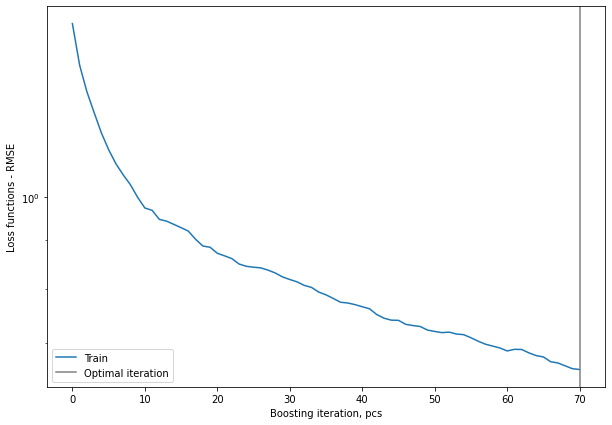

In [30]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [31]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [32]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  -7.05
RMSE: 0.7
Relative RMSE(%):  -1.059
MSE: 0.4
R square: 73.4%


In [33]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: -0.198
a1: 0.646
R^2: 0.748
Uncertainty
a0: -0.20+/-0.04
a1: 0.646+/-0.026


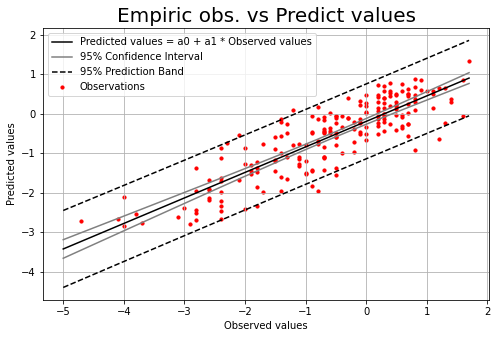

In [34]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

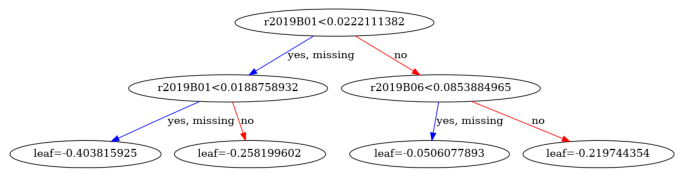

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

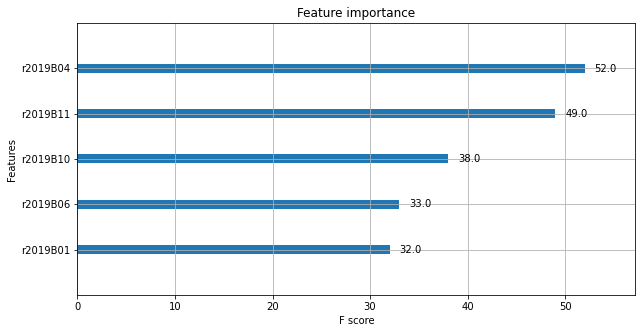

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

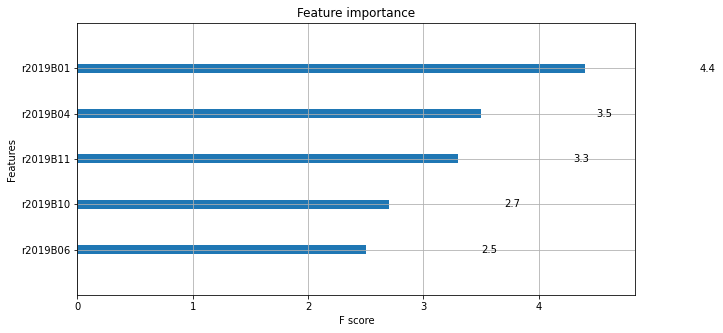

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

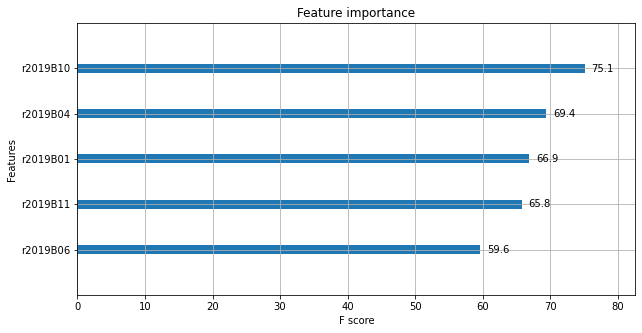

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


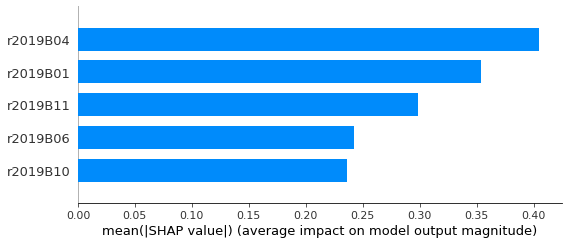

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

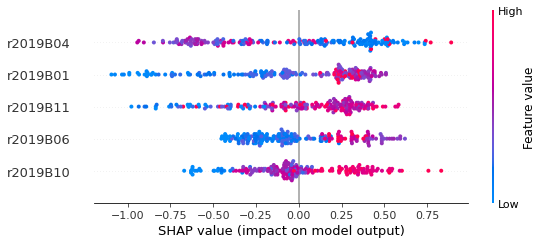

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

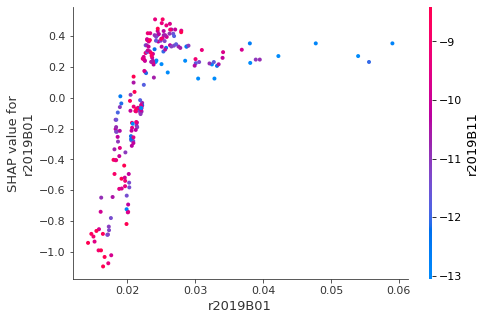

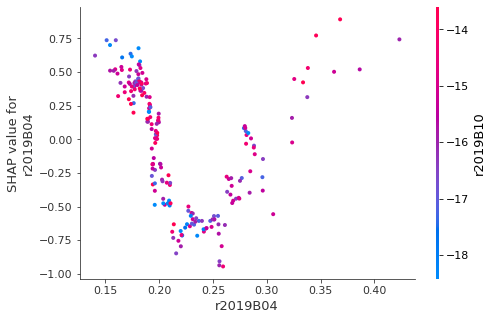

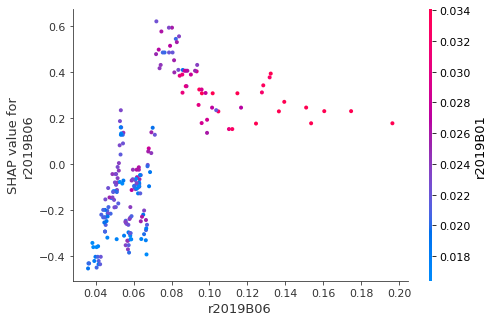

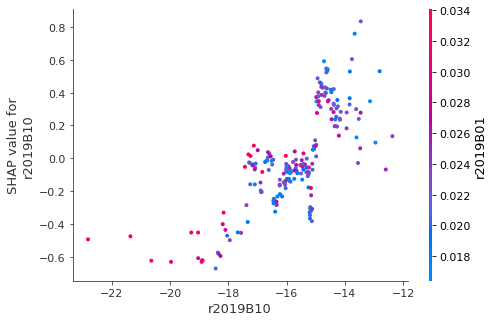

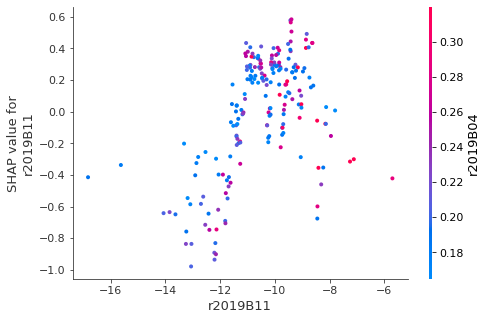

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [46]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_Tag_Cs_2019_ver2.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Nootbooks/XGB_model_Tag_Cs_2019_ver2.txt")